# Machine Learning / Aprendizagem Automática

## Ruben Branco, Eduardo Castanho, Sofia Teixeira, Sara C. Madeira, and Luís Correia, 2021/22

# ML Project  - Learning about Hit Songs - Team 33

### Introduction

Let's imagine that we manage a radio, HIT FM! Also let's supose we want to pass only hit songs, we don't want not-successful tracks. So, how should be the music we accept from which artist? Which levels of loudness, energy or instrumentalness should the songs reach to be accepted in our broadcast emisions?


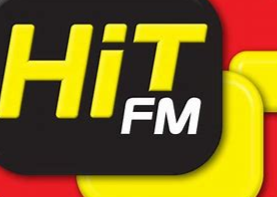


Statistics and Machine Learning are the best tools to answer those questions. With this goal, the radio has contract 4 data scientist  to developed a series of models in order to better understand how the hits and flops are and which are their characteristics.

The first task consists in predict two target variables: Hit and Valence. Hit determines the success of a track instead of flop, which are the songs without repercusion. Besides, Valence indicates the positiveness of the track. Valence was split in three categories: Negative, Neutral and Positive.  

HIT FM! is a very exclusive radio, so, it doesn't conform with only 1 prediction, it needs 4 for each target variable:

 - Linear model
 - Probabilistic model
 - Tree models
 - Distance-based model

 
On the other hand, to be sure, it wants to classify their tracks through unsupervised models. Not enough with a cluster analysis, but two, and a rule association mining.

The selected team is composed by:

 * Beltran Liniers
 * Filipe Paulino
 * Joao Raimundo
 * Margarida Guerra


The four analysts decided that the best models to answer the prediciton requests are:
 
 - Logistic regression
 - Naive Bayes
 - Tree model
 - K-Nearest Neighbours

 
For the second task, the chosen classifiers are:

 - Rule mining association
 - Kmean cluster
 - Hierarchical cluster
 
From here the team starts its prediction and classification solutions. First of all, importing all the necessaries python libraries.

#### Libraries import

In [5]:
# Data processing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()


from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from pandas import Series
from pandas_profiling import ProfileReport
import time

# Selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,cross_val_score,RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Tree Model
from sklearn import tree
from sklearn.metrics import f1_score

# Probabilistic
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

# K-means cluster
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import contingency_matrix

# Hierarchical cluster
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import scipy.cluster.hierarchy as sch

# independance tests
from scipy.stats import chi2_contingency

# pretty print
from tabulate import tabulate

# IV & WoE function
import re
import traceback

# Warning deleting
import warnings
warnings.filterwarnings("ignore")

## Task 0 (Know your Data) - Exploratory Data Analysis

### 0.1 Loading Data

In [6]:
df = pd.read_csv('Spotify_dataset.csv')

### 0.2. Understanding Data

An initial analysis is carried out to better understand the data. In order to look for missing values or *NaN*, duplicate entries, errors/typos and if yes, how to deal with them.

**Data Fields Description**

* **track** - The Name of the track.
* **artist** - The Name of the Artist.
* **danceability** - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
* **energy** - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 
* **key** - The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.
* **loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 
* **mode** - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* **speechiness** - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 
* **acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this:
* **instrumentalness** - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for this feature look like this:
* **liveness** - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* **valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* **tempo** - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
* **duration_ms** - The duration of the track in milliseconds.
* **time_signature** - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
* **chorus_hit** - This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third section of the track.
* **sections** - The number of sections the particular track has. This feature was extracted from the data received by the API call for Audio Analysis of that particular track.
* **decade** - The decade in which the track was released. It can take on the following values: '60s', '70s', '80s', '90s', '00s', '10s'.
* **hit** - Hit or flop? It can be either 0 or 1. 1 implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a hit. 0 Implies that the track is a flop.

In [7]:
df.head()

track           artist  \
0                                     Misty Roses  Astrud Gilberto   
1                                      Never Ever       All Saints   
2                                     Soul Sermon    Gregg Karukas   
3                       Clarinet Marmalade - Live    Alton Purnell   
4  До смерті і довше - Drum & Base and Rock Remix         Skryabin   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:50RBM1j1Dw7WYmsGsWg9Tm         0.527   0.316    1   -15.769   
1  spotify:track:5FTz9qQ94PyUHETyAyfYZN         0.738   0.541    1    -5.485   
2  spotify:track:6m24oe3lk1UMxq9zq4iPFi         0.736   0.419    0   -10.662   
3  spotify:track:5FOXuiLI6knVtgMUjWKj6x         0.565   0.594    5   -13.086   
4  spotify:track:6CxyIPTqSPvAPXfrIZczs4         0.513   0.760    4   -10.077   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0310      0.693000           0.00699    0.1680    0.543   
1     1       0.0311      0.559000           0.00000    0.0492    0.309   
2     1       0.0300      0.693000           0.49500    0.0809    0.265   
3     1       0.0646      0.655000           0.92600    0.6750    0.763   
4     1       0.0355      0.000017           0.00339    0.1530    0.961   

     tempo  duration_ms  time_signature  chorus_hit  sections decade  hit  
0  116.211       158840               4    53.89523         6    90s    0  
1  134.187       387573               4    32.16853        16    90s    1  
2   93.982       237267               4    42.05369         9    90s    0  
3  114.219       375933               4    80.99693        10    90s    0  
4  153.166       430653               4    25.57331        20    90s    0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

In [9]:
df.describe()

danceability        energy           key      loudness          mode  \
count  41106.000000  41106.000000  41106.000000  41106.000000  41106.000000   
mean       0.539695      0.579545      5.213594    -10.221525      0.693354   
std        0.177821      0.252628      3.534977      5.311626      0.461107   
min        0.000000      0.000251      0.000000    -49.253000      0.000000   
25%        0.420000      0.396000      2.000000    -12.816000      0.000000   
50%        0.552000      0.601000      5.000000     -9.257000      1.000000   
75%        0.669000      0.787000      8.000000     -6.374250      1.000000   
max        0.988000      1.000000     11.000000      3.744000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  41106.000000  41106.000000      41106.000000  41106.000000   
mean       0.072960      0.364197          0.154416      0.201535   
std        0.086112      0.338913          0.303530      0.172959   
min        0.000000      0.000000          0.000000      0.013000   
25%        0.033700      0.039400          0.000000      0.094000   
50%        0.043400      0.258000          0.000120      0.132000   
75%        0.069800      0.676000          0.061250      0.261000   
max        0.960000      0.996000          1.000000      0.999000   

            valence         tempo   duration_ms  time_signature    chorus_hit  \
count  41106.000000  41106.000000  4.110600e+04    41106.000000  41106.000000   
mean       0.542440    119.338249  2.348776e+05        3.893689     40.106041   
std        0.267329     29.098845  1.189674e+05        0.423073     19.005515   
min        0.000000      0.000000  1.516800e+04        0.000000      0.000000   
25%        0.330000     97.397000  1.729278e+05        4.000000     27.599792   
50%        0.558000    117.565000  2.179070e+05        4.000000     35.850795   
75%        0.768000    136.494000  2.667730e+05        4.000000     47.625615   
max        0.996000    241.423000  4.170227e+06        5.000000    433.182000   

           sections           hit  
count  41106.000000  41106.000000  
mean      10.475673      0.500000  
std        4.871850      0.500006  
min        0.000000      0.000000  
25%        8.000000      0.000000  
50%       10.000000      0.500000  
75%       12.000000      1.000000  
max      169.000000      1.000000

**Initial insights**
* More than 41 K tracks in the dataset
* Data Types are object, float e int
* All numerical features are inside the expected range (e.g acousticness between 0.0 and 1.0)
* Data types are consistent meaning all the values in one column share the same data type
* No empty fields (missing values) so there is no need to deal with that issue

The features were classified into labels according with their type:

**Numerical:**
* danceability
* energy
* loudness
* speechiness
* acousticness
* instrumentalness
* liveness
* valence
* tempo
* duration_ms
* chorus_hit
* sections

**Categorical:**
* key
* mode
* time_signature
* decade

**Meta Data:**
* track
* artist
* uri

**Check for errors/typos**

The team searches for unexpected values in integer/object columns (except for those considered as meta data):

In [10]:
pd.unique(df['hit'])

array([0, 1], dtype=int64)

In [11]:
pd.unique(df['key'])

array([ 1,  0,  5,  4,  2, 11,  3,  6,  7,  9, 10,  8], dtype=int64)

In [12]:
pd.unique(df['mode'])

array([1, 0], dtype=int64)

In [13]:
pd.unique(df['time_signature'])

array([4, 3, 5, 1, 0], dtype=int64)

In [14]:
pd.unique(df['decade'])

array(['90s', '80s', '00s', '60s', '10s', '70s'], dtype=object)

No unexpected values found

**Check for duplicates**

In [15]:
print(df.shape)

(41106, 20)


In [16]:
df.drop_duplicates(subset=None,keep=False)
print(df.shape)

(41106, 20)


There are no duplicates considering all columns.


The team have found multiple rows which have duplicate information. 
It was no easy to define exactly what was a duplicate, because not all the duplicate rows were exactly. 
In some cases the only repetition was the track name, with different artist or other variables such as liveness, so, in those cases we considered as another version of the same song, but different tracks. Thus, the team analysed and removed the duplicated rows in three rounds, considering all columns except: *track*, *artist* and *uri* sequentially. 


Below some examples of duplicates

In [48]:
# Example duplicate considering all columns except track

table_1 = df.iloc[df[df['uri']=='spotify:track:7okbmgA8lRBGl5limZ7LFM'].index.values]

table_1.style.hide_index().set_caption('Example duplicate considering all columns except track.') #Table 1: 

In [49]:
# Example duplicate considering all columns except artist

table_2 = df.iloc[df[df['uri']=='spotify:track:6uImoDq9R3ZfJOPXkLdyWo'].index.values]

table_2.style.hide_index().set_caption('Example duplicate considering all columns except artist.') #Table 2: 

In [50]:
# Example duplicate considering all columns except uri
table_3 = df.iloc[df[df['track']=='Kind Folk'].index.values]

table_3.style.hide_index().set_caption('Example duplicate considering all columns except uri.') #Table 3: 

### 0.3 .Data cleaning and Preprocessing

**Remove duplicates**

In [17]:
# remove duplicates considering all columns except track
df.drop_duplicates(subset=['artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'decade', 'hit'], keep='first', inplace=True)

# remove duplicates considering all columns except artist
df.drop_duplicates(subset=['track', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'decade', 'hit'], keep='first', inplace=True)

# remove duplicates considering all columns except uri
df.drop_duplicates(subset=['track', 'artist', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'decade', 'hit'], keep='first', inplace=True)

# Save original indexes and reset
original_index = pd.Series(df.index)
df.reset_index(drop=True, inplace=True)

print(df.shape)

(40829, 20)


**Check for outliers**

The next step is the outliers research, for that we have drawn a bloxplot for every variable, focusing on the possible explanatory variables, such as speechiness, acousticness or energy.

In [18]:
plt.boxplot(df[['danceability','energy','acousticness','valence']])
plt.xticks([1,2,3,4], ['danceability','energy','acousticness','valence'])

plt.boxplot(df[['loudness']]) 
plt.xticks([1], ['loudness'])

plt.boxplot(df[['speechiness','instrumentalness','liveness']]) 
plt.xticks([1,2, 3], ['speechiness','instrumentalness','liveness'])

plt.boxplot(df[['tempo']]) 
plt.xticks([1], ['tempo'])


([<matplotlib.axis.XTick at 0x175783ad220>], [Text(1, 0, 'tempo')])

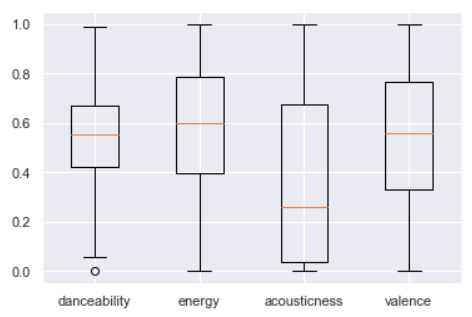

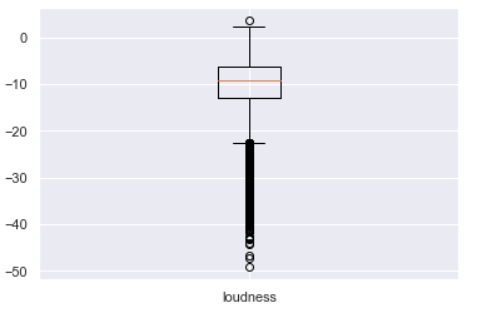



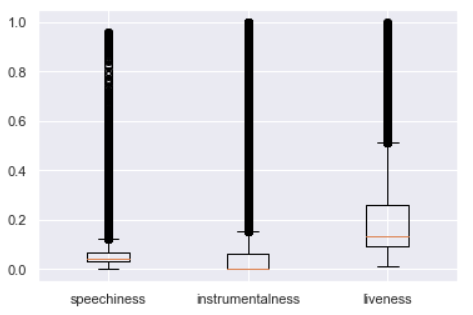

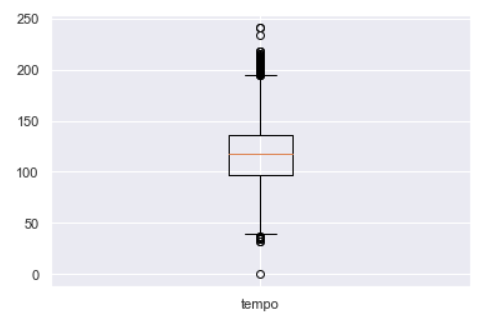

The most shocking situation regarding the extreme values is about loudness and tempo which have several values lower and greater than the 5º and 95º percentils. Any case, we decided to not remove or limit them, because the difference was not too much. Also because if the tempo is super fast or slow it is not necessarly wrong data.

Besides, speechiness, instrumentalness and liveness have multiples extreme values very far away from the median and the percentil 95. However, the range of these variables are [0, 1], since they are inside the variable domain we considered normal values.

Finally, after data cleaning were deleted around 2500 rows, due to the duplicates removing.


### 0.4 Exploratory and Descriptive Analysis

One of the most important need when modelling is to know your data: 
 - Unique values, quantity of zeros
 - Centralization and dispersion mesures (mean, median & quantiles, mode, std. deviation) 
 - Skweness and Kurtosis
 - Data types
 - Distribution of the variables
 - Correlation & interactions between them
 
This overview and other details can be analyzed thanks to the report performed through the ``pandas_profiling`` library.

Next, we coment some highlights, but the reader can deep the descriptive analysis downloading an HTML 
☞ https://drive.google.com/file/d/1rFFtYCAnTQ5vyTBPEsO3ZX7Ji30tANHd/view?usp=sharing

In [17]:
'''
profile = ProfileReport(df, title="Spoty music")
profile.to_file("profile spoty.html")

'''

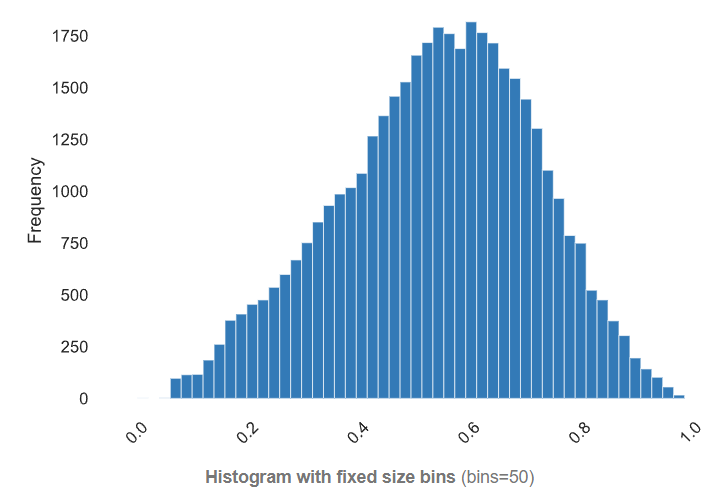

Distribution of Danceability variable (above). Distribution of Decade (below).

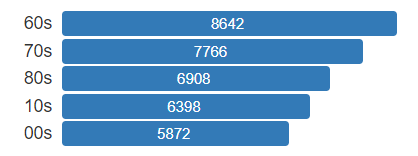

Following, interaction between energy and danceability. As we can see, higher the energy, higher the danceability. But only for values of energy lower than 0.8 (aprox). 

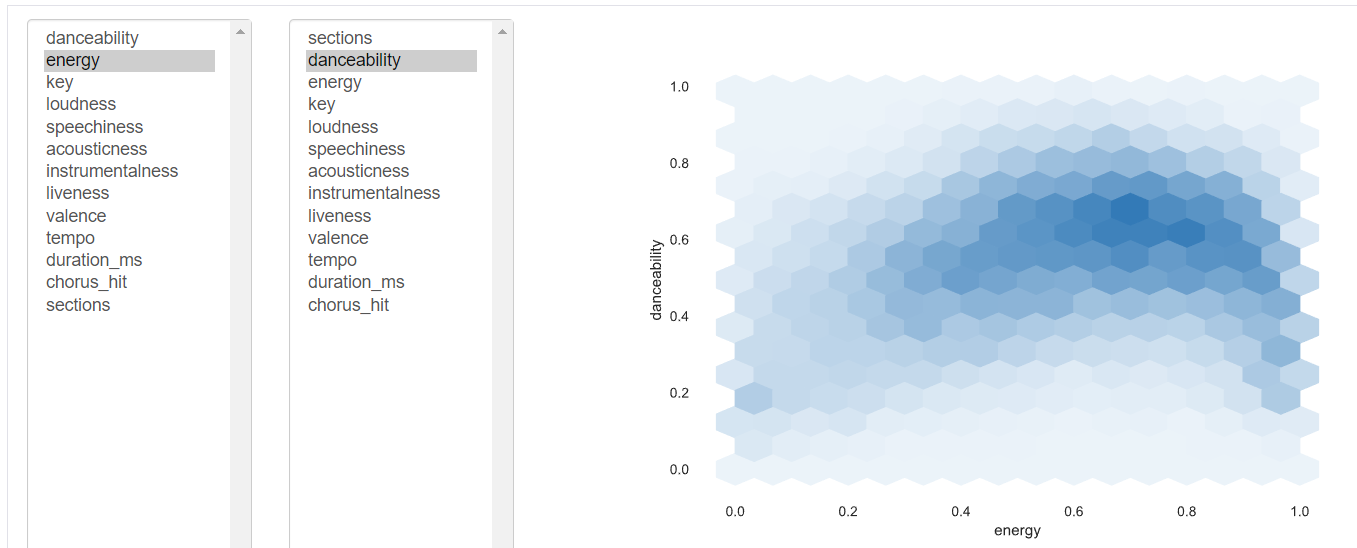

Interaction between energy and loudness. It seems like could be a positive linear correlation between them.

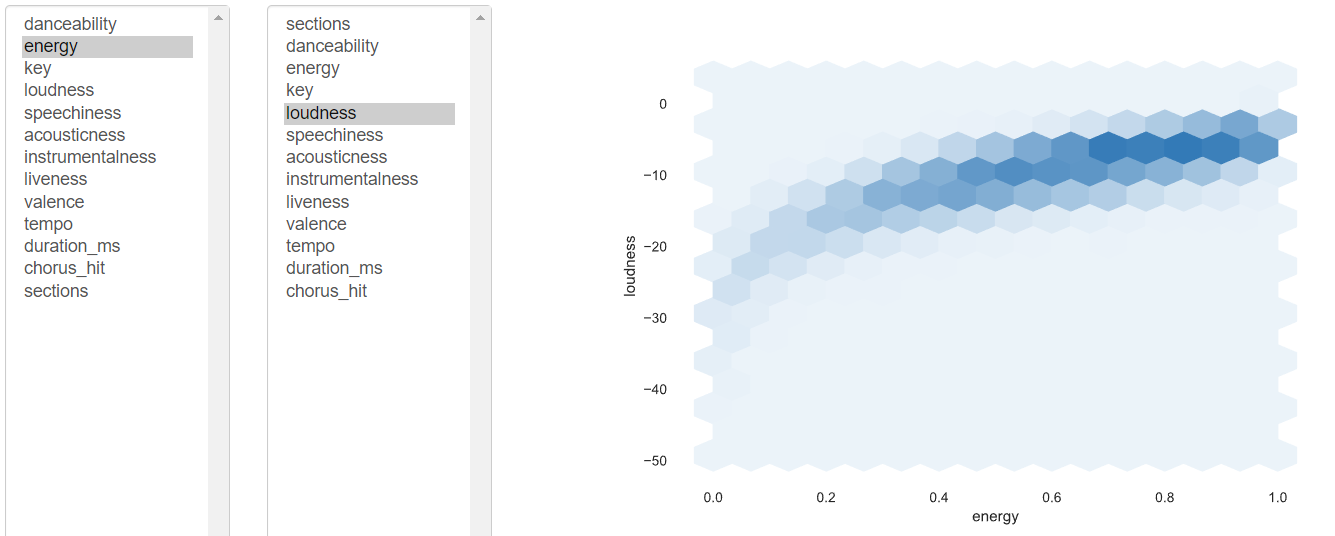

#### Correlation analysis

Inspired by the last image, the team performed the correlation matrix. This analysis computes the Pearson linear correlation coeficients. This indicator shows the linear proportionality in pairs of variables. Their values vary from -1 to 1. Being zero the complete absence of relation between both variables. When the coeficient is close to 1, indicates that both features are directly related, so, one increase when the first one does. While the correlation is near -1, there exists negative relationship.

In [17]:
df[['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness',
       'valence', 'duration_ms', 'sections', 'speechiness']].corr()

danceability    energy  loudness  acousticness  \
danceability          1.000000  0.204778  0.273114     -0.260237   
energy                0.204778  1.000000  0.772130     -0.714282   
loudness              0.273114  0.772130  1.000000     -0.565654   
acousticness         -0.260237 -0.714282 -0.565654      1.000000   
instrumentalness     -0.301844 -0.208773 -0.374862      0.205164   
valence               0.553857  0.341857  0.270697     -0.195519   
duration_ms          -0.062606  0.012864 -0.048229     -0.071032   
sections             -0.057279 -0.038423 -0.078120     -0.018626   
speechiness           0.157591  0.122848  0.070766     -0.084606   

                  instrumentalness   valence  duration_ms  sections  \
danceability             -0.301844  0.553857    -0.062606 -0.057279   
energy                   -0.208773  0.341857     0.012864 -0.038423   
loudness                 -0.374862  0.270697    -0.048229 -0.078120   
acousticness              0.205164 -0.195519    -0.071032 -0.018626   
instrumentalness          1.000000 -0.285062     0.105425  0.080706   
valence                  -0.285062  1.000000    -0.170645 -0.131938   
duration_ms               0.105425 -0.170645     1.000000  0.889103   
sections                  0.080706 -0.131938     0.889103  1.000000   
speechiness              -0.083995  0.002347     0.007097 -0.009284   

                  speechiness  
danceability         0.157591  
energy               0.122848  
loudness             0.070766  
acousticness        -0.084606  
instrumentalness    -0.083995  
valence              0.002347  
duration_ms          0.007097  
sections            -0.009284  
speechiness          1.000000

From 0.6, in absolute value, the correlation between two variables is considered high, being strong when higher than 0.75. So, watching the table above the strongest correlation are:
 - duration_ms feat sections (0.88)
 - energy feat loudness (0.77)
 - energy feat acousticness (-0.71)
 - valence feat danceability (0.55)
 
Generally, there are only 3 strong relationships, which is not too much considering that we have tested more than 10 (in the output are only the most important). However, correlation coeficients give us highlights of the relative importance, but we can not assume contundent conclusions from this analysis. For that, we have to wait to supervised and unsupervised learning algorithms.

The next plot give us another vision of the correlations. In the main diagonal we have the histogram for each variable, out of it, a scatter plot between pairs of variables.

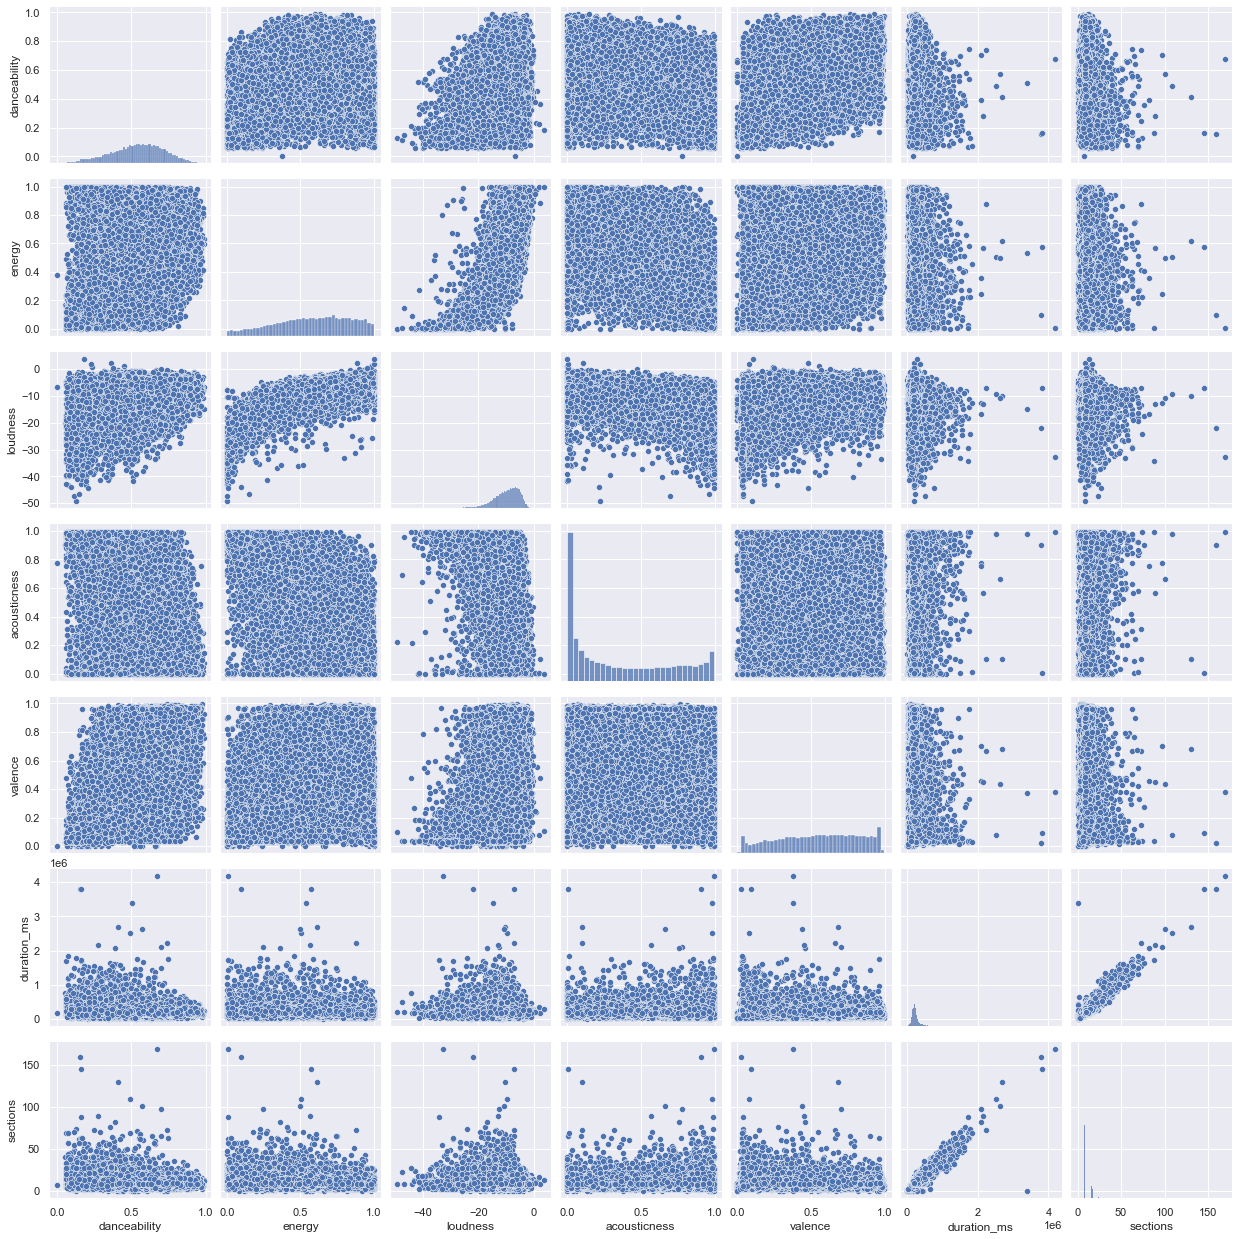

In [7]:
%matplotlib inline

sns.pairplot(df[['danceability', 'energy', 'loudness', 'acousticness',
       'valence', 'duration_ms', 'sections']])
plt.show()


### 0.6 Feature Selection

One of the goals of our work is to predict, before passing on the radio, if a new song will be hit or flop. For that, in the future, we will introduce in the machine classification model the new track characteristics, such as instrumentalness or danceability. Then the machine will return the probability of being a Hit. If this probability is higher than some threshold the team will recommend broadcasting the track. 

Our work as data analysts is to define which of those variables are significant and so, which ones are important to input in the machine and use them to calculate the Hit probability. The second task of a data analyst is to determine the threshold from which a song becomes Hit or Flop. The cut-off computation will be discussed below. To predict the discrete valence of the tracks, we follow the same logic described above.


First, we have built a function that returns the most significant variables and discards those which does not add relevant information.

This function ``forward_selectedCV`` has 4 parameters: train set, target variable and other 2 penalty parameters to correct the coefficients if necessary.

The way the functions works is: It tests univariately each variable against the target and picks the accuracy of the training test. After having evaluated every predictor, it takes the best one and fixes it. In the second iteration, the function calculates de accuracy of the models with the first best variable adding one by one the remaining. The function repeats the process until the remaining variables do not improve the model accuracy. Then these selected variables are considered definitive.

In [22]:
def forward_selectedCV(X_train, y_train, features_LR, classifier_LR, multi_class = 'auto', penalty = 'none', c = 1):
    
    # Features that will be tested
    remaining = features_LR
    
    # In this selected list, we will input the variables that improve the model
    selected = []
    
    acc, new_acc = 0.0, 0.0
    iteracao = 0
    
    while  remaining and iteracao <= 20 and acc <= new_acc: 
        print("iteracao", iteracao)
        resume = []
        for i in range(len(remaining)): # for each feature
            cand_list = [remaining[i]]
            cand_list = cand_list + selected
            # construimos o modelo com as variaveis selected + a candidata para esta volta
            resultCV_MN = classifier_LR.fit(X_train[cand_list], y_train)
            
            # define the model evaluation procedure
            cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
            # evaluate the model and collect the scores
            n_scores = cross_val_score(resultCV_MN, X_train[cand_list], y_train, scoring='accuracy', cv=cv, n_jobs=-1)
            new_acc = np.mean(n_scores).round(4) 
            # save the score for each candidate entering the classifier
            resume.append((new_acc, remaining[i]))#, pval))
            
        # sort so the candidate feature is in the last place
        resume.sort()
        print("resume ", resume)
        
        # extract the score and the name of the best candidate feature
        new_acc, best_candidate = resume.pop() 
        print("accuracy ", acc)
        print("new accuracy ", new_acc)
        # if the new score is better than the previous one (with one less variable)
        # the feature is removed from the remaining list and added to the selected list
        if acc <= new_acc or (len(selected) <3 and acc <= new_acc + 0.032):
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            print("selected " , selected)
            acc = new_acc
    
        iteracao +=1 
    return selected

# forward_selectedCV(X_train, y_train, 'none', 1)

# Task 1 (Supervised Learning) - Predicting Hit or Flop and Discrete Valence

## 1.1. Preprocessing Data for Classification

 The team starts by adding the feature discrete valence to the dataset, which summed up to binning the feature *valence* into to three classes - Negative, Neutral and Positive

In [9]:
# Binning the feature 'valence' using the following range of values: 
# Negative - [0, 0.33], Neutral - (0.33, 0.66] and Positive - (0.66, 1]
df.loc[df['valence'].between(0,0.33, inclusive = 'both'), 'discrete_valence'] = 'Negative'
df.loc[df['valence'].between(0.33,0.66, inclusive = 'right'), 'discrete_valence'] = 'Neutral'
df.loc[df['valence'].between(0.66,1, inclusive = 'right'), 'discrete_valence'] = 'Positive'




#### **Labelling the features by data types**

In [10]:
# general lists

meta = ['track','artist','uri']

categorical = ['key','mode','time_signature','decade']

numerical = ['danceability', 'energy','loudness','speechiness',
                  'acousticness', 'instrumentalness', 'liveness','valence',
                  'tempo', 'duration_ms','chorus_hit','sections']

features = list(categorical) + list(numerical)

targets = ['hit','discrete_valence']

Further preprocessing steps will be performed as required for each classifier.

### 1.1.1. Logistic Regression

In [11]:
df_LR = df.copy(deep=True)

Predictors in logistic regression can be discrete or continuous. Originally the independent variables we have are continuous. We have discretized them to gain human interpretability and manageability, in spite of some loss of information we can induce. 

The way we make categories is founded in univariate analysis, facing Hit (for example) against the predictor variables. From this analysis, we obtain two indicators: *Weight of Evidence* (WoE) and *Information Value* (IV).

*Weight of Evidence* is widely used to measure the separation of the two levels of the dependent variable. Calculates the logarithmic ratio between the percentage of event and not an event for each category. Negative values indicate that in that class there are more non-events than events (because the internal ratio is lower than zero). In conclusion, the higher the absolute value of this indicator higher the discriminant importance of the category.

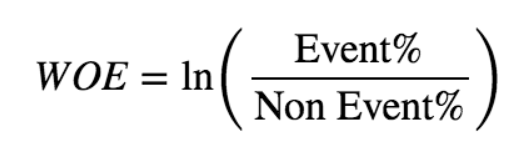

On the other hand, we count with *Information Value*, which is related to the WoE and it is used more frequently to define the importance of an entire variable or model rather than the categories.

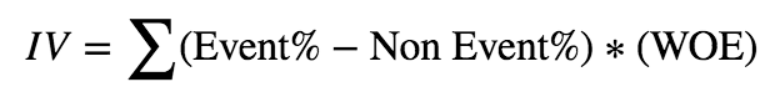

The team has developed a function that calculates these indicators and propose new classes.

In [12]:
max_bin = 15
force_bin = 3

# define a binning function 
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [ ]:
'''

amostra = df_LR[['danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'tempo', 'duration_ms', 'chorus_hit','sections','hit', 'valence']]
final_iv, IV = data_vars(amostra, amostra.hit)
final_iv

''';

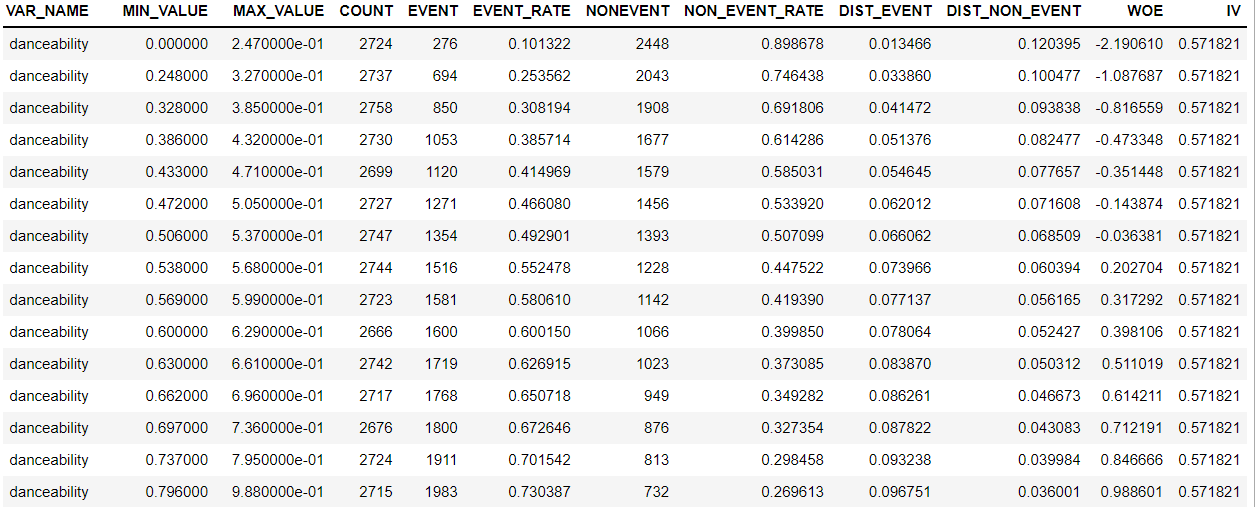

Above Danceability output.

The function returns several columns, in which the most important are Min and Max values, the event rates and WOE an IV.

It performs multiple values for each variable, then we have rejoint to up 4 - 5 different groups by variable, if not, interpretability would be too hard. To optmize the creation of the classes we joint cathegories with similar event_rates and WOE.

Next, the cathegorization process.

In [13]:
# danceability
df_LR.loc[df['danceability'] <= 0.327, 'danceability_num' ] = 1
df_LR.loc[df['danceability'].between(0.327,0.471, inclusive = True), 'danceability_num' ] = 2
df_LR.loc[df['danceability'].between(0.471,0.629, inclusive = True), 'danceability_num' ] = 3
df_LR.loc[df['danceability'].between(0.629,0.696, inclusive = True), 'danceability_num' ] = 4
df_LR.loc[df['danceability'] > 0.696, 'danceability_num' ] = 5


# energy
df_LR.loc[df['energy'] <= 0.601, 'energy_num' ] = 1
df_LR.loc[df['energy'] >  0.601, 'energy_num' ] = 2

# key
df_LR.loc[df['key'] <= 5, 'key_num' ] = 1
df_LR.loc[df['key'] >  5, 'key_num' ] = 2

# loudness
df_LR.loc[df['loudness'] < -12.808, 'loudness_num' ] = 1
df_LR.loc[df['loudness'].between(-12.808,-9.249, inclusive = True), 'loudness_num' ] = 2
df_LR.loc[df['loudness'].between(-9.249,-6.373, inclusive = True), 'loudness_num' ] = 3
df_LR.loc[df['loudness'] > -6.373, 'loudness_num' ] = 4

# speechiness
df_LR.loc[df['speechiness'].between(0.043,1, inclusive = True), 'speechiness_num' ] = 1
df_LR.loc[df['speechiness'].between(0,0.043, inclusive = True), 'speechiness_num' ] = 2


# acousticness
df_LR.loc[df['acousticness'] > 0.259, 'acousticness_num' ] = 1
df_LR.loc[df['acousticness'] <=  0.259, 'acousticness_num' ] = 2

# instrumentalness
df_LR.loc[df['instrumentalness'] > 0.005910, 'instrumentalness_num' ] = 1
df_LR.loc[df['instrumentalness'].between(0.000003,0.005910, inclusive = True), 'instrumentalness_num' ] = 2
df_LR.loc[df['instrumentalness'] < 0.000003, 'instrumentalness_num' ] = 3

# liveness
df_LR.loc[df['liveness'] > 0.133, 'liveness_num' ] = 1
df_LR.loc[df['liveness'] <=  0.133, 'liveness_num' ] = 2

# duration_ms
df_LR.loc[df['duration_ms'] <= 217747, 'duration_ms_num' ] = 1
df_LR.loc[df['duration_ms'] >  217747, 'duration_ms_num' ] = 2

# tempo
df_LR.loc[df['tempo'] <= 117.54, 'tempo_num' ] = 1
df_LR.loc[df['tempo'] >  117.54, 'tempo_num' ] = 2

# chorus_hit
df_LR.loc[df['chorus_hit'] > 35.84442, 'chorus_hit_num' ] = 1
df_LR.loc[df['chorus_hit'] <=  35.84442, 'chorus_hit_num' ] = 2

# sections
df_LR.loc[df['sections'] > 11, 'sections_num' ] = 1
df_LR.loc[df['sections'] <= 11, 'sections_num' ] = 2

# valence
df_LR.loc[df['valence'] < 0.19, 'valence_num' ] = 1
df_LR.loc[df['valence'].between(0.19,0.331, inclusive = True), 'valence_num' ] = 2
df_LR.loc[df['valence'].between(0.331,0.559, inclusive = True), 'valence_num' ] = 3
df_LR.loc[df['valence'].between(0.559,0.768, inclusive = True), 'valence_num' ] = 4
df_LR.loc[df['valence'] > 0.768, 'valence_num' ] = 5

# ordinal encode of decade allowing its use as either numerical or categorical
df_LR['decade2'] = df_LR['decade'].map({'60s':0, '70s':1, '80s':2, '90s':3, '00s':4, '10s':5})

### 1.1.2. Naïve Bayes

These classifiers are constructed on statistical and probabilities concepts. Naïve Bayes classifiers are fundamental on the Bayes theorem and the basis of the classifier is the assumption about the effect of a feature in a given class being independent of the effect of any other feature on the same class. Because this is not very realistic hence it’s “naïve”. Even if this assumption is not true it still can do a good classification job under most circumstances, and not overfit, so it can usually be used as a baseline for initial analysis and the performance of other classifiers. Although not essential to our work, these algorithms are also fast and usually used when dealing with real-time pipelines of large amounts of data.

The likelihood of the features is assumed to be Gaussian. The parameters and are estimated using maximum likelihood. The general expression is shown below.

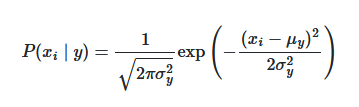

Considering the characteristics and distribution of our features, which have considerably different magnitudes compared to each other e.g. sections can have values in the hundreds while danceability maximum value is one, and have different units of measurement e.g. loudness and tempo, we decided to employ a standardization to mean average equal to zero and standard deviation equal to one.

In [14]:
# One hot encoding of categorical features to binary 0,1 or boolean

def ohencode(to_encode, nums, cat, boolean=False):

    # numerical
    data_num = pd.DataFrame(to_encode[nums].to_numpy(), columns=to_encode[nums].columns)

    # encode categorical
    encode_cat = to_encode[cat]
    if boolean==True:
        enc = OneHotEncoder(dtype=bool)
    else:
        enc = OneHotEncoder()
    encode_cat = enc.fit_transform(to_encode[cat]).toarray()
    encode_cat = pd.DataFrame(encode_cat, columns=enc.get_feature_names(cat))


    # concatenate
    encoded = pd.concat([data_num, encode_cat], axis=1) # attributes

    enc_features = (encoded.columns).difference(categorical).difference(numerical)
    enc_features
    
    return encoded, enc_features

The function ``forward_selectedCV`` was modified to be adapted to the new requirements: the One-Hot Encoding of non-ordinal categorical features.

In [15]:
# Modified Feature Selection Forward Wrapper Method

def modified_forward_selectedCV(X_train, y_train, classifier, features, ohe_features, ohe_columns):
            
        start = time.time()
        
        # Features that will be tested
        remaining = list(features)

        # In this selected list, we will input the variables that improve the model (F1 Score)
        selected = []

        f1_score, new_f1_score = 0.0, 0.0
        iteration = 0

        while remaining and f1_score <= new_f1_score and iteration < len(list(features)):
            resume = []
            for i in range(len(remaining)): # for each feature
                new_candidate = [remaining[i]]
                
                # if the candidate feature is one hot encoded
                # adds all its columns as a single candidate (by column name)
                if remaining[i] in ohe_features: 
                    new_candidate = list(filter(lambda x: remaining[i] in x, ohe_columns))
                    
                candidates = selected + new_candidate

                # Train and test the model with the selected features + the candidate for this round              
                new_f1_score = cross_val_score(classifier, X_train[candidates], y_train.ravel(), cv=10, scoring='f1_macro')
                new_f1_score = new_f1_score.mean().round(4)               

                # save the score for each candidate entering the classifier
                resume.append((new_f1_score, remaining[i]))

            # sort the candidate feature is in the last place
            resume.sort()

            # extract the score and the name of the best candidate feature
            new_f1_score, best_candidate = resume.pop() 

            # if the new score is better than the previous one (with one less variable)
            # the feature is removed from the remaining list and added to the selected list
            if f1_score < new_f1_score:
                remaining.remove(best_candidate)
                selected.append(best_candidate)
                
                # if the last selected feature is one hot encoded
                # adds all its columns to the selected set
                if selected[-1] in ohe_features:
                    last_selected = selected[-1];
                    selected.pop();
                    selected += list(filter(lambda x: last_selected in x, ohe_columns))
                    
                f1_score = new_f1_score

            iteration +=1 
       
        # save output
        print("Selected Features: ", selected,"\n", f1_score, new_f1_score,"\n")
        print("Total Time: ", time.time() - start,"\n\n")

In [16]:
# Data Scaling and Normalization

def minmax_ss_scaler(to_scale, to_scale_val, nums, minmax=False, sscaler=False):

    # scale numerical
    if minmax==True:
        mm_scaler = MinMaxScaler()
        mm_scaler.fit(to_scale[nums])
        to_scale[nums] = pd.DataFrame(mm_scaler.transform(to_scale[nums]), columns = nums) # minmax training data
        to_scale_val[nums] = mm_scaler.transform(to_scale_val[nums]) # scale test data using training data parameters
    if sscaler==True:
        s_scaler = StandardScaler()
        s_scaler.fit(to_scale[nums])
        to_scale[nums] = pd.DataFrame(s_scaler.transform(to_scale[nums]), columns = nums) # standardize training data
        to_scale_val[nums] = s_scaler.transform(to_scale_val[nums]) # scale test data using training data parameters
    
    return to_scale, to_scale_val

In [17]:
df_NB = df.copy(deep=True)

In [18]:
# ordinal encode of decade allowing its use as either numerical or categorical
enc_decade = OrdinalEncoder(categories=[['60s','70s','80s','90s','00s', '10s']])
df_NB['decade'] = enc_decade.fit_transform(df_NB[['decade']])

In [19]:
# initial preprocessing for binary classification of flop, hit
Xpd_NB = df_NB.drop(columns=targets).drop(columns=meta)
ypd_NB = df_NB['hit']

In [20]:
Xpd_NB, ohe_columns_NB = ohencode(Xpd_NB, list(numerical), list(categorical))

### 1.1.3. Decision Tree

In this work we use the optimized version of the CART algorithm available in Skikit-learn. Because we have many numerical attributes this algorithm allows us to have multiple splitting points for those attributes. We have no missing values. We have a dataset with a very good balance, especially in the ‘hit’ target. No re-scaling is usually needed for building decision trees and so we leave the magnitude and distribution of features has they are. The algorithm also has the most common selection measures, Gini and Gain Ratio. Gain Ratio attempts to overcome some bias in the selection measure Information Gain, which is not used. A drawback of Scikit-learn CART is that it cannot deal with categorical features natively, so we have to one hot encode those features. Finally, it also allows for multiclass decision trees which we also need for the Discrete Valence classification task.

In [41]:
df_DT = df.copy(deep=True)

In [42]:
# ordinal encode of decade allowing its use as either numerical or categorical
enc_decade = OrdinalEncoder(categories=[['60s','70s','80s','90s','00s', '10s']])
df_DT['decade'] = enc_decade.fit_transform(df_DT[['decade']])

In [43]:
# initial preprocessing for binary classification of flop, hit
Xpd_DT = df_DT.drop(columns=targets).drop(columns=meta)
ypd_DT = df_DT['hit']

In [44]:
#ohe
Xpd_DT, ohe_columns_DT = ohencode(Xpd_DT, list(numerical), list(categorical))

### 1.1.4. KNN

The K-Nearest Neighbours (KNN) is a supervised machine learning algorithm. It assumes that similar data points exist in close proximity and aim to locate all of the closest neighbours around a new unknown data point to figure out what class it belongs to. KNN calculates the distance from all points in the proximity of the unknown data and filters out the ones with the shortest distances to it. For this reason, KNN is often known as a distance-based algorithm. To correctly classify the results, we must first determine the value of K (Number of Nearest Neighbours) - selecting the right value of K is crucial for a solid prediction.

Thus, we proceeded to perform two KKN classification tasks: Predicting Hit or Flop and Predicting Discrete Valence. 
For each task, we started by pre-processing the dataset (binning, encoding categorical features, scaling and normalization) and inferring which are the best candidate features and K values for the prediction model. After this evaluation, we finally performed the classification.

In [27]:
df_KNN = df.copy(deep=True)

In [28]:
# ordinal encode of decade allowing its use as either numerical or categorical - OrdinalEncoder
enc_decade = OrdinalEncoder(categories=[['60s','70s','80s','90s','00s', '10s']])
df_KNN['decade'] = enc_decade.fit_transform(df_KNN[['decade']])

In [29]:
# label, features
Xpd_KNN = df_KNN.drop(columns=targets).drop(columns=meta)
ypd_KNN = df_KNN['hit']

In [30]:
# ohe
Xpd_KNN, ohe_columns_KNN = ohencode(Xpd_KNN, list(numerical), list(categorical))

## 1.2. Learning Classifiers

### 1.2.1 Binary Classification Task (Hit or Flop)

We are now able to train our classification models to predict future hits.

### 1.2.1.1. Logistic Regression

In [ ]:
features_LR = ['instrumentalness_num', 'danceability_num','loudness_num', 'acousticness_num', 
            'energy_num', 'speechiness_num', 'tempo_num', 'duration_ms_num', 'chorus_hit_num',
            'sections_num', 'key_num','liveness_num', 'valence_num','decade2','mode','time_signature'];

X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(
    df_LR[features_LR], 
    df_LR.hit, stratify=df_LR.hit, random_state=42)

classifier_LR = LogisticRegression(multi_class = 'auto', solver='liblinear', penalty = 'l2', C = 1);

#selected_LR = forward_selectedCV(X_train_LR, y_train_LR, features_LR, classifier_LR)

selected_LR =['instrumentalness_num', 'time_signature', 'sections_num', 'danceability_num', 'speechiness_num'
, 'loudness_num','decade2', 'acousticness_num', 'liveness_num', 'mode', 'duration_ms_num', 'key_num']

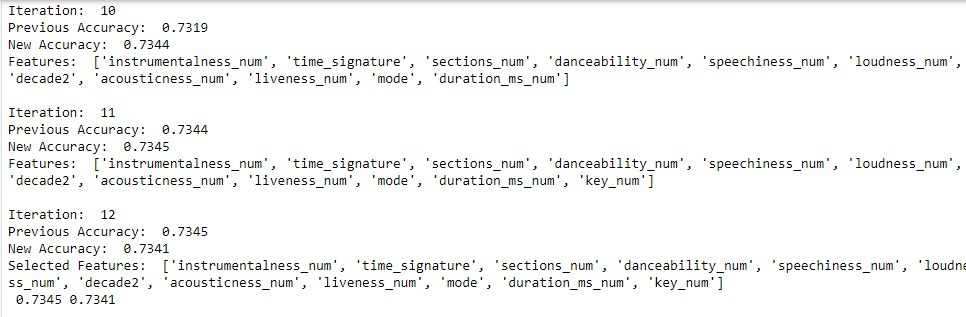

Once we have our feature selection, we build and validate the definitive model through the test dataset and analyze several indicators, such as precision, recall and f1-score from the confusion matrix.

Sometimes when training a model, it could be overfitted, that is the model is too good defined to the train data, so, when you tested in another data set the accuracies performances are no longer good. The model is only useful for the train data.

To avoid this situation, we input one penalty C which varies from 0 to 1. It limits the coefficients. Some tests were done without success because the results did not change. Finally, we did not input this penalty.

### 1.2.1.2. Naïve Bayes

In [54]:
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(Xpd_NB.values, ypd_NB.values, stratify=ypd_NB.values, random_state=42)

X_train_NB = pd.DataFrame(X_train_NB, columns=Xpd_NB.columns)
X_test_NB = pd.DataFrame(X_test_NB, columns=Xpd_NB.columns)

In [55]:
# standardize data
X_train_NB, X_test_NB = minmax_ss_scaler(X_train_NB, X_test_NB, list(numerical), minmax=False, sscaler=True)

In [56]:
classifier_NB = GaussianNB()
selected_NB = modified_forward_selectedCV(X_train_NB, y_train_NB, classifier_NB,\
                            list(features), list(categorical), list(ohe_columns_NB))

Selected Features:  ['danceability', 'acousticness', 'instrumentalness', 'energy', 'sections', 'mode_0', 'mode_1', 'liveness', 'valence', 'decade_0.0', 'decade_1.0', 'decade_2.0', 'decade_3.0', 'decade_4.0', 'decade_5.0'] 
 0.7136 0.7133 

Total Time:  18.144238233566284 




For the Naïve Bayes learning classifier, we proceeded to split the dataset into train and test sets, then we scaled and normalized both new sets. Thus, we infer the best-selected features to be used in the Naïve Bayes classification model further:

   *  'danceability', 'acousticness', 'instrumentalness', 'energy', 'sections', 'mode_0', 'mode_1', 'liveness', 'valence', 'decade_0.0', 'decade_1.0', 'decade_2.0', 'decade_3.0', 'decade_4.0', 'decade_5.0'
   
   * supported with a F1 score = 0.7136

###  1.2.1.3. Decision Tree

In [57]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(Xpd_DT.values, ypd_DT.values, stratify=ypd_DT.values, random_state=42)

X_train_DT = pd.DataFrame(X_train_DT, columns=Xpd_DT.columns)
X_test_DT = pd.DataFrame(X_test_DT, columns=Xpd_DT.columns)

**A simple decision tree for binary with max_depth = 3 for visualization purposes**

In [58]:
from sklearn.metrics import f1_score

# have to input criterior automatically next
classifier_DT = tree.DecisionTreeClassifier(max_depth=3)
classifier_DT = classifier_DT.fit(X_train_DT.values, y_train_DT)

y_pred = classifier_DT.predict(X_test_DT.values)

train_set_acc = f1_score(y_train_DT, classifier_DT.predict(X_train_DT.values), average='macro')
fin_test_acc = f1_score(y_test_DT, y_pred, average='macro')

print("%0.3f training test accuracy and %0.2f test set accuracy" % (train_set_acc,
                                                                     fin_test_acc))

0.727 training test accuracy and 0.72 test set accuracy


In [59]:
import pydot
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def display_tree(the_tree, feature_names, class_names, fname, figsize=(10,10)):
    tree.export_graphviz(the_tree, out_file=fname+".dot",
                         feature_names=feature_names,
                         class_names=class_names,
                         filled=True, rounded=True,
                         special_characters=True)
    
    
    (graph,) = pydot.graph_from_dot_file(fname+".dot")
    graph.write_png(fname+".png")
    img = mpimg.imread(fname+".png")
    plt.figure(figsize = figsize)
    imgplot = plt.imshow(img)

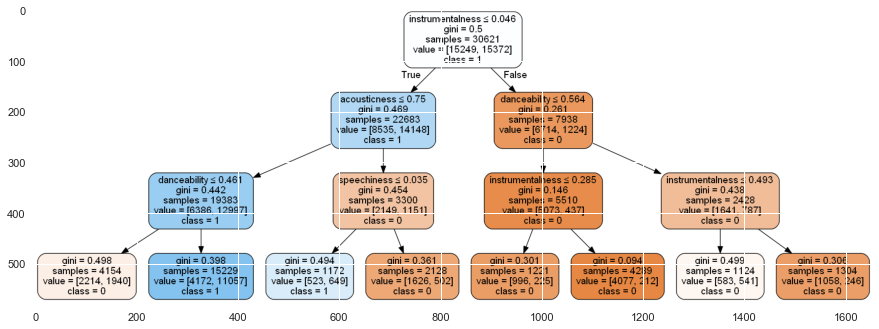

In [60]:
display_tree(classifier_DT, X_test_DT.columns.tolist(), np.unique(y_test_DT).astype(str), "clf", (15,15)) # display tree

Despite the complexity of the tree, the depths that appear here without leaves will be the same for our following models, except if we use a different selection measure. So, we can right away see that *instrumentalness* is important in our trained classifier, showing up at the top of our tree. The other features that also show up right at the top are *acousticness* and danceability. Where the threshold is set by the selection measure is also interesting. *Instrumentalness* is divided very low at 0.046. In this simple tree we see that *instrumentalness* even shows up a number of times.

In this project, we use the optimized version of the CART algorithm available in *Skikit-learn. Because we have many numerical attributes this algorithm allows us to have multiple splitting points for those attributes. We have no missing values. We have a dataset with a very good balance, especially in the *hit* target. No re-scaling is usually needed for building decision trees and so we leave the magnitude and distribution of features as they are. The algorithm also has the most common selection measures, *Gini* and *Gain Ratio. *Gain Ratio* attempts to overcome some bias in the selection measure *Information Gain, which is not used. A drawback of Scikit-learn CART is that it cannot deal with categorical features natively so we have to *One-Hot Encode* those features. Finally, it also allows for multiclass decision trees which we also need for the *Discrete Valence* classification task.

In [62]:
classifier_DT = tree.DecisionTreeClassifier()
# modified_forward_selectedCV(X_train_DT, y_train_DT, classifier_DT,\
#                             list(features), list(categorical), list(ohe_columns_DT))

The results are below what could be expected. Next, we tried several grid searches in order to optimize our hyper-parameters for the tree.

In [63]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# define parameters to optimize
parameters = {'criterion':('gini', 'entropy'),
              'min_samples_leaf': np.arange(5, 15),
              'max_depth': np.arange(15, 25)}

classifier_DT = GridSearchCV(classifier_DT, parameters, scoring='f1_macro', cv=10, n_jobs=-1, return_train_score=True)
classifier_DT.fit(X_train_DT.values, y_train_DT)
print('DecisionTreeClassifier \n\t with score {} \t using best parameters {}.\n'.format(classifier_DT.best_score_, classifier_DT.best_params_))

DecisionTreeClassifier 
	 with score 0.7532326614143268 	 using best parameters {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 14}.



Over-complex trees do not generalize well. Too little pruning and it will overfit, too much and will not learn well enough. We found some instances where the training score was close to 1 so we tried to avoid those situations. We tried with both selection measures available and they gave comparable results so we opted to use *Gini* because it is slightly faster. And tried to optimize with different pruning measures. In the end, we found out that some measures gave equivalent results. For example, pruning the tree with either *min_samples_leaf* and *max_depth* gave comparable results to using *ccp_alpha. In the end, we opted for the *min_samples_leaf* and *max_depth* combination, which has more immediate meaning to us. The *min_samples* leaf criteria seemed to be the most impactful so our best hyperparameters were very tuned around it.

### 1.2.1.4. KNN

In [31]:
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(Xpd_KNN.values, ypd_KNN.values, random_state=42)

X_train_KNN = pd.DataFrame(X_train_KNN, columns=Xpd_KNN.columns)
X_test_KNN = pd.DataFrame(X_test_KNN, columns=Xpd_KNN.columns)

In [66]:
# Data Scaling and Normalization
X_train_KNN, X_test_KNN = minmax_ss_scaler(X_train_KNN, X_test_KNN, list(numerical), minmax=True, sscaler=True)

In [68]:
# run 'forward_select()' function for K in range 20
'''
for i in range(20): 
    start = time.time()    
    K = i+1

    if (K % 2 == 0): 
        continue
        
        print("Selecting the best candidate features for K =",K,"...","\n")
        
        classifier_KNN = neighbors.KNeighborsClassifier(n_neighbors= K)
        modified_forward_selectedCV(X_train_KNN, y_train_KNN, classifier_KNN,\
                                    list(features), list(categorical), list(ohe_columns_KNN))
'''

hit_feature_selection_output = open("outputs/knn_feature_selection_hit_output.txt", "r")
print(hit_feature_selection_output.read())

Best Candidate Features for K= 1 : ['acousticness', 'instrumentalness', 'duration_ms', 'decade_0.0', 'decade_1.0', 'decade_2.0', 'decade_3.0', 'decade_4.0', 'decade_5.0', 'danceability', 'speechiness', 'loudness', 'tempo', 'energy', 'valence', 'mode_0', 'mode_1'] 
 F1_Score: 0.7345 
 Total Time : 621.7900040149689  sec 


Best Candidate Features for K= 3 : ['instrumentalness', 'acousticness', 'danceability', 'duration_ms', 'decade_0.0', 'decade_1.0', 'decade_2.0', 'decade_3.0', 'decade_4.0', 'decade_5.0', 'speechiness', 'tempo'] 
 F1_Score: 0.752 
 Total Time : 356.39298009872437  sec 


Best Candidate Features for K= 5 : ['instrumentalness', 'acousticness', 'danceability', 'duration_ms', 'decade_0.0', 'decade_1.0', 'decade_2.0', 'decade_3.0', 'decade_4.0', 'decade_5.0', 'speechiness', 'loudness', 'energy', 'valence', 'time_signature_0', 'time_signature_1', 'time_signature_3', 'time_signature_4', 'time_signature_5'] 
 F1_Score: 0.7681 
 Total Time : 678.5800216197968  sec 


Best Candi

Considering the results obtained in the previous step, we agreed that the best results were achieved with K=7 (by a tradeoff between the number of features and classifier performances).

In [85]:
selected = ['instrumentalness', 'acousticness', 'danceability', 'speechiness', 
            'decade_0.0', 'decade_1.0', 'decade_2.0', 'decade_3.0', 'decade_4.0', 'decade_5.0', 
            'duration_ms', 'loudness', 'energy', 'valence'] 

# Model Classification for K = 7
knn = neighbors.KNeighborsClassifier(n_neighbors= 7)
knn_selected_train = knn.fit(X_train_KNN[selected], y_train_KNN.ravel())
knn_selected_train_score = knn_selected_train.score(X_train_KNN[selected], y_train_KNN).round(4)

print("Training Test set Accuracy for K=7:", knn_selected_train_score)

Training Test set Accuracy for K=7: 0.8247


Text(0.5, 1.0, 'Predicting Hit and Flop Confusion Matrix - K=7 - Best Features - Training Test Set')

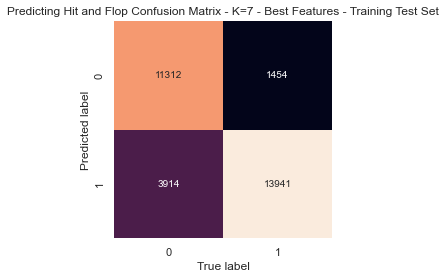

In [86]:
# Predictions for train set
y_train_pred = knn_selected_train.predict(X_train_KNN[selected])

# Confusion Matrix - Train Set
cm_train = confusion_matrix(y_train_KNN, y_train_pred, labels=knn.classes_)
 

sns.heatmap(cm_train.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=knn.classes_,
            yticklabels=knn.classes_)

plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.title('Predicting Hit and Flop Confusion Matrix - K=7 - Best Features - Training Test Set')

In [82]:
# Classification Report - Train Set
print("Predicting Hit and Flop Classification Report - Training Test Set - K=7\n\n",
      classification_report(y_train_KNN, y_train_pred))

Predicting Hit and Flop Classification Report - Training Test Set - K=7

               precision    recall  f1-score   support

           0       0.89      0.74      0.81     15226
           1       0.78      0.91      0.84     15395

    accuracy                           0.82     30621
   macro avg       0.83      0.82      0.82     30621
weighted avg       0.83      0.82      0.82     30621



### 1.2.2 Results and discussion for the binary classification task

### 1.2.2.1. Logistic Regression

In [24]:
resultCV_LR = LogisticRegression(solver='lbfgs').fit(X_train_LR[selected_LR], y_train_LR)

cv_LR = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(resultCV_LR, X_train_LR[selected_LR], y_train_LR, scoring='accuracy', cv=cv_LR, n_jobs=-1)

print("Train set score (Accuracy) =", resultCV_LR.score(X_train_LR[selected_LR], y_train_LR).round(4))
print("Test set score (Accuracy) =", resultCV_LR.score(X_test_LR[selected_LR], y_test_LR).round(4))

conf_mat_LR = confusion_matrix(y_test_LR, resultCV_LR.predict(X_test_LR[selected_LR]))
print(tabulate(conf_mat_LR,headers = ['pred 0','pred 1'], showindex = ['real 0','real 1'], tablefmt = 'fancy_grid'))

print(classification_report(y_train_LR, resultCV_LR.predict(X_train_LR[selected_LR])))

Train set score (Accuracy) = 0.735
Test set score (Accuracy) = 0.7293
╒════════╤══════════╤══════════╕
│        │   pred 0 │   pred 1 │
╞════════╪══════════╪══════════╡
│ real 0 │     3579 │     1505 │
├────────┼──────────┼──────────┤
│ real 1 │     1258 │     3866 │
╘════════╧══════════╧══════════╛
              precision    recall  f1-score   support

           0       0.75      0.71      0.73     15249
           1       0.72      0.76      0.74     15372

    accuracy                           0.73     30621
   macro avg       0.74      0.73      0.73     30621
weighted avg       0.74      0.73      0.73     30621



Interpretation of the confusion matrix:

- The precision indicates the percentage of real Hit among those the model predicts as Hit, our model has a precision of 72%
- The recall shows the percentage of real Hits that were catalogue as Hit, our recall is 76%
- If you compute these two metrics in a harmonic mean the result is the F1-Score. We reach 74%

The three indicators show good levels since they are higher than 70%.

Another concern we had was the overfitting. Thanks to the good application of the statistical techniques we have done, we have not that problem. We know it because the difference between accuracies when calculated from train and test datasets is minimal. The same when we compute the confusion matrix, and their consequent indicators (precision, recall and F1-Score).

In [72]:
resultCV_LR.coef_

array([[ 0.95043279,  0.19270357,  0.27654695,  0.51379763,  0.81814411,
         0.30958721, -0.24544461,  0.77506588,  0.09263406,  0.34739573,
         0.5378783 ,  0.07376844]])

### 1.2.2.2. Naïve Bayes

In [73]:
from sklearn.metrics import f1_score
selected = ['danceability', 'acousticness', 'instrumentalness', 'energy', 'sections',
            'mode_0', 'mode_1', 'liveness', 'valence', 'decade_0.0', 'decade_1.0',
            'decade_2.0', 'decade_3.0', 'decade_4.0', 'decade_5.0']

# have to input criterior automatically next
classifier_NB = GaussianNB().fit(X_train_NB[selected], y_train_NB)

y_pred_NB = classifier_NB.predict(X_test_NB[selected])

train_set_acc = f1_score(y_train_NB, classifier_NB.predict(X_train_NB[selected]), average='macro')
fin_test_acc = f1_score(y_test_NB, y_pred_NB, average='macro')

# from sklearn.metrics import accuracy_score
# train_set_acc = accuracy_score(y_tt, clf.predict(X_tt))
# fin_test_acc = accuracy_score(y_val, y_pred)

print("%0.3f training test accuracy and %0.2f test set accuracy" % (train_set_acc,
                                                                     fin_test_acc))

0.714 training test accuracy and 0.70 test set accuracy


Text(0.5, 1.0, 'Predicting Hit and Flop Confusion Matrix - Naive Bayes - Best Features - Test Set')

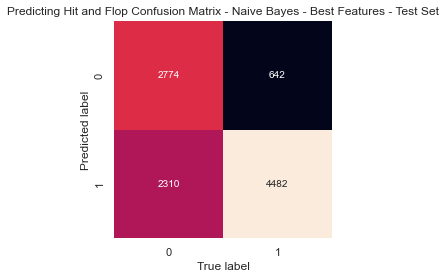

In [80]:
# Confusion Matrix - Train Set
cm_train = confusion_matrix(y_test_NB, y_pred_NB, labels=knn.classes_)
 

sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=knn.classes_,
            yticklabels=knn.classes_)

plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.title('Predicting Hit and Flop Confusion Matrix - Naive Bayes - Best Features - Test Set')

In [ ]:
# Classification Report - Test Set
print("Predicting Hit and Flop Classification Report - NB - Test Set\n\n",
      classification_report(y_test_NB, y_pred_NB))

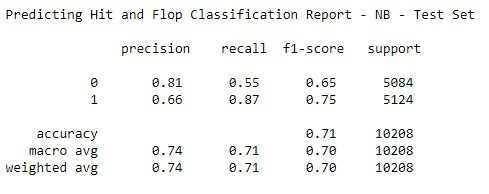

The best selected features for the NB classification model was:

 * 'danceability', 'acousticness', 'instrumentalness', 'energy', 'sections', 'mode_0', 'mode_1', 'liveness', 'valence', 'decade'
 
 
Thus, from the confusion matrix, we can infer that the NB model has correctly precited 2774 tracks as flops and 4482 hit tracks.
Besides, the prediction of the flop class was well supported by the metrics of the classification report, compared with the hit class.
 
Due to the NB model not having hyperparameters for the calibration, the obtained results were worse than expected. Although, it is a machine learning classification model which runs very fast.

### 1.2.2.3. Decision Tree

We validated the chosen classifier and hyperparameters with our test set. The results are comparable to those obtained when we did the grid search. The tree shows a reasonable score for the task at hand.

In [87]:
# have to input criterior automatically next
classifier_DT = tree.DecisionTreeClassifier(max_depth= 11, min_samples_leaf= 17)
classifier_DT = classifier_DT.fit(X_train_DT.values, y_train_DT)

y_pred = classifier_DT.predict(X_test_DT.values)

train_set_acc = f1_score(y_train_DT, classifier_DT.predict(X_train_DT.values), average='macro')
fin_test_acc = f1_score(y_test_DT, y_pred, average='macro')

print("%0.3f training test accuracy and %0.2f test set accuracy" % (train_set_acc,
                                                                     fin_test_acc))

0.809 training test accuracy and 0.76 test set accuracy


In [88]:
# for the discussion
classifier_DT.get_depth()

11

In [89]:
# for the discussion
classifier_DT.get_n_leaves()

473

Text(0.5, 1.0, 'Predicting Hit and Flop Confusion Matrix - Decision Tree - Best Features - Test Set')

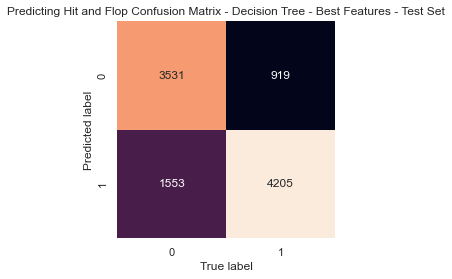

In [93]:
# Confusion Matrix - Train Set
cm_test_DT = confusion_matrix(y_test_DT, y_pred_DT, labels=knn.classes_)
 

sns.heatmap(cm_test_DT.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=knn.classes_,
            yticklabels=knn.classes_)

plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.title('Predicting Hit and Flop Confusion Matrix - Decision Tree - Best Features - Test Set')

In [ ]:
# Classification Report - Test Set
print("Predicting Hit and Flop Classification Report - DT - Test Set\n\n",
      classification_report(y_test_DT, y_pred_DT))

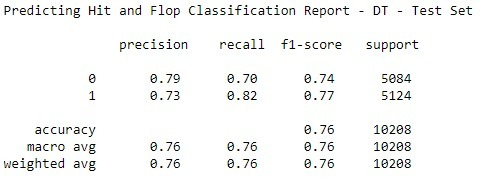

The model shows high performances, in the confusion matrix we see that it can detect more than 4000 true Hits. Consequently, we obtain a precision of 73% and a recall of 82%. After making the harmonic mean of these two indicators we obtain a F1 score equal to 77%.

### 1.2.2.4. KNN

In [32]:
selected = ['instrumentalness', 'acousticness', 'danceability', 'speechiness', 
            'decade_0.0', 'decade_1.0', 'decade_2.0', 'decade_3.0', 'decade_4.0', 'decade_5.0', 
            'duration_ms', 'loudness', 'energy', 'valence'] 

# Model Classification for K = 7
knn = neighbors.KNeighborsClassifier(n_neighbors= 7)
knn_selected_test = knn.fit(X_test_KNN[selected], y_test_KNN.ravel())
knn_selected_test_score = knn_selected_test.score(X_test_KNN[selected], y_test_KNN).round(4)

print("Validation set Accuracy for K=7:", knn_selected_test_score)

Validation set Accuracy for K=7: 0.6907


In [33]:
# Predictions for test set
y_test_pred = knn_selected_test.predict(X_test_KNN[selected])

# Confusion Matrix - Train Set
cm_test = confusion_matrix(y_test_KNN, y_test_pred, labels=knn.classes_)
 

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=knn.classes_,
            yticklabels=knn.classes_)

plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.title('Predicting Hit and Flop Confusion Matrix - K=7 - Best Features - Validation Set')

Text(0.5, 1.0, 'Predicting Hit and Flop Confusion Matrix - K=7 - Best Features - Validation Set')

In [34]:
# Classification Report - Test Set
print("Predicting Hit and Flop Classification Report - Validation Set - K=7\n\n",
      classification_report(y_test_KNN, y_test_pred))

Predicting Hit and Flop Classification Report - Validation Set - K=7

               precision    recall  f1-score   support

           0       0.71      0.65      0.68      5107
           1       0.68      0.73      0.70      5101

    accuracy                           0.69     10208
   macro avg       0.69      0.69      0.69     10208
weighted avg       0.69      0.69      0.69     10208



Inferring the results of the KNN classification model to predict Hit and Flop the best-selected features are:

* *'instrumentalness', 'acousticness', 'danceability', 'speechiness', 'decade', 'duration_ms', 'valence', 'loudness', 'energy'*

The test_train set it is just to check if there is occurring overfitting in the classification model, so we will only evaluate the validation sets (*X_val* and *y_val*).

Accordingly to the confusion matrix, we have correctly predicted 3710 tracks as flops and 4584 hit tracks. Besides we conclude from the classification report, that the model is very good precitor of hits, we can see it in the recall level equal to 90% (on hits). The precision is also good, 77%



### 1.2.2.5 ROC and Precision-Recall Curves Logistic Regression - Hit prediction

Also, we test the quality of our classification by drawing two plots and calculating their *Areas Under the Curves* (AUC), that is, ROC AUC and Precision-Recall AUC. 

The ROC Curve is mainly used to test the discrimination power of a binary classifier. It is created by plotting the true positive rate against the false-positive rate at various threshold settings. The true positive is similar to Recall. While the false positive rate is the false Hit predictions over the real flop.

Higher these areas better the classification.

In [35]:
prob_test = pd.DataFrame(resultCV_LR.predict_proba(X_test_LR[selected_LR]))
prob_test = prob_test[1]

# generate a no skill prediction (majority class)
random_class = [0 for _ in range(len(y_test_LR))]
rand_auc = roc_auc_score(y_test_LR, random_class)

auc = roc_auc_score(y_test_LR, prob_test)
print('Logistic: ROC AUC=%.3f' % (auc))

rndm_false_postv, rndm_true_postv, threshold = roc_curve(y_test_LR, random_class)
false_positive, true_postitive, _ = roc_curve(y_test_LR, prob_test)

plt.figure(figsize=(8, 6))
plt.plot(rndm_false_postv, rndm_true_postv, linestyle='--', label='Random classification')
plt.plot(false_positive, true_postitive, marker='*', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: ROC AUC=0.805


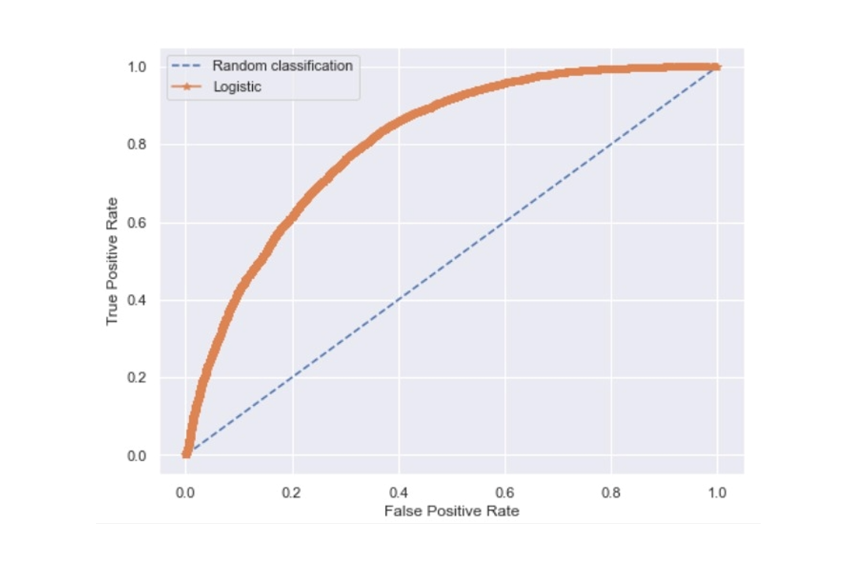

The Area Under the Curve (AUC) is 0.80, which indicates that the model classification power is very high

On the other hand the area under the Precision-Recall Curve (0.66) is not that high as the AUC ROC but it is enough to admit that the model classifies good.

Logistic: f1=0.737 auc=0.666


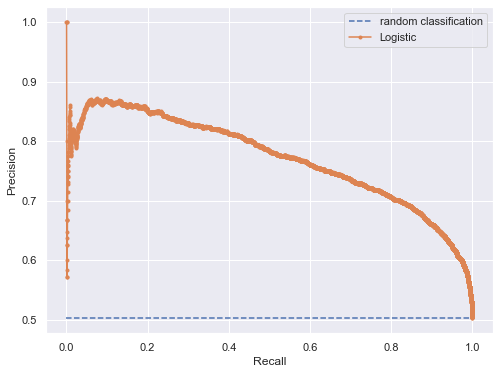

In [109]:
# keep probabilities for the positive outcome only
prob_test = pd.DataFrame(resultCV_LR.predict_proba(X_test_LR[selected_LR]))
prob_test = prob_test[1] 

# predict class values
yhat_test = resultCV_LR.predict(X_test_LR[selected_LR])
precision, recall, threshold = precision_recall_curve(y_test_LR, prob_test)
f1 = f1_score(y_test_LR, yhat_test) 
area_UC = average_precision_score(y_test_LR, yhat_test)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (f1, area_UC))
# plot the precision-recall curves
rndm_class = len(y_test_LR[y_test_LR==1]) / len(y_test_LR)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [rndm_class, rndm_class], linestyle='--', label='random classification')
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

### Threshold Definition

As we have explained above, it is very important to analyze which is the best cut-off from which a song is considered Hit. By default, *scikit-learn* assign this limit to 0.5. So, when the predicted Hit probability is greater than 0.5 its estimation considers that track as Hit. Then it calculates the indicators we have to analyze before selecting the most significant features, such as accuracy, precision, recall and F1-Score.

But the business requirements are more demanding than 0.5. Because when a radio requires only hits, that means only hits. So, we must maximize the recall indicator. The recall calculates the percentages of predicted true hits in the model that are real Hit, it tries to minimize the false Hit. Besides, the precision tries to minimize false flops. From all the Hit, how many the model indicates they are. If we were hired by a radio called No-Flop FM! We should maximize precision.

So, we have developed a function that allows us to play with different cut-offs to find the one which better meets our requirements.

In [ ]:
def threshold(X = X_test[selected], model = resultCV, threshold = 0.5):
    prob_test = pd.DataFrame(model.predict_proba(X).round(3))
    
    prob_test.loc[prob_test[1] > threshold, 'yhat'] = 1
    prob_test.loc[prob_test[1] <= threshold, 'yhat'] = 0
    
    y_threshold = pd.concat([prob_test, y_test.reset_index(drop = True)], axis = 1)
    cross_threshold = pd.crosstab(y_threshold["hit"], y_threshold["yhat"], margins = True)
    
    precision = cross_threshold[1][1] / (cross_threshold[1][1] + cross_threshold[0][1])
    recall = cross_threshold[1][1] / (cross_threshold[1][1] + cross_threshold[1][0])
    print("\n")
    print("Precision", precision.round(3))
    print("Recall", recall.round(3))
    print("\n")
    return cross_threshold

threshold(X_test[selected],resultCV, 0.8)

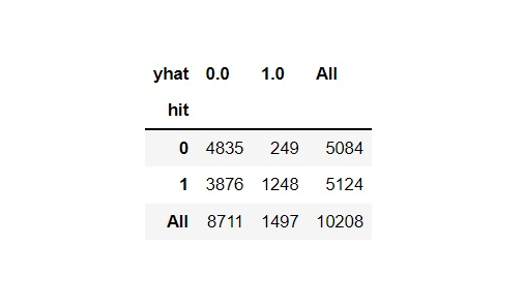

### Test results:

Threshold = 0.6  
- precision = 0.603  
- recall =  0.753
- Total Nº Hit predicted = 4101

Threshold = 0.7 
- precision =  0.451  
- recall =  0.787 
- Total Nº Hit predicted = 2935
                    
Threshold = 0.8 
- precision =  0.244  
-  recall =  0.834 
- Total Nº Hit predicted = 1497
                    
If we take the riskiest scenario, threshold = 0.8, the recall is very high, it only fails in 16.6% of the tracks, but the precision is too low, only 24%. So, there would be 76% of Hit that the radio would lose and will gift to the other radios. Additionally, the entire test set (N = 10208) only take account of 15% of the tracks.

In conclusion, the most prudent solution, at least at the beginning, is to take the second scenario. With a threshold equal to 0.7, the recall is still very high, 78.8% and the precision increases 20 percentual points (up to 45%). Also, the variety of music tracks that the radio can play is much bigger, around 30% of the proposals.

### 1.2.3 Multinomial Classification Task (Discrete Valence)

In the next step, we build a model which predicts the feature discrete valence. The main difference between the next models and the previous is that the target variable has 3 levels, it is multinomial.

The first thing we do is to rebalance the discrete valence and split the data in train and test

### 1.2.3.1. Logistic Regression

In [67]:
amostra_Neg = df_LR[df_LR['discrete_valence'] == "Negative"].sample(n=10000, random_state=45)
amostra_Pos = df_LR[df_LR['discrete_valence'] == "Positive"].sample(n=10000, random_state=45)
amostra_Neu = df_LR[df_LR['discrete_valence'] == "Neutral"].sample(n=10000, random_state=45)
amostra_multiN = pd.concat([amostra_Neg, amostra_Pos, amostra_Neu])


X_train_LR_MN, X_test_LR_MN, y_train_LR_MN, y_test_LR_MN = train_test_split(
    amostra_multiN[['instrumentalness', 'danceability','loudness', 'acousticness', 
                                       'energy', 'speechiness', 'tempo', 'duration_ms', 'chorus_hit',
                                       'sections', 'key','liveness','decade2','mode','time_signature']], 
    amostra_multiN.discrete_valence, stratify=amostra_multiN.discrete_valence, random_state=42)

In [ ]:
# Função feature selection com parâmetro para multinomial
features_LR_MN = ['instrumentalness', 'danceability','loudness', 'acousticness', 
                                       'energy', 'speechiness', 'tempo', 'duration_ms', 'chorus_hit',
                                       'sections', 'key','liveness','decade2','mode','time_signature']
classifier_LR_MN = LogisticRegression(multi_class = 'multinomial', solver='liblinear', penalty = 'l2', C = 1);

forward_selectedCV(X_train_LR_MN, X_train_LR_MN, list(features_LR_MN), classifier_LR_MN, multi_class = 'multinomial', penalty = 'none', c = 1)

### 1.2.3.2. Naïve Bayes

In [56]:
numerical_valence = list(numerical)
numerical_valence.remove('valence')

features_valence = list(features)
features_valence.remove('valence')

In [124]:
Xpd_NB_valence = Xpd_NB.copy()
Xpd_NB_valence = Xpd_NB_valence.drop(columns = 'valence')
ypd_NB_valence = df_NB['discrete_valence']

In here the stratification is an even more important step because the new target discrete_valence is not perfectly balanced.

In [125]:
X_train_NB_valence, X_test_NB_valence, y_train_NB_valence, y_test_NB_valence = train_test_split(Xpd_NB_valence.values, ypd_NB_valence.values, stratify=ypd_NB_valence.values, random_state=42)

X_train_NB_valence = pd.DataFrame(X_train_NB_valence, columns=Xpd_NB_valence.columns)
X_test_NB_valence = pd.DataFrame(X_test_NB_valence, columns=Xpd_NB_valence.columns)

In [126]:
# standardize data
X_train_NB_valence, X_test_NB_valence = minmax_ss_scaler(X_train_NB_valence, X_test_NB_valence,list(numerical_valence), minmax=False, sscaler=True)

In [127]:
classifier_NB_valence = GaussianNB()

selected_NB_valence = modified_forward_selectedCV(X_train_NB_valence, y_train_NB_valence, classifier_NB_valence,\
                            list(features_valence), list(categorical), list(ohe_columns_NB))

Selected Features:  ['danceability', 'energy', 'decade_0.0', 'decade_1.0', 'decade_2.0', 'decade_3.0', 'decade_4.0', 'decade_5.0', 'mode_0', 'mode_1'] 
 0.5839 0.5829 

Total Time:  32.11510896682739 




### 1.2.3.3. Decision Tree

In [48]:
Xpd_DT_valence = Xpd_DT.copy()
Xpd_DT_valence = Xpd_DT_valence.drop(columns = 'valence')
ypd_DT_valence = df_DT['discrete_valence']

In [49]:
X_train_DT_valence, X_test_DT_valence, y_train_DT_valence, y_test_DT_valence = train_test_split(Xpd_DT_valence.values, ypd_DT_valence.values, stratify=ypd_DT_valence.values, random_state=42)

X_train_DT_valence = pd.DataFrame(X_train_DT_valence, columns=Xpd_DT_valence.columns)
X_test_DT_valence = pd.DataFrame(X_test_DT_valence, columns=Xpd_DT_valence.columns)

**A simple decision tree for multinomial with max_depth = 3 for visualization purposes**

In [ ]:
from sklearn.metrics import f1_score

# have to input criterior automatically next
classifier_DT = tree.DecisionTreeClassifier(max_depth=3)
classifier_DT = classifier_DT.fit(X_train_DT.values, y_train_DT)

y_pred = classifier_DT.predict(X_test_DT.values)

train_set_acc = f1_score(y_train_DT, classifier_DT.predict(X_train_DT.values), average='macro')
fin_test_acc = f1_score(y_test_DT, y_pred, average='macro')

print("%0.3f training test accuracy and %0.2f test set accuracy" % (train_set_acc,
                                                                     fin_test_acc))

In [131]:
import pydot
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def display_tree(the_tree, feature_names, class_names, fname, figsize=(10,10)):
    tree.export_graphviz(the_tree, out_file=fname+".dot",
                         feature_names=feature_names,
                         class_names=class_names,
                         filled=True, rounded=True,
                         special_characters=True)
    
    
    (graph,) = pydot.graph_from_dot_file(fname+".dot")
    graph.write_png(fname+".png")
    img = mpimg.imread(fname+".png")
    plt.figure(figsize = figsize)
    imgplot = plt.imshow(img)

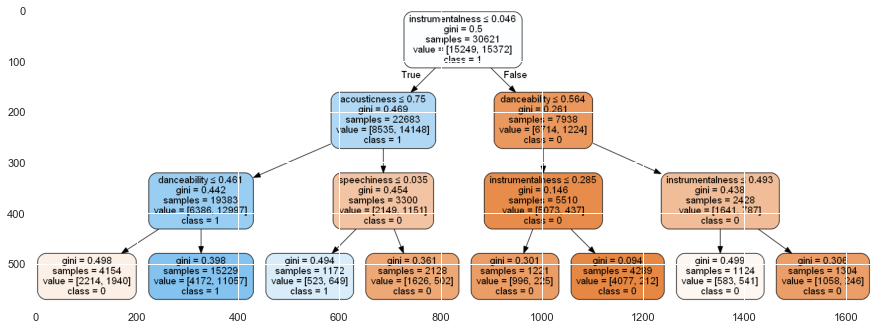

In [132]:
display_tree(classifier_DT, X_test_DT.columns.tolist(), np.unique(y_test_DT).astype(str), "clf", (15,15)) # display tree

In [57]:
classifier_DT_valence = tree.DecisionTreeClassifier()
selected_DT_valence = modified_forward_selectedCV(X_train_DT_valence, y_train_DT_valence, classifier_DT_valence,\
                            list(features_valence), list(categorical), list(ohe_columns_DT))

Selected Features:  ['danceability'] 
 0.5131 0.5065 

Total Time:  24.58799719810486 




In [ ]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# define models to optimize
parameters = {'min_samples_leaf': np.arange(5, 15),
              'max_depth': np.arange(15, 25)}

X_test_DT_valence = tree.DecisionTreeClassifier()
X_test_DT_valence = GridSearchCV(classifier_DT_valence, parameters, scoring='f1_macro', cv=10, n_jobs=-1, return_train_score=True)
X_test_DT_valence.fit(X_train_DT_valence.values, y_train_DT_valence)
print('DecisionTreeClassifier \n\t with score {} \t using best parameters {}.\n'.format(classifier_DT_valence.best_score_, classifier_DT_valence.best_params_))

The tree scored slightly lower for the multinomial but still the drop from one task to the other was less than with other models. The grid search presented similar results to the binary classification tree when looking for hyper-parameter tuning.

### 1.2.3.4. KNN

In [60]:
Xpd_KNN_valence = Xpd_KNN.copy()
Xpd_KNN_valence = Xpd_KNN_valence.drop(columns = 'valence')
ypd_KNN_valence = df_KNN['discrete_valence']

In [61]:
X_train_KNN_valence, X_test_KNN_valence, y_train_KNN_valence, y_test_KNN_valence = train_test_split(Xpd_KNN_valence.values, ypd_KNN_valence.values, stratify=ypd_KNN_valence.values, random_state=42)

X_train_KNN_valence = pd.DataFrame(X_train_KNN_valence, columns=Xpd_KNN_valence.columns)
X_test_KNN_valence = pd.DataFrame(X_test_KNN_valence, columns=Xpd_KNN_valence.columns)

In [62]:
# Data Scaling and Normalization
X_train_KNN_valence, X_test_KNN_valence = minmax_ss_scaler(X_train_KNN_valence, X_test_KNN_valence, list(numerical_valence), minmax=True, sscaler=True)

In [65]:
# run 'forward_select()' function for K in range 20
'''
for i in range(20): 
    start = time.time()    
    K = i+1

    if (K % 3 == 0): 
        continue
        
        print("Selecting the best candidate features for K =",K,"...","\n")
        
        classifier_KNN_valence = neighbors.KNeighborsClassifier(n_neighbors= K)
        
        selected_KNN_valence = modified_forward_selectedCV(X_train_KNN_valence, y_train_KNN_valence, classifier_KNN_valence,\
                            list(features_valence), list(categorical), list(ohe_columns_NB))
                            
        modified_forward_selectedCV(X_train_KNN, y_train_KNN, classifier_KNN,\
                                    list(features), list(categorical), list(ohe_columns_KNN))
'''

valence_feature_selection_output = open("knn_feature_selection_discrete_valence_output.txt", "r")
print(valence_feature_selection_output.read())

Best Candidate Features for K= 1 : ['danceability', 'energy', 'decade_0.0', 'decade_1.0', 'decade_2.0', 'decade_3.0', 'decade_4.0', 'decade_5.0', 'duration_ms', 'tempo', 'speechiness', 'loudness', 'instrumentalness'] 
 F1_Score: 0.5691 
 Total Time : 1119.4641528129578  sec 


Best Candidate Features for K= 2 : ['danceability', 'decade_0.0', 'decade_1.0', 'decade_2.0', 'decade_3.0', 'decade_4.0', 'decade_5.0', 'energy', 'tempo', 'speechiness', 'duration_ms', 'loudness', 'instrumentalness'] 
 F1_Score: 0.5608 
 Total Time : 727.9545199871063  sec 


Best Candidate Features for K= 4 : ['danceability', 'energy', 'decade_0.0', 'decade_1.0', 'decade_2.0', 'decade_3.0', 'decade_4.0', 'decade_5.0', 'duration_ms', 'tempo', 'speechiness', 'loudness'] 
 F1_Score: 0.6004 
 Total Time : 529.5460317134857  sec 


Best Candidate Features for K= 5 : ['danceability', 'energy', 'decade_0.0', 'decade_1.0', 'decade_2.0', 'decade_3.0', 'decade_4.0', 'decade_5.0', 'duration_ms', 'tempo', 'speechiness', 'lo

This time, to predict Discrete Valence, we choose K=13 as the best value for K to be used in the KNN classification model.

#### For K=13

In [144]:
selected = ['danceability', 'energy', 'decade_0.0', 'decade_1.0', 'decade_2.0', 'decade_3.0', 
            'decade_4.0', 'decade_5.0', 'duration_ms', 'tempo', 'speechiness', 'loudness', 'instrumentalness'] 

# Model Classification for K = 13
knn = neighbors.KNeighborsClassifier(n_neighbors= 13)
knn_selected_train = knn.fit(X_train_KNN_valence[selected], y_train_KNN_valence.ravel())
knn_selected_train_score = knn_selected_train.score(X_train_KNN_valence[selected], y_train_KNN_valence).round(4)

print("Training Test set Accuracy for K=13:", knn_selected_train_score)

Training Test set Accuracy for K=13: 0.6906


Text(0.5, 1.0, 'Predicting Discrete Valence Confusion Matrix - K=13 - Best Features - Training Test Set\n')

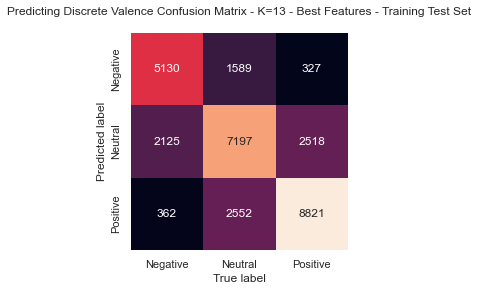

In [145]:
# Predictions for train set
y_train_pred = knn_selected_train.predict(X_train_KNN_valence[selected])

# Confusion Matrix - Train Set
cm_train = confusion_matrix(y_train_KNN_valence, y_train_pred, labels=knn.classes_)
 

sns.heatmap(cm_train.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=knn.classes_,
            yticklabels=knn.classes_)

plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.title('Predicting Discrete Valence Confusion Matrix - K=13 - Best Features - Training Test Set\n')

In [146]:
# Classification Report - Train Set
print("Predicting Discrete Valence Classification Report - Training Test Set - K=13\n\n",
      classification_report(y_train_KNN_valence, y_train_pred))

Predicting Discrete Valence Classification Report - Training Test Set - K=13

               precision    recall  f1-score   support

    Negative       0.73      0.67      0.70      7617
     Neutral       0.61      0.63      0.62     11338
    Positive       0.75      0.76      0.75     11666

    accuracy                           0.69     30621
   macro avg       0.70      0.69      0.69     30621
weighted avg       0.69      0.69      0.69     30621



### 1.2.4 Results and discussion for the multinomial classification task

### 1.2.4.1. Logistic Regression

In [ ]:
selected_MN = ['danceability', 'decade2', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'liveness']

resultCV_MN = LogisticRegression(multi_class='multinomial',solver='lbfgs', 
                                          penalty= 'none', C = 1).fit(X_train[selected_MN], y_train)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(resultCV_MN, X_train[selected_MN], y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print("Train set score (Accuracy) =", resultCV_MN.score(X_train[selected_MN], y_train).round(4))
print("Test set score (Accuracy) =", resultCV_MN.score(X_test[selected_MN], y_test).round(4))
conf_mat = confusion_matrix(y_train, resultCV_MN.predict(X_train[selected_MN]))
print(tabulate(conf_mat,headers = ['pred 0','pred 1', 'pred 2'], showindex = ['real 0','real 1', 'real 2'], tablefmt = 'fancy_grid'))

print(classification_report(y_train, resultCV_MN.predict(X_train[selected_MN])))

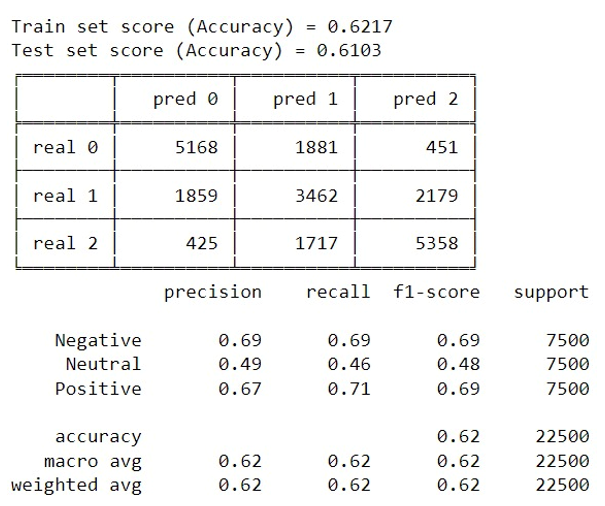

The test accuracy is around 0.61. It is close to train's, so we discard overfitting. These indicators are both lower than the Hit prediction, especially for the class Neutral. Their precision and recall are so low, under 50%. However, the model is a good predictor for Negative and Positive

### 1.2.4.2. Naïve Bayes

In [109]:

selected = ['danceability', 'energy', 'decade_0.0', 'decade_1.0', 'decade_2.0',
            'decade_3.0', 'decade_4.0', 'decade_5.0', 'mode_0', 'mode_1']

# have to input criterior automatically next
classifier_NB_valence = GaussianNB().fit(X_train_NB_valence[selected], y_train_NB_valence)

y_pred_NB_valence = classifier_NB_valence.predict(X_test_NB_valence[selected])

train_set_acc_valence = f1_score(y_train_NB_valence, classifier_NB_valence.predict(X_train_NB_valence[selected]), average='macro')
fin_test_acc_valence = f1_score(y_test_NB_valence, y_pred_NB_valence, average='macro')

# from sklearn.metrics import accuracy_score
# train_set_acc = accuracy_score(y_tt, clf.predict(X_tt))
# fin_test_acc = accuracy_score(y_val, y_pred)

print("%0.3f training test accuracy and %0.2f test set accuracy" % (train_set_acc_valence,
                                                                     fin_test_acc_valence))

0.584 training test accuracy and 0.59 test set accuracy


In [110]:
# Predictions for test set

# Confusion Matrix - Train Set
cm_test = confusion_matrix(y_test_NB_valence, y_pred_NB_valence, labels=classifier_NB_valence.classes_)
 

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classifier_NB_valence.classes_,
            yticklabels=classifier_NB_valence.classes_)

plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.title('Predicting Discrete Valence - NB - Validation Set')

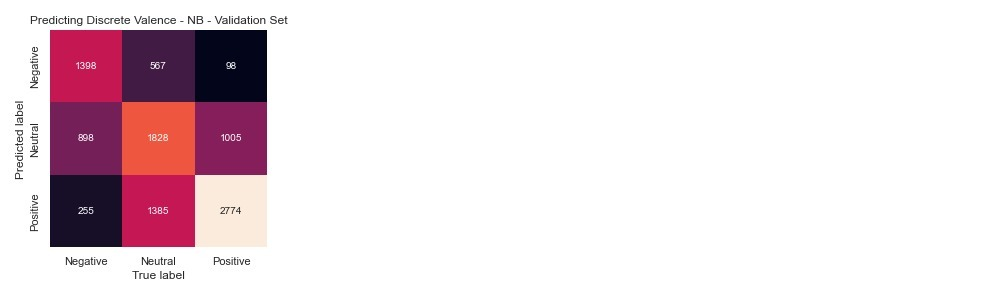

In [ ]:
print("Predicting Valence Classification Report - NB - Validation Set\n\n",
      classification_report(y_test_NB_valence, y_pred_NB_valence))

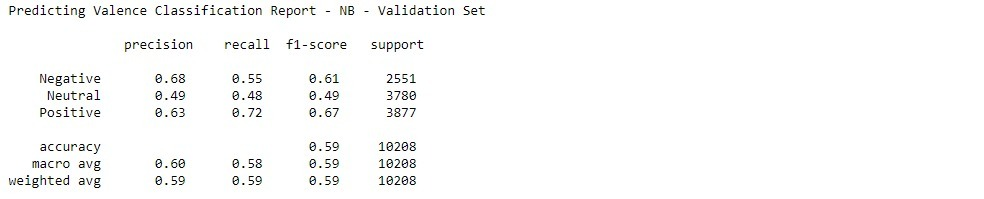

This model was the one with the weaker results and the largest drop in score between tasks. 

For this classifier the selected features are:

*  *'danceability', 'energy', 'decade'*

Although the performance of the classifier is lower than others, we can see some resemblance to the selected features of other classifiers for valence. From the classification report we see that f1 score is lower for Neutral valence and higher for positive valence. Precision and recall follow a similar trend although Negative valence has a higher value. here we are considering all valence of same importance but this model could still be useful if we wanted to give preference to the prediction of Positive Valence.

The confusion matrix shows more detail into what target is best defined by our classifier. We can see for example that True Positives are seldom classified has Negative by our model much more than the inverse, meaning once again that the classifier is best in finding Positive valence tracks.

### 1.2.4.3. Decision Tree

In here we validate the chosen classifier and hyperparameters with our test set. The results are similar to what we got out of the grid search which is positive.

In [111]:
from sklearn.metrics import f1_score

# have to input criterior automatically next
classifier_DT_valence = tree.DecisionTreeClassifier(max_depth= 11, min_samples_leaf= 17)
classifier_DT_valence = classifier_DT_valence.fit(X_train_DT_valence.values, y_train_DT_valence)

y_pred = classifier_DT_valence.predict(X_test_DT_valence.values)

train_set_acc = f1_score(y_train_DT_valence, classifier_DT_valence.predict(X_train_DT_valence.values), average='macro')
fin_test_acc = f1_score(y_test_DT_valence, y_pred, average='macro')

print("%0.3f training test accuracy and %0.2f test set accuracy" % (train_set_acc,
                                                                     fin_test_acc))

0.703 training test accuracy and 0.62 test set accuracy


In [112]:
# para a discussão

classifier_DT_valence.get_depth()

11

In [113]:
# para a discussão

classifier_DT_valence.get_n_leaves()

697

In [114]:
# Predictions for test set

# Confusion Matrix - Test Set
cm_test_DT = confusion_matrix(y_test_DT_valence, y_pred, labels=classifier_DT_valence.classes_)
 

sns.heatmap(cm_test_DT.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classifier_DT_valence.classes_,
            yticklabels=classifier_DT_valence.classes_)

plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.title('Predicting Discrete Valence - DT - Validation Set')

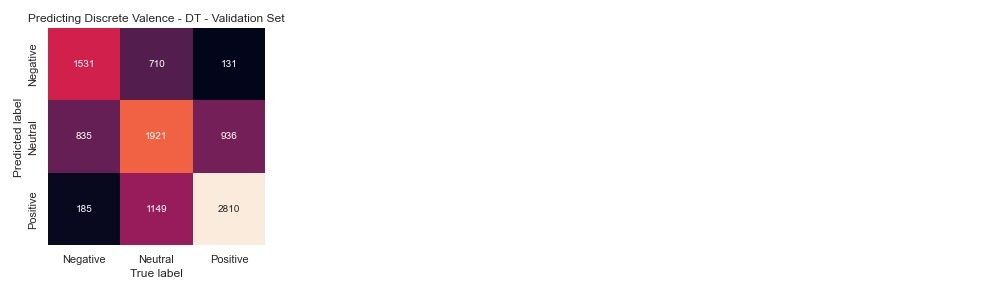

In [ ]:
print("Predicting Valence Classification Report - DT - Validation Set\n\n",
      classification_report(y_test_DT_valence, y_pred))

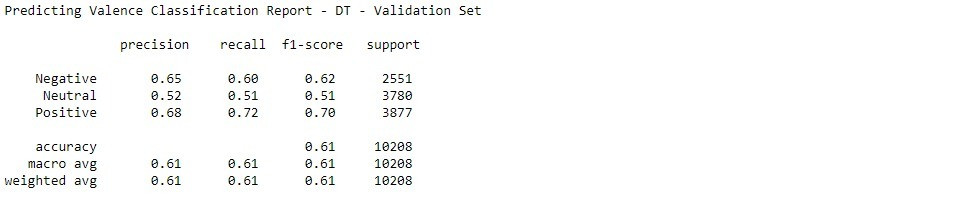

The results for the decision tree are poorer than for the binary classification following the trend of the other classifiers. Although we had considerable less performance for this multinomial classification task, the optimized hyperparameters of the tree are very close to the ones found in the binary classification.

The prediction of discrete valence through the decision three is good, however neutral class is not well classified. For recall we have a similar situation, the two important values of discrete valence are well predicted, negative and positive. It can be seen it in the confusion matrix above, that the misclassification are more frequent in neutral class..

### 1.2.4.4. KNN

In [150]:
selected = ['danceability', 'energy', 'decade_0.0', 'decade_1.0', 'decade_2.0', 'decade_3.0', 
            'decade_4.0', 'decade_5.0', 'duration_ms', 'tempo', 'speechiness', 'loudness', 'instrumentalness'] 

# Model Classification for K = 13
knn = neighbors.KNeighborsClassifier(n_neighbors= 13)
knn_selected_test = knn.fit(X_test_KNN_valence[selected], y_test_KNN_valence.ravel())
knn_selected_test_score = knn_selected_test.score(X_test_KNN_valence[selected], y_test_KNN_valence).round(4)

print("Validation set Accuracy for K=13:", knn_selected_test_score)

Validation set Accuracy for K=13: 0.6786


Text(0.5, 1.0, 'Predicting Discrete Valence Confusion Matrix - K=13 - Best Features - Validation Set\n')

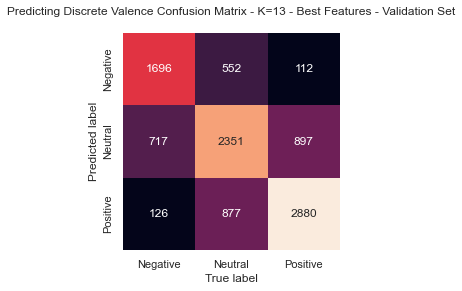

In [153]:
# Predictions for test set
y_test_pred = knn_selected_test.predict(X_test_KNN_valence[selected])

# Confusion Matrix - Train Set
cm_test = confusion_matrix(y_test_KNN_valence, y_test_pred, labels=knn.classes_)
 

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=knn.classes_,
            yticklabels=knn.classes_)

plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.title('Predicting Discrete Valence Confusion Matrix - K=13 - Best Features - Validation Set\n')

In [152]:
# Classification Report - Test Set
print("Predicting Discrete Valence Classification Report - Validation Set - K=13\n\n",
      classification_report(y_test_KNN_valence, y_test_pred))

Predicting Discrete Valence Classification Report - Validation Set - K=13

               precision    recall  f1-score   support

    Negative       0.72      0.67      0.69      2539
     Neutral       0.59      0.62      0.61      3780
    Positive       0.74      0.74      0.74      3889

    accuracy                           0.68     10208
   macro avg       0.68      0.68      0.68     10208
weighted avg       0.68      0.68      0.68     10208



Evaluating the obtained results of the classification model to predict Discrete Valence, we started to infer that the best-selected features were:

*  *'danceability'*, *'energy'*, *'decade'*, *'duration_ms'*, *'tempo'*, *'speechiness'*, *'loudness'*, *'instrumentalness'*

The confusion matrix presents the matrix that correlates the true and the predicted labels for all the classes of the target Discrete Valence (*Negative*, *Neutral* and *Positive*). Infering the results, supported with by the classification report, we can conclude that the KNN model:

* Negative Discrete Valence:

    - Predicted correctly 1735 tracks, supported with a F1 score = 0.70, precision = 0.73, recall = 0.67 and a support = 2607.


* Neutral Discrete Valence:

     - Predicted correctly 2316 tracks, supported with a F1 score = 0.61, precision = 0.60, recall = 0.62 and a support = 3740.


* Positive Discrete Valence:

     - Predicted correctly 2910 tracks, supported with a F1 score = 0.75, precision = 0.74, recall = 0.75 and a support = 3861.

## Task 2 (Unsupervised Learning) - Characterizing Tracks

## 2.1. Introduction

Sometimes these models are not perfect, they need some help from other tools, such as rules. It is common to have a track with high Hit probability but after some time it fails. For example, a track with more than 10 minutes is difficult to be a Hit, even if its danceability and energy are the best, so input exclusion rules before take the final decision of if a song wil be a Hit is recommendable.

## 2.2. Preprocessing Data for Association Rule Mining

In [82]:
# One hot encoding of numerical features to binary 0,1 or boolean

def ohencode_num_to_cat(to_encode, nums, cat, boolean=False):

    # categorical
    data_cat = to_encode[cat]

    # encode numerical
    encode_num = to_encode[nums]
    if boolean==True:
        enc = OneHotEncoder(dtype=bool)
    else:
        enc = OneHotEncoder()
    encode_num = enc.fit_transform(to_encode[nums]).toarray()
    encode_num = pd.DataFrame(encode_num, columns=enc.get_feature_names(nums))


    # concatenate
    encoded = pd.concat([data_cat, encode_num], axis=1) # attributes

    enc_features = (encoded.columns).difference(nums).difference(cat)
    enc_features
    
    return encoded, enc_features

In [79]:
# to bin the values in selected features

from sklearn.preprocessing import KBinsDiscretizer

def bin_numerical(data, nums, bins):
    est = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='quantile')
    est.fit(data[nums])
    data[nums] = est.transform(data[nums])

    return data

In [74]:
# generating itemsets and rules from the original dataframe and with options

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

def extract_isets_rules(transactions, minim_sup, min_thres):
    
    # frequent itemsets

    freq_itemsets = apriori(transactions, min_support=minim_sup, use_colnames=True)
    freq_itemsets['length'] = freq_itemsets['itemsets'].apply(lambda x: len(x))
    freq_item_for_rules = freq_itemsets.copy()
    
    # rules
    
    rul = association_rules(freq_item_for_rules, metric="confidence", min_threshold=min_thres)#, support_only=True)
    #rul = rul[(rul['lift'] > 1)]

    rul['ante_length'] = rul['antecedents'].apply(lambda x: len(x))
    rul['cons_length'] = rul['consequents'].apply(lambda x: len(x))

    return freq_itemsets, rul, transactions

In [75]:
#initial preprocessing for rule mining classification of flop, hit

df_RM = df.copy(deep=True)

# need to drop multinomial target
to_drop = ['valence']
df_RM=df_RM.drop(columns=to_drop)

# numerical without valence
numerical_RM = list(numerical)
numerical_RM.remove('valence')

# categorical with targets from previous task
categorical_RM = list(categorical) + list(targets)

# drop meta
df_RM=df_RM.drop(columns=meta)

In [76]:
categorical_RM = list(categorical) + list(targets)

In [77]:
df_RM, encoded_features = ohencode(df_RM, numerical_RM, categorical_RM, boolean=True)

In [80]:
# diferent bins for diferent distributions, binned by frequency because of skewed and not normal distributions


numerical_8bins = ['energy']
numerical_5bins = ['danceability','loudness','liveness','tempo','chorus_hit',
                  'speechiness','acousticness','duration_ms','sections']
numerical_3bins = ['instrumentalness'] # many bins didn't make sense or were not possible


df_RM = bin_numerical(df_RM, numerical_8bins, 8)
df_RM = bin_numerical(df_RM, numerical_5bins, 5)
df_RM = bin_numerical(df_RM, numerical_3bins, 3) 

In [83]:
df_RM, encoded_features = ohencode_num_to_cat(df_RM, numerical_RM, encoded_features, boolean=True)

Association rule mining uses only categorical data in which each value is considered a different item. So, the first step is to understand which features have values that may or may not have meaning in their original form.

From the table above we see that there are many features with a great number of possible values. Excluding the first three (track, artist, uri) as meta features, as already done before, most features show values in the scale of thousands, and are floats, representing perhaps the idea of a continuous variable. To ensure that the model runs in reasonable time and to help with the interpretation of results it is therefore necessary to group/bin the values for each of these features.

Features with a relatively small number of values are key, mode, time, signature, decade which we already considered before as categorical features with no ordinal meaning.

Hit is the target from the previous tasks and is also categorical.

Sections is the only feature that is numerical, is ordered and is an integer and interestingly it has a relatively intermediate number of possible values. For this feature we also use binning to improve interpretation of results.

## 2.3. Finding Associations

The power of an itemset and rule can be quantified by concrete measures but based on those measures, the relative interest between different itemsets and between different rules is more difficult to assess. Whether or not a rule is interesting can be assessed either subjectively or objectively [Data Mining Concepts and Techniques, Han et al., 2011]. Those measures are also associated with each dataset so a good support in one dataset might be a poor one in another. Considering all this we experimented with different combinations of several arguments to find a set or itemsets and rules that could be of interest considering not only the concrete numbers but also knowledge domain (with as little knowledge as we may have of the music industry) essencial for a good association rule mining.

Below we use the previously defined functions to extract the itemsets and rules. We start by considering that the predicted targets from Task 1 (hit, discrete valence) should be part of the features in this analysis because it would be valuable to find if there are any interesting associations involving them. By considering this features we can consolidate the notions we have for the dataset and the other tasks by finding similarities between what we may observe in this task and the others.

To bin a feature in the context of association rule mining is to define that particular bin as a category of it's own. Because of this, an increased number of bins means that we have more items in our dataset and each item will show up less. So, it seems important to strike a balance between extracting meaningful (and actionable rules) and diluting the meaning of each feature such that it will show up less with increasing number of bins. Because of this we used the previously defined bins in Task 1 which to remind were:

* numerical_8bins = ['energy']
* numerical_5bins = ['danceability','loudness','liveness','tempo','chorus_hit','speechiness','acousticness','duration_ms','sections']
* numerical_3bins = ['instrumentalness']


In order to get a better view of the dataset we set our thresholds low both for support of itemsets and threshold of association rules. Extracting frequent itemsets and rules:

In [84]:
frequent_itemsets, rules, df_RM = extract_isets_rules(df_RM, 0.05, 0.05)

### 2.3.1 Frequent itemsets

In [85]:
frequent_itemsets['length'].value_counts()

3    888
2    728
4    278
1     82
5     14
Name: length, dtype: int64

In the above output we observe a 2000+ number of itemsets obtained.

In [86]:
#display options

pd.set_option('display.max_colwidth', None)

In [87]:
frequent_itemsets.sort_values(['support'],ascending=False).groupby('length').head(5)

support  \
25    0.883294   
23    0.693796   
467   0.611379   
10    0.501996   
9     0.498004   
352   0.467903   
293   0.415391   
8     0.379804   
351   0.366578   
238   0.362683   
1262  0.338803   
1123  0.272576   
1035  0.256239   
1016  0.225550   
933   0.225208   
1762  0.161429   
1903  0.158172   
1830  0.134953   
1904  0.133557   
1741  0.127777   
1983  0.071273   
1981  0.063582   
1984  0.063509   
1988  0.057018   
1976  0.056357   

                                                                                itemsets  \
25                                                                    (time_signature_4)   
23                                                                              (mode_1)   
467                                                           (time_signature_4, mode_1)   
10                                                                               (hit_1)   
9                                                                                (hit_0)   
352                                                            (time_signature_4, hit_1)   
293                                                            (time_signature_4, hit_0)   
8                                                            (discrete_valence_Positive)   
351                                                                      (hit_1, mode_1)   
238                                        (discrete_valence_Positive, time_signature_4)   
1262                                                   (time_signature_4, hit_1, mode_1)   
1123                                                   (time_signature_4, hit_0, mode_1)   
1035                               (discrete_valence_Positive, time_signature_4, mode_1)   
1016                                (discrete_valence_Positive, time_signature_4, hit_1)   
933                                 (discrete_valence_Neutral, time_signature_4, mode_1)   
1762                        (discrete_valence_Positive, time_signature_4, hit_1, mode_1)   
1903                             (time_signature_4, instrumentalness_0.0, hit_1, mode_1)   
1830                             (time_signature_4, hit_0, instrumentalness_2.0, mode_1)   
1904                             (instrumentalness_1.0, time_signature_4, hit_1, mode_1)   
1741                         (discrete_valence_Neutral, time_signature_4, hit_1, mode_1)   
1983  (discrete_valence_Positive, instrumentalness_0.0, hit_1, mode_1, time_signature_4)   
1981   (instrumentalness_0.0, hit_1, mode_1, discrete_valence_Neutral, time_signature_4)   
1984  (discrete_valence_Positive, hit_1, mode_1, instrumentalness_1.0, time_signature_4)   
1988           (energy_0.0, instrumentalness_2.0, loudness_0.0, hit_0, acousticness_4.0)   
1976  (mode_1, discrete_valence_Negative, instrumentalness_2.0, hit_0, time_signature_4)   

      length  
25         1  
23         1  
467        2  
10         1  
9          1  
352        2  
293        2  
8          1  
351        2  
238        2  
1262       3  
1123       3  
1035       3  
1016       3  
933        3  
1762       4  
1903       4  
1830       4  
1904       4  
1741       4  
1983       5  
1981       5  
1984       5  
1988       5  
1976       5

In the above output we show only the top 5 itemsets by support, grouped by length. We observe as expected that the support decreases for larger itemsets.

The result shown by itemsets of length one or two could probably be expected by a simpler look at the data e.g. the majority of tracks have time_signature_4 so it might be expected to have a strong support between it and other features with higher counts. The category mode_1 is also pervasise so it is natural that the intersection of these two categories results in a length two itemset with also great support. Indeed time_signature_4 and mode_1 is the length two most observed itemset in this dataset, with ~61% of tracks showing those categories.

Also, looking at the higher length itemsets some interesting relations can be found. For example there is one itemset with group length 5 that means that low loudness, low energy, high acousticness, high instrumentalness and flop are found together an interesting amount of times (~6%).

### 2.3.2 Association rules introduction

In [88]:
rules['ante_length'].value_counts()

1    5302
2    4472
3    1252
4      70
Name: ante_length, dtype: int64

Some 11000+ rules were found.

In [89]:
import random
import matplotlib.pyplot as plt

support = rules['support'].values
confidence = rules['confidence'].values
lift = rules['lift'].values

x = support
y = confidence
z = lift

scaled_z = (z - z.min()) / z.ptp()
colors = plt.cm.coolwarm(scaled_z)

plt.scatter(x, y, marker='*', edgecolors=colors, s=1, linewidths=4)
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

plt.scatter(x, z, marker='*', edgecolors=colors, s=1, linewidths=4)
plt.xlabel('support')
plt.ylabel('lift')
plt.show()

plt.scatter(y, z, marker='*', edgecolors=colors, s=1, linewidths=4)
plt.xlabel('confidence')
plt.ylabel('lift')
plt.show()

In the graphs above, we cross the 3 most important measures for our analysis, support, confidence and lift. In all the graphs we have a heatmap for the lift values. In order to extract a good set of rules from the large amount available to us we need to strike a balance between these three measures because generally not all three are positively correlated to one another at the same time e.g. we can get this idea from the support vs lift graph that these two features are negatively correlated. We see that for higher values of lift we have support going to zero, also for values of lift above 1 we don't see many correspondece of support above 0.1.

In [90]:
rules.sort_values(['support','confidence','lift'],ascending=False).groupby('ante_length').head(5)

antecedents  \
771                                                                       (mode_1)   
770                                                             (time_signature_4)   
541                                                                        (hit_1)   
540                                                             (time_signature_4)   
423                                                                        (hit_0)   
4170                                                               (hit_1, mode_1)   
4168                                                     (time_signature_4, hit_1)   
4169                                                    (time_signature_4, mode_1)   
3336                                                               (hit_0, mode_1)   
3334                                                     (time_signature_4, hit_0)   
7682                                    (discrete_valence_Positive, hit_1, mode_1)   
7680                          (discrete_valence_Positive, time_signature_4, hit_1)   
7681                         (discrete_valence_Positive, time_signature_4, mode_1)   
7683                                             (time_signature_4, hit_1, mode_1)   
9657                                         (instrumentalness_0.0, hit_1, mode_1)   
10886             (discrete_valence_Positive, instrumentalness_0.0, hit_1, mode_1)   
10887   (discrete_valence_Positive, time_signature_4, instrumentalness_0.0, hit_1)   
10888  (discrete_valence_Positive, time_signature_4, instrumentalness_0.0, mode_1)   
10890                      (time_signature_4, instrumentalness_0.0, hit_1, mode_1)   
10889                 (discrete_valence_Positive, time_signature_4, hit_1, mode_1)   

                       consequents  antecedent support  consequent support  \
771             (time_signature_4)            0.693796            0.883294   
770                       (mode_1)            0.883294            0.693796   
541             (time_signature_4)            0.501996            0.883294   
540                        (hit_1)            0.883294            0.501996   
423             (time_signature_4)            0.498004            0.883294   
4170            (time_signature_4)            0.366578            0.883294   
4168                      (mode_1)            0.467903            0.693796   
4169                       (hit_1)            0.611379            0.501996   
3336            (time_signature_4)            0.327218            0.883294   
3334                      (mode_1)            0.415391            0.693796   
7682            (time_signature_4)            0.166058            0.883294   
7680                      (mode_1)            0.225550            0.693796   
7681                       (hit_1)            0.256239            0.501996   
7683   (discrete_valence_Positive)            0.338803            0.379804   
9657            (time_signature_4)            0.171447            0.883294   
10886           (time_signature_4)            0.073649            0.883294   
10887                     (mode_1)            0.096696            0.693796   
10888                      (hit_1)            0.099194            0.501996   
10890  (discrete_valence_Positive)            0.158172            0.379804   
10889       (instrumentalness_0.0)            0.161429            0.333048   

        support  confidence      lift  leverage  conviction  ante_length  \
771    0.611379    0.881209  0.997640 -0.001447    0.982448            1   
770    0.611379    0.692158  0.997640 -0.001447    0.994680            1   
541    0.467903    0.932084  1.055237  0.024493    1.718399            1   
540    0.467903    0.529725  1.055237  0.024493    1.058963            1   
423    0.415391    0.834112  0.944320 -0.024493    0.703525            1   
4170   0.338803    0.924233  1.046349  0.015008    1.540337            2   
4168   0.338803    0.724089  1.043663  0.014174    1.109793            2   
4169   0.338803  

In the above table there are several measures of interest previously mentioned e.g. support, confidence, lift. Combining in different ways the order of those variables we may find different rules of interest. Because support and confidence are misleading as to a strong association rule we need to quantify also the correlation between the ocurrences which can be done with lift as a measure of interestingness.

For the remaining chapter we aim to find rules which have a lenght of the antecedent or consequent >1, skipping simpler rules that could be translated by a simple correlation analysis. We also aim for considerable confidence so rules below 50% are not of interest to us and we also want to find a lift value >1 which means that the antecedent implies an increase in the consequent by a fraction equal to the lift.


Going for the larger lengths of antecedent support and trying to find hit or valence as a consequent we find for example:

(discrete_valence_Positive, mode_1, instrumentalness_0.0, hit_1) then (hit_1) meaning that the ocurrence of the first lifts increases the ocurrence of the latter by a factor of 1.10. mode_1 and intrumentalness_0.0 have higher counts than most categories, but it may be interesting that a more balanced category like discrete_valence_Positive is part of this rule that implies a hit.

### 2.3.3 Association rules exploration

In this section we we look for rules considering the previously mentioned restraints and we decide that the most important rules according to our work are rules where occur, hit, flop or discrete valence.

**Rules for hit_1 as a consequent, ordered by confidence, with considerable length of the antecedent**

In [91]:
rules[rules['consequents'].astype(str).str.contains('hit_1')].sort_values(['confidence'],ascending=False).groupby('ante_length').head(5)

antecedents  \
10159                   (time_signature_4, instrumentalness_0.0, acousticness_1.0)   
4817                                      (instrumentalness_0.0, acousticness_1.0)   
6785                          (decade_10s, instrumentalness_0.0, time_signature_4)   
10215                    (time_signature_4, instrumentalness_0.0, duration_ms_3.0)   
10048                       (time_signature_4, danceability_4.0, acousticness_1.0)   
4770                                          (danceability_4.0, acousticness_1.0)   
1522                                            (decade_10s, instrumentalness_0.0)   
10061                   (time_signature_4, instrumentalness_0.0, danceability_4.0)   
10166                                     (instrumentalness_0.0, acousticness_1.0)   
4865                                       (instrumentalness_0.0, duration_ms_3.0)   
11068               (sections_2.0, time_signature_4, instrumentalness_0.0, mode_1)   
10829   (discrete_valence_Neutral, time_signature_4, instrumentalness_0.0, mode_1)   
10888  (discrete_valence_Positive, time_signature_4, instrumentalness_0.0, mode_1)   
10859      (discrete_valence_Positive, time_signature_4, danceability_4.0, mode_1)   
583                                                             (acousticness_1.0)   
549                                                             (danceability_4.0)   
588                                                         (instrumentalness_0.0)   
4485                                                            (danceability_4.0)   
4581                                                            (acousticness_1.0)   
10948          (discrete_valence_Positive, time_signature_4, mode_1, sections_2.0)   

                     consequents  antecedent support  consequent support  \
10159                    (hit_1)            0.077029            0.501996   
4817                     (hit_1)            0.080531            0.501996   
6785                     (hit_1)            0.061843            0.501996   
10215                    (hit_1)            0.064807            0.501996   
10048                    (hit_1)            0.066252            0.501996   
4770                     (hit_1)            0.066840            0.501996   
1522                     (hit_1)            0.065983            0.501996   
10061                    (hit_1)            0.076465            0.501996   
10166  (time_signature_4, hit_1)            0.080531            0.467903   
4865                     (hit_1)            0.069509            0.501996   
11068                    (hit_1)            0.066399            0.501996   
10829                    (hit_1)            0.086752            0.501996   
10888                    (hit_1)            0.099194            0.501996   
10859                    (hit_1)            0.079110            0.501996   
583                      (hit_1)            0.199882            0.501996   
549                      (hit_1)            0.200470            0.501996   
588                      (hit_1)            0.333048            0.501996   
4485   (time_signature_4, hit_1)            0.200470            0.467903   
4581   (time_signature_4, hit_1)            0.199882            0.467903   
10948                    (hit_1)            0.073820            0.501996   

        support  confidence      lift  leverage  conviction  ante_length  \
10159  0.064293    0.834658  1.662679  0.025624    3.011966            3   
4817   0.067183    0.834246  1.661857  0.026756    3.004471            2   
6785   0.050038    0.809109  1.611783  0.018993    2.608838            3   
10215  0.052242    0.806122  1.605834  0.019709    2.568652            3   
10048  0.053100    0.801479  1.596584  0.019841    2.508567            3   
4770   0.053565    0.801392  1.596412  0.020012    2.507477            2   
1522   0.052781    0.799926  1.593490  0.019658    2.489095            2   
10061  0.061133    0.799488  1.592617  0.022748    2.483655

In the table above we can find rules with great confidence and considerable lift, being that rules of length 3 are already quite interesting and have good values for those interestingness measures we need to resort to knowledge domain to highlight the following five rules from this set, all implying 'hit_1':

* 10158 (acousticness_1.0, instrumentalness_0.0, time_signature_4)
* 6994 (decade_5.0, instrumentalness_0.0, time_signature_4) 	
* 10214 (duration_ms_3.0, instrumentalness_0.0, time_signature_4)
* 10046 (acousticness_1.0, danceability_4.0, time_signature_4)
* 11069 (mode_1, instrumentalness_0.0, sections_2.0, time_signature_4)

The support for these rules is around 0.05-0.10 with very good confidence above 75% and reasonable lift above 1.5.

**Rules for hit_1 as a consequent, ordered by lift, with considerable length of the antecedent**

In [92]:
rules[rules['consequents'].astype(str).str.contains('hit_1')].sort_values(['lift'],ascending=False).groupby('ante_length').head(5)

antecedents  \
6876                                                          (decade_60s, mode_1)   
6889                                                (time_signature_4, decade_60s)   
6879                                                                  (decade_60s)   
1622                                                                  (decade_60s)   
6894                                                                  (decade_60s)   
6874                                                     (duration_ms_0.0, mode_1)   
6886                                           (duration_ms_0.0, time_signature_4)   
6892                                                             (duration_ms_0.0)   
6878                                                             (duration_ms_0.0)   
6792                                      (time_signature_4, instrumentalness_0.0)   
10870                                 (time_signature_4, danceability_4.0, mode_1)   
10159                   (time_signature_4, instrumentalness_0.0, acousticness_1.0)   
6785                          (decade_10s, instrumentalness_0.0, time_signature_4)   
10215                    (time_signature_4, instrumentalness_0.0, duration_ms_3.0)   
10048                       (time_signature_4, danceability_4.0, acousticness_1.0)   
11068               (sections_2.0, time_signature_4, instrumentalness_0.0, mode_1)   
10829   (discrete_valence_Neutral, time_signature_4, instrumentalness_0.0, mode_1)   
10888  (discrete_valence_Positive, time_signature_4, instrumentalness_0.0, mode_1)   
10859      (discrete_valence_Positive, time_signature_4, danceability_4.0, mode_1)   
10948          (discrete_valence_Positive, time_signature_4, mode_1, sections_2.0)   

                                      consequents  antecedent support  \
6876                     (duration_ms_0.0, hit_1)            0.159274   
6889                     (duration_ms_0.0, hit_1)            0.169316   
6879             (duration_ms_0.0, hit_1, mode_1)            0.210733   
1622                     (duration_ms_0.0, hit_1)            0.210733   
6894   (duration_ms_0.0, time_signature_4, hit_1)            0.210733   
6874                          (decade_60s, hit_1)            0.148350   
6886                          (decade_60s, hit_1)            0.166132   
6892        (time_signature_4, decade_60s, hit_1)            0.199980   
6878                  (decade_60s, hit_1, mode_1)            0.199980   
6792                          (decade_10s, hit_1)            0.301085   
10870          (discrete_valence_Positive, hit_1)            0.121874   
10159                                     (hit_1)            0.077029   
6785                                      (hit_1)            0.061843   
10215                                     (hit_1)            0.064807   
10048                                     (hit_1)            0.066252   
11068                                     (hit_1)            0.066399   
10829                                     (hit_1)            0.086752   
10888                                     (hit_1)            0.099194   
10859                                     (hit_1)            0.079110   
10948                                     (hit_1)            0.073820   

       consequent support   support  confidence      lift  leverage  \
6876             0.076245  0.050062    0.314316  4.122463  0.037919   
6889             0.076245  0.051801    0.305945  4.012670  0.038892   
6879             0.063386  0.050062    0.237564  3.747874  0.036705   
1622             0.076245  0.059051    0.280219  3.675246  0.042984   
6894             0.067893  0.051801    0.245816  3.620641  0.037494   
6874             0.105415  0.050062    0.337461  3.201252  0.034424   
6886             0.105415  0.051801    0.311809  2.957911  0.034289   
6892             0.089030  0.051801    0.259032  2.909501  0.033997   
6878             0.088467  0.050062    0.250337  2.829735  0.032371   
6792             0.0

In the above table we repeat the process but ordered by lift and we can see that the rules with best lift have lower confidence like shown in a previous graph. We cannot aim for a lift larger than 2 if we consider our constraint of having the confidence above 50%. The results for confidence values we find acceptable will show approximately the same rules as the ones highlited in the filter before this one.

**Rules for hit_0 as a consequent, ordered by confidence, with considerable length of the antecedent**

In [93]:
rules[rules['consequents'].astype(str).str.contains('hit_0')].sort_values(['confidence'],ascending=False).groupby('ante_length').head(5)

antecedents  \
10797      (loudness_0.0, discrete_valence_Negative, instrumentalness_2.0, acousticness_4.0)   
10766            (energy_0.0, loudness_0.0, discrete_valence_Negative, instrumentalness_2.0)   
9235                                  (loudness_0.0, danceability_0.0, instrumentalness_2.0)   
7177                           (energy_0.0, discrete_valence_Negative, instrumentalness_2.0)   
7205                         (loudness_0.0, discrete_valence_Negative, instrumentalness_2.0)   
11037                     (energy_0.0, loudness_0.0, instrumentalness_2.0, acousticness_4.0)   
7135                     (danceability_0.0, discrete_valence_Negative, instrumentalness_2.0)   
9278                                    (energy_0.0, instrumentalness_2.0, acousticness_4.0)   
10707  (danceability_0.0, discrete_valence_Negative, instrumentalness_2.0, time_signature_4)   
3971                                                      (energy_0.0, instrumentalness_2.0)   
3941                                                (danceability_0.0, instrumentalness_2.0)   
1901                                       (discrete_valence_Negative, instrumentalness_2.0)   
4032                                                (instrumentalness_2.0, acousticness_4.0)   
10737                (energy_0.0, discrete_valence_Negative, loudness_0.0, acousticness_4.0)   
3995                                                    (loudness_0.0, instrumentalness_2.0)   
434                                                                             (energy_0.0)   
477                                                                   (instrumentalness_2.0)   
471                                                                       (acousticness_4.0)   
424                                                                       (danceability_0.0)   
442                                                                           (loudness_0.0)   

      consequents  antecedent support  consequent support   support  \
10797     (hit_0)            0.051948            0.498004  0.050675   
10766     (hit_0)            0.052634            0.498004  0.051091   
9235      (hit_0)            0.054789            0.498004  0.053002   
7177      (hit_0)            0.056088            0.498004  0.054202   
7205      (hit_0)            0.068456            0.498004  0.065958   
11037     (hit_0)            0.059198            0.498004  0.057018   
7135      (hit_0)            0.082417            0.498004  0.079159   
9278      (hit_0)            0.062994            0.498004  0.060496   
10707     (hit_0)            0.057361            0.498004  0.054789   
3971      (hit_0)            0.075118            0.498004  0.071616   
3941      (hit_0)            0.113130            0.498004  0.106003   
1901      (hit_0)            0.132847            0.498004  0.123074   
4032      (hit_0)            0.105464            0.498004  0.097627   
10737     (hit_0)            0.059688            0.498004  0.054961   
3995      (hit_0)            0.118151            0.498004  0.106787   
434       (hit_0)            0.124838            0.498004  0.105268   
477       (hit_0)            0.333415            0.498004  0.260966   
471       (hit_0)            0.200127            0.498004  0.156531   
424       (hit_0)            0.199980            0.498004  0.155772   
442       (hit_0)            0.199956            0.498004  0.152906   

       confidence      lift  leverage  conviction  ante_length  cons_length  
10797    0.975483  1.958787  0.024804   20.475650            4            1  
10766    0.970684  1.949150  0.024879   17.123646            4            1  
9235     0.967367  1.942489  0.025716   15.383087            3            1  
7177     0.966376  1.940498  0.026270   14.929495            3            1  
7205     0.963506  1.934736  0.031867   13.755678            3            1  
11037    0.963177  1.934076  0.027537   13.632861            4            1  
7135     0.960475  1.92865

In the table above we again can find rules with great confidence and considerable lift, being that rules of length 3 are already quite interesting and have good values for those interestingness measures we need to again resort to knowledge domain to highlight the following five rules from this set, all implying 'hit_0':

* 10800 (loudness_0.0, instrumentalness_2.0, discrete_valence_Negative, acousticness_4.0)
* 10770 (loudness_0.0, instrumentalness_2.0, discrete_valence_Negative, energy_0.0)
* 9236 (danceability_0.0, loudness_0.0, instrumentalness_2.0)
* 435 (energy_0.0)
* 477(instrumentalness_2.0)

In this table see more interesting facts. The top confidence and lift values are larger than when we were looking for the same rules but implying 'hit_1'. We find confidence of nearly 1 and lifts of nealy 2. Also, the rules with the highest confidence are rules with larger lengths of 3 and 4. With all this we may conclude that there are stronger rules for 'hit_0' then for 'hit_1'

In the table we can still observe that the category 'discrete_valence_Negative shows up many times in different rules but is not part of the lenght one top rules with most confidence.

**Rules for hit_0 as a consequent, ordered by lift, with considerable length of the antecedent**

In [94]:
rules[rules['consequents'].astype(str).str.contains('hit_0')].sort_values(['lift'],ascending=False).groupby('ante_length').head(5)

antecedents  \
10782                                                     (energy_0.0, instrumentalness_2.0)   
10748                            (loudness_0.0, discrete_valence_Negative, acousticness_4.0)   
11051                                                     (energy_0.0, instrumentalness_2.0)   
10786                                              (loudness_0.0, discrete_valence_Negative)   
11048                                 (loudness_0.0, instrumentalness_2.0, acousticness_4.0)   
10777                        (loudness_0.0, discrete_valence_Negative, instrumentalness_2.0)   
11059                                                       (loudness_0.0, acousticness_4.0)   
10761                                                                           (energy_0.0)   
10759                                                       (loudness_0.0, acousticness_4.0)   
10988                                               (loudness_0.0, acousticness_4.0, mode_1)   
9258                                                                            (energy_0.0)   
11061                                                                           (energy_0.0)   
11001                                                                           (energy_0.0)   
10791                                                                           (energy_0.0)   
10771                          (energy_0.0, discrete_valence_Negative, instrumentalness_2.0)   
10797      (loudness_0.0, discrete_valence_Negative, instrumentalness_2.0, acousticness_4.0)   
10766            (energy_0.0, loudness_0.0, discrete_valence_Negative, instrumentalness_2.0)   
11037                     (energy_0.0, loudness_0.0, instrumentalness_2.0, acousticness_4.0)   
10707  (danceability_0.0, discrete_valence_Negative, instrumentalness_2.0, time_signature_4)   
10737                (energy_0.0, discrete_valence_Negative, loudness_0.0, acousticness_4.0)   

                                                                  consequents  \
10782                        (loudness_0.0, discrete_valence_Negative, hit_0)   
10748                                                     (energy_0.0, hit_0)   
11051                                 (loudness_0.0, hit_0, acousticness_4.0)   
10786                               (energy_0.0, instrumentalness_2.0, hit_0)   
11048                                                     (energy_0.0, hit_0)   
10777                                                     (energy_0.0, hit_0)   
11059                               (energy_0.0, instrumentalness_2.0, hit_0)   
10761      (loudness_0.0, discrete_valence_Negative, hit_0, acousticness_4.0)   
10759                          (energy_0.0, discrete_valence_Negative, hit_0)   
10988                                                     (energy_0.0, hit_0)   
9258                                  (loudness_0.0, hit_0, acousticness_4.0)   
11061           (loudness_0.0, acousticness_4.0, instrumentalness_2.0, hit_0)   
11001                         (loudness_0.0, hit_0, acousticness_4.0, mode_1)   
10791  (loudness_0.0, discrete_valence_Negative, instrumentalness_2.0, hit_0)   
10771                                                   (loudness_0.0, hit_0)   
10797                                                                 (hit_0)   
10766                                                                 (hit_0)   
11037                                                                 (hit_0)   
10707                                                                 (hit_0)   
10737                                                                 (hit_0)   

       antecedent support  consequent support   support  confidence      lift  \
10782            0.075118            0.083078  0.051091    0.680143  8.186786   
10748            0.068358            0.105268  0.054961    0.804013  7.637748   
11051            0.075118            0.099415  0.057018    0.759048  7.635173   
10786            0.094663            0

In the table above we again can find rules with the highest values of lift so far and which also show good confidence. In here we observe that the consequents also appear more frequently in sets of two and three.

**Rules for hit_0 as a consequent, ordered by lift, with considerable length of the antecedent**

In [95]:
rules[rules['consequents'].astype(str).str.contains('discrete_valence_Positive')].sort_values(['confidence'],ascending=False).groupby('ante_length').head(5)

antecedents  \
10860      (time_signature_4, hit_1, danceability_4.0, mode_1)   
8033              (time_signature_4, danceability_4.0, mode_1)   
7711                         (hit_1, danceability_4.0, mode_1)   
2826                                (danceability_4.0, mode_1)   
7795               (time_signature_4, hit_1, danceability_4.0)   
10867                        (hit_1, danceability_4.0, mode_1)   
2706                                 (hit_1, danceability_4.0)   
3024                      (time_signature_4, danceability_4.0)   
7801                                 (hit_1, danceability_4.0)   
321                                         (danceability_4.0)   
8039                                (danceability_4.0, mode_1)   
6801                     (time_signature_4, decade_60s, hit_1)   
3027                                        (danceability_4.0)   
327                                               (energy_5.0)   
319                                         (danceability_3.0)   
329                                               (energy_6.0)   
10950          (sections_2.0, time_signature_4, hit_1, mode_1)   
10920  (instrumentalness_1.0, time_signature_4, hit_1, mode_1)   
10890  (time_signature_4, instrumentalness_0.0, hit_1, mode_1)   

                                         consequents  antecedent support  \
10860                    (discrete_valence_Positive)            0.086507   
8033                     (discrete_valence_Positive)            0.121874   
7711                     (discrete_valence_Positive)            0.087756   
2826                     (discrete_valence_Positive)            0.125475   
7795                     (discrete_valence_Positive)            0.138774   
10867  (discrete_valence_Positive, time_signature_4)            0.087756   
2706                     (discrete_valence_Positive)            0.140635   
3024                     (discrete_valence_Positive)            0.195400   
7801   (discrete_valence_Positive, time_signature_4)            0.140635   
321                      (discrete_valence_Positive)            0.200470   
8039   (discrete_valence_Positive, time_signature_4)            0.125475   
6801                     (discrete_valence_Positive)            0.089030   
3027   (discrete_valence_Positive, time_signature_4)            0.200470   
327                      (discrete_valence_Positive)            0.125009   
319                      (discrete_valence_Positive)            0.199564   
329                      (discrete_valence_Positive)            0.124642   
10950                    (discrete_valence_Positive)            0.105366   
10920                    (discrete_valence_Positive)            0.133557   
10890                    (discrete_valence_Positive)            0.158172   

       consequent support   support  confidence      lift  leverage  \
10860            0.379804  0.056259    0.650340  1.712306  0.023403   
8033             0.379804  0.079110    0.649116  1.709083  0.032822   
7711             0.379804  0.056822    0.647502  1.704834  0.023492   
2826             0.379804  0.080825    0.644154  1.696018  0.033169   
7795             0.379804  0.089103    0.642076  1.690546  0.036397   
10867            0.362683  0.056259    0.641083  1.767610  0.024431   
2706             0.379804  0.090059    0.640369  1.686054  0.036645   
3024             0.379804  0.124274    0.635999  1.674547  0.050061   
7801             0.362683  0.089103    0.633577  1.746915  0.038097   
321              0.379804  0.126699    0.632010  1.664044  0.050560   
8039             0.362683  0.079110    0.630490  1.738403  0.033603   
6801             0.379804  0.055647    0.625034  1.645678  0.021833   
3027             0.362683  0.124274    0.619914  1.709244  0.051567   
327              0.379804  0.067917    0.543299  1.430475  0.020438   
319              0.379804  0.107179    0.537064  1.414058  0.031384   
329              0.379804  0.066717    0.535272  1.409339  0.019378   
10

We cannot find very good results for confidence when looking for valence, the best results are around the 60% mark. From here we highlight the fact that high 'danceability' and 'energy' imply 'discrete_valence_Positive' in several rule, but also 'hit' when grouped with several other variables can be considered a good rule to imply 'discrete_valence_Positive'.

**Rules for hit_0 as a consequent, ordered by lift, with considerable length of the antecedent**

In [96]:
rules[rules['consequents'].astype(str).str.contains('discrete_valence_Positive')].sort_values(['lift'],ascending=False).groupby('ante_length').head(5)

antecedents  \
6834                       (duration_ms_0.0, time_signature_4)   
6833                            (time_signature_4, decade_60s)   
6839                                         (duration_ms_0.0)   
1580                                         (duration_ms_0.0)   
6838                                              (decade_60s)   
1581                                              (decade_60s)   
10870             (time_signature_4, danceability_4.0, mode_1)   
10878                               (danceability_4.0, mode_1)   
7800                      (time_signature_4, danceability_4.0)   
7805                                        (danceability_4.0)   
7717                                (danceability_4.0, mode_1)   
10867                        (hit_1, danceability_4.0, mode_1)   
10860      (time_signature_4, hit_1, danceability_4.0, mode_1)   
8033              (time_signature_4, danceability_4.0, mode_1)   
7711                         (hit_1, danceability_4.0, mode_1)   
7795               (time_signature_4, hit_1, danceability_4.0)   
10950          (sections_2.0, time_signature_4, hit_1, mode_1)   
10920  (instrumentalness_1.0, time_signature_4, hit_1, mode_1)   
10890  (time_signature_4, instrumentalness_0.0, hit_1, mode_1)   

                                                          consequents  \
6834                          (discrete_valence_Positive, decade_60s)   
6833                     (discrete_valence_Positive, duration_ms_0.0)   
6839        (discrete_valence_Positive, time_signature_4, decade_60s)   
1580                          (discrete_valence_Positive, decade_60s)   
6838   (discrete_valence_Positive, time_signature_4, duration_ms_0.0)   
1581                     (discrete_valence_Positive, duration_ms_0.0)   
10870                              (discrete_valence_Positive, hit_1)   
10878            (discrete_valence_Positive, time_signature_4, hit_1)   
7800                               (discrete_valence_Positive, hit_1)   
7805             (discrete_valence_Positive, time_signature_4, hit_1)   
7717                               (discrete_valence_Positive, hit_1)   
10867                   (discrete_valence_Positive, time_signature_4)   
10860                                     (discrete_valence_Positive)   
8033                                      (discrete_valence_Positive)   
7711                                      (discrete_valence_Positive)   
7795                                      (discrete_valence_Positive)   
10950                                     (discrete_valence_Positive)   
10920                                     (discrete_valence_Positive)   
10890                                     (discrete_valence_Positive)   

       antecedent support  consequent support   support  confidence      lift  \
6834             0.166132            0.091087  0.052022    0.313136  3.437758   
6833             0.169316            0.092312  0.052022    0.307247  3.328362   
6839             0.199980            0.085429  0.052022    0.260135  3.045023   
1580             0.199980            0.091087  0.054912    0.274587  3.014546   
6838             0.210733            0.086409  0.052022    0.246862  2.856895   
1581             0.210733            0.092312  0.054912    0.260576  2.822785   
10870            0.121874            0.231257  0.056259    0.461616  1.996114   
10878            0.125475            0.225550  0.056259    0.448370  1.987893   
7800             0.195400            0.231257  0.089103    0.456004  1.971848   
7805             0.200470            0.225550  0.089103    0.444472  1.970608   
7717             0.125475            0.231257  0.056822    0.452860  1.958251   
10867            0.087756            0.362683  0.056259    0.641083  1.767610   
10860            0.086507            0.379804  0.056259    0.650340  1.712306   
8033             0.121874            0.379804  0.079110    0.649116  1.709083   
7711             0.087756            0.379804  0.05682

When ordered by lift the values of confidence are generaly poor so we don't chose any rule from this table.

In [97]:
pd.reset_option('^display.', silent=True)

## 2.4. Association Rules - Results and Discussion 

In this section we further our discussion of the previous results and their relation to other parts of this work and discuss the advantages and disadvantages of the method.

From the exploration above we conclude that the most interesting rules show up with a support of around 0.05 which was our bottom threshold for support. Below this we could find more rules but to find rules that occured below this mark would not be deemed very significant from our point of view.

In summary we show here the most important rules extracted:

In [98]:
ind_list = [10158, 6994, 10214, 10046, 11069, 10800, 10770, 9236, 435, 477]
rules.iloc[ind_list]

antecedents  \
10158    (time_signature_4, instrumentalness_0.0, hit_1)   
6994               (time_signature_4, hit_1, decade_80s)   
10214    (time_signature_4, instrumentalness_0.0, hit_1)   
10046        (time_signature_4, hit_1, danceability_4.0)   
11069    (sections_2.0, time_signature_4, hit_1, mode_1)   
10800  (loudness_0.0, acousticness_4.0, instrumentaln...   
10770  (loudness_0.0, discrete_valence_Negative, inst...   
9236         (loudness_0.0, hit_0, instrumentalness_2.0)   
435                                              (hit_0)   
477                               (instrumentalness_2.0)   

                       consequents  antecedent support  consequent support  \
10158           (acousticness_1.0)            0.215631            0.199882   
6994                      (mode_1)            0.082050            0.693796   
10214            (duration_ms_3.0)            0.215631            0.199956   
10046           (acousticness_1.0)            0.138774            0.199882   
11069       (instrumentalness_0.0)            0.105366            0.333048   
10800  (discrete_valence_Negative)            0.072644            0.249920   
10770                 (energy_0.0)            0.065958            0.124838   
9236            (danceability_0.0)            0.106787            0.199980   
435                   (energy_0.0)            0.498004            0.124838   
477                        (hit_0)            0.333415            0.498004   

        support  confidence      lift  leverage  conviction  ante_length  \
10158  0.064293    0.298160  1.491676  0.021192    1.140028            3   
6994   0.057851    0.705075  1.016256  0.000925    1.038242            3   
10214  0.052242    0.242276  1.211648  0.009126    1.055852            3   
10046  0.053100    0.382633  1.914292  0.025361    1.296017            3   
11069  0.050846    0.482566  1.448941  0.015754    1.288962            4   
10800  0.050675    0.697572  2.791179  0.032519    2.480196            4   
10770  0.051091    0.774601  6.204861  0.042857    3.882722            4   
9236   0.053002    0.496330  2.481895  0.031646    1.588381            3   
435    0.105268    0.211381  1.693242  0.043099    1.109740            1   
477    0.260966    0.782708  1.571690  0.094925    2.310234            1   

       cons_length  
10158            1  
6994             1  
10214            1  
10046            1  
11069            1  
10800            1  
10770            1  
9236             1  
435              1  
477              1

The most interesting rules that imply a hit show up with low instrumentalness and below median (20-40 percentile) acousticness which may mean that music that has many words and low confidence (as defined by the feature, not related to the confidence of our model) that the track is acoustic implies a hit, this could be any pop song we generaly hear on the radio or MTV. Many of the found rules show low intrumentalness meaning that music with many words shows up a lot grouped with other categories to imply a hit. Also, music of the 10s decade also shows up in our selected rules. The dataset is relatively balanced according to decade so this may imply that more modern songs, when associated to low many words and a generic time signature (4/4) implies more of a hit than music from other decades. Music with duration above median (60-80) also shows up associated to other categories and implying hit. A very high danceability, associated with common acousticness values and common time signature also implies hit.

On the other hand, the most interesting rules that imply a flop generally contain very low values of loudness, high values of instrumentalness (low vocals), low values of valence (discrete_valence_Negative), low danceability and low energy.

In other parts of the work we see instrumentalness as one of the most important features for the classifiers ans here we can see that it is important for rules implying both hit and flop.

Also, in the other classification analysis we find that groups associated to flop seem more defined that rules associated to hits. In our rule selection we have seen that we obtained rules with the same support but with both higher confidence and lift when looking for a flop compared to when looking for a hit. This seems coherent and may imply that  flop is is certain cases more clearly defined in terms of it's features than a hit.

Considering the method of Association Rule Mining in itself, this is a powerful method and general concept that enables us to extract interesting relations in our data, be it shopping cart data, stock analysis or musical track information.

The downside, like mentioned in the literature, is that it is difficult to arrive at a single best conclusion for the data, it is also difficult to analyse because one measure can be good in one dataset but bad in another. Also, because of all this, a good amount of knowledge domain in necessary to help decide what could really be interesting in a real wold application of the extracted value.

## 2.5. Introduction to Clustering

### 2.5.1 KMeans

K-means Clustering is a simplest unsupervised machine learning algorithm. The objective of this algorithm is to group similar data points together and discover underlying patterns, looking for a fixed number (k - number of centroids) of clusters in a dataset. The K-means algorithm will performs iteratively (nondeterministic, meaning that cluster assignments will vary if we run the same algorithm twice on the same dataset) with a first group of randomly selected centroids in order to allocate every data point to the nearest cluster, while keeping the centroids as small as possible.

### 2.5.2 Hierarchical

#### How we calcule distances?

There are several ways to calculate a distance between two points or clusters. The most common is the Euclidean, which calculates the mathematical substraction between point A and B. Then we square and root in order to obtain the absolute distance.

Also exists Mahalanobis distance, which takes account of the correlation thus, is scale-invariant.

In order to simplify the interpretation we have chose Euclidean.

##### Which types of linkage have we got?

Once we have decided the optimal distance method to apply, we have to determine which linkage is more appropiate to our data and purpose.

The most important linkage methods are: Single, Complete, Centroid, Average and Ward.

Single linkage calculates the distance between the closest points between Cluster1 and Cluster2. These distances are calculated for all the cluster each other. Finally, the two clusters which distances are the smallest are joint. Complete linkage is similar than single, except it calculates the distance between the most remote points between clusters. Same thing with Centroid, which differenciates the middle point of each cluster.

Average method computes the distance between all the points between two clusters and calculates the average. After being estimated these distances for each pair of clusters we join the two with lowest results.

Ward method is based on the mean distance within the clusters. We suposse the join of all the cluster between them in pairs. The linkage of two clusters which implicates a lower increase on this centroid distance is carried out.

The team have decided to use the Ward linkage method, because of its robustness.

##### Hierarchical Cluster analysis

Next, the team has developed a cluster analysis following the agglomerative method. The way we build hierarchical cluster is quite different than K-Means. Here, in the beginning we consider all the observations as an individual cluster, then in each iteration we join the two closest. We repeat the process untill we reach the number of clusters we want, or all the instances are in the same group.

First of all, the distances matrix is computed with the intention of find the closest clusters. Then the clusters A and B are joint in a unique cluster C. Next, the distances matrix is recalculated as many times as we reach the optimal number of clusters.  

## 2.5. Preprocessing Data for Clustering

### 2.5.1 - Pre-processing for K-means Clustering

We scaled our numerical features dataframe with a  ``StandardScaler()``. It is an important step for most distance-based machine learning algorithms because it can have a significant impact on the performance of our algorithm.

In [111]:
meta = ['track','artist','uri']
targets = ['hit','discrete_valence']
numerical = ['danceability', 'energy','loudness','speechiness',
                  'acousticness', 'instrumentalness', 'liveness','valence',
                  'tempo', 'duration_ms','chorus_hit','sections']

categorical = ['key','mode','time_signature','decade']
'''decade can be either numerical or categorical because types related to time are
controversial'''

hit = df[['hit']].copy(deep=True)
discrete_valence = df[['discrete_valence']].copy(deep=True)
                       
# drop meta
data_features=df.copy(deep=True)
data_features=data_features.drop(columns=meta)
# drop meta
data_features=data_features.drop(columns=categorical)
data_features=data_features.drop(columns=targets)
data_features

danceability  energy  loudness  speechiness  acousticness  \
0             0.527   0.316   -15.769       0.0310      0.693000   
1             0.738   0.541    -5.485       0.0311      0.559000   
2             0.736   0.419   -10.662       0.0300      0.693000   
3             0.565   0.594   -13.086       0.0646      0.655000   
4             0.513   0.760   -10.077       0.0355      0.000017   
...             ...     ...       ...          ...           ...   
40824         0.373   0.417   -12.273       0.0934      0.858000   
40825         0.470   0.490   -11.630       0.0915      0.064900   
40826         0.253   0.550    -7.743       0.0305      0.155000   
40827         0.419   0.124   -21.666       0.0340      0.800000   
40828         0.810   0.602   -15.674       0.0363      0.004260   

       instrumentalness  liveness  valence    tempo  duration_ms  chorus_hit  \
0              0.006990    0.1680    0.543  116.211       158840    53.89523   
1              0.000000    0.0492    0.309  134.187       387573    32.16853   
2              0.495000    0.0809    0.265   93.982       237267    42.05369   
3              0.926000    0.6750    0.763  114.219       375933    80.99693   
4              0.003390    0.1530    0.961  153.166       430653    25.57331   
...                 ...       ...      ...      ...          ...         ...   
40824          0.462000    0.0425    0.588  174.359       289653    36.12884   
40825          0.000001    0.0574    0.644  176.523       187067    33.41380   
40826          0.000021    0.0786    0.643  100.011       183613    22.28247   
40827          0.000100    0.1310    0.178   91.439       211440    19.82409   
40828          0.327000    0.0920    0.964  122.952       198093    41.00309   

       sections  
0             6  
1            16  
2             9  
3            10  
4            20  
...         ...  
40824        14  
40825         9  
40826        12  
40827        10  
40828        10  

[40829 rows x 12 columns]

In [100]:
# Data Sacaling 
s_scaler = StandardScaler()

scaled_features = pd.DataFrame(s_scaler.fit_transform(data_features), columns = data_features.columns)

scaled_features

danceability    energy  loudness  speechiness  acousticness  \
0         -0.072814 -1.044251 -1.047032    -0.487093      0.970297   
1          1.115155 -0.152666  0.891774    -0.485931      0.574710   
2          1.103895 -0.636103 -0.084227    -0.498716      0.970297   
3          0.141133  0.057351 -0.541215    -0.096583      0.858115   
4         -0.151637  0.715142  0.026061    -0.434793     -1.075488   
...             ...       ...       ...          ...           ...   
40824     -0.939863 -0.644029 -0.387943     0.238141      1.457401   
40825     -0.393735 -0.354759 -0.266721     0.216058     -0.883945   
40826     -1.615485 -0.117003  0.466082    -0.492904     -0.617957   
40827     -0.680874 -1.805069 -2.158772    -0.452226      1.286176   
40828      1.520529  0.089052 -1.029122    -0.425495     -1.062963   

       instrumentalness  liveness   valence     tempo  duration_ms  \
0             -0.484161 -0.194234 -0.000713 -0.107459    -0.637403   
1             -0.507236 -0.881127 -0.876861  0.510311     1.286491   
2              1.126791 -0.697840 -1.041607 -0.871388     0.022253   
3              2.549550  2.737202  0.823017 -0.175917     1.188586   
4             -0.496045 -0.280963  1.564373  1.162549     1.648841   
...                 ...       ...       ...       ...          ...   
40824          1.017856 -0.919866  0.167777  1.890875     0.462877   
40825         -0.507232 -0.833715  0.377454  1.965244    -0.399983   
40826         -0.507168 -0.711138  0.373710 -0.664194    -0.429035   
40827         -0.506907 -0.408165 -1.367355 -0.958782    -0.194980   
40828          0.572212 -0.633660  1.575606  0.124205    -0.307243   

       chorus_hit  sections  
0        0.726481 -0.918010  
1       -0.417241  1.136814  
2        0.103127 -0.301563  
3        2.153149 -0.096080  
4       -0.764422  1.958744  
...           ...       ...  
40824   -0.208765  0.725849  
40825   -0.351688 -0.301563  
40826   -0.937656  0.314884  
40827   -1.067068 -0.096080  
40828    0.047822 -0.096080  

[40829 rows x 12 columns]

In a first approach, we will proceed to find the appropriate number of K (centroids) to be used in our classification. In the next section, we performed the elbow method and in addition:

   * since determining the elbow point in the SSE curve isn’t straightforward, we use the Python package, ``kneed``, to identify the elbow point programmatically.
    
    
   * evaluated the chosen K value with silhouette coefficient

It is important to note that they were only used numerical features:

   *  *'danceability', 'energy','loudness','speechiness','acousticness', 'instrumentalness', 'liveness','valence','tempo', 'duration_ms','chorus_hit','sections'*

## 2.6. Finding Groups

### 2.6.1 KMeans

We performed the elbow method, which run several K-means in a range of 20, increment K with each iteration, and record the SSE.
When we plot SSE as a function of the number of cluster, it decreased as we increased K. As more centroids are added, the distance from each point to its closest centroid decreases. 

There is a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters.

In [101]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

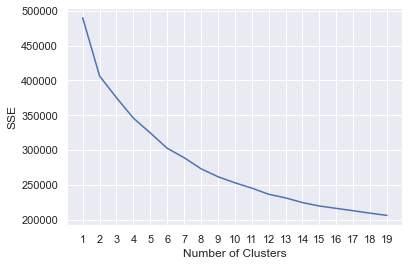

In [104]:
%matplotlib inline
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Elbow Point: 8
Knee Point: 8


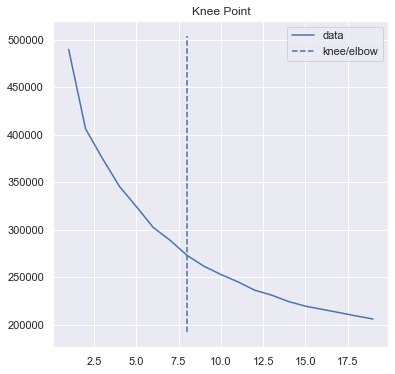

In [105]:
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")

print("Elbow Point:", kl.elbow)
print("Knee Point:", kl.knee)
kl.plot_knee()

After performing the elbow method and the KneeLocator, both methods recommended using 8 clusters. Since the result of the SSE curve is not clear, in addition, we performed the silhouette coefficient (with values of K in a range of 20) which is a measure of cluster cohesion and separation.

The silhouette coefficient quantifies how well a data point fits into its assigned cluster based on two factors: how close the data point is to other points in the cluster and how far away the data point is from points in other clusters.

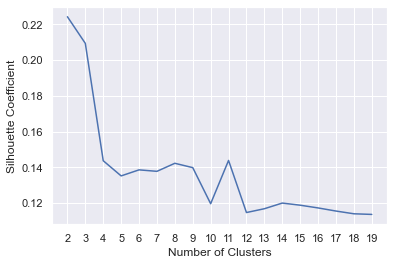

In [106]:
# holds the silhouette coefficients for each k
silhouette_coefficients = []

# starts at 2 clusters for silhouette coefficient
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [107]:
# silhouette score
print("Silhouette Score:",score)

Silhouette Score: 0.11367455134362045


Inferring the result of the silhouette coefficient plot, in a first approach we have tested the model using 4 clusters. 
Although the results were not satisfactory so we proceeded to use 8 clusters in the K-means model.

In [108]:
kmeans = KMeans(n_clusters=8, random_state=42)

cluster_scaled_df = scaled_features.copy(deep=True)
cluster_scaled_df['cluster'] = kmeans.fit_predict(scaled_features)

print("The lowest SSE value:",kmeans.inertia_,"\n\n", 
      "Final locations of the centroid:","\n",kmeans.cluster_centers_,"\n\n",
      "The number of iterations required to converge:",kmeans.n_iter_)

The lowest SSE value: 273010.4995167207 

 Final locations of the centroid: 
 [[-1.04152389 -0.79938391 -1.03317085  0.04939099  0.76014582  0.99323164
   0.07316856 -0.96400369 -0.27339347  5.04575329  0.19331313  4.88771578]
 [ 0.75918714  0.39972197  0.33540471 -0.18811831 -0.40820824 -0.31110217
  -0.28574941  0.79179846 -0.10287629 -0.08559363 -0.26585185 -0.03409903]
 [ 0.1516245   0.37989576  0.30224164 -0.08901778 -0.41750157  0.02473054
  -0.09694819  0.07133997 -0.23010643  0.04283742  2.22036523 -0.42419966]
 [-1.02478438 -1.43252404 -1.7493585  -0.30956439  1.31041182  2.01918147
  -0.31861807 -1.05106523 -0.41393083 -0.10897307 -0.00946357 -0.06370759]
 [-0.23240513  0.42865676  0.24426887  0.06381204 -0.09555582 -0.15221937
   2.81985769  0.0995826   0.04332557 -0.01257686 -0.0101013  -0.05691819]
 [-0.30045861 -0.97141994 -0.48085656 -0.34541575  0.95541185 -0.40749748
  -0.2084864  -0.39020675 -0.27118778 -0.24631631 -0.14962563 -0.15604301]
 [-0.59469344  0.78796052  0

After fiting and predicting the K-means model with 8 cluster, we check that the lowest SSE value was 273010.50 in 25 iterations. Higher SSE values indicate that samples are closer to their clusters than they are to other clusters.

In [109]:
cluster_scaled_df

danceability    energy  loudness  speechiness  acousticness  \
0         -0.072814 -1.044251 -1.047032    -0.487093      0.970297   
1          1.115155 -0.152666  0.891774    -0.485931      0.574710   
2          1.103895 -0.636103 -0.084227    -0.498716      0.970297   
3          0.141133  0.057351 -0.541215    -0.096583      0.858115   
4         -0.151637  0.715142  0.026061    -0.434793     -1.075488   
...             ...       ...       ...          ...           ...   
40824     -0.939863 -0.644029 -0.387943     0.238141      1.457401   
40825     -0.393735 -0.354759 -0.266721     0.216058     -0.883945   
40826     -1.615485 -0.117003  0.466082    -0.492904     -0.617957   
40827     -0.680874 -1.805069 -2.158772    -0.452226      1.286176   
40828      1.520529  0.089052 -1.029122    -0.425495     -1.062963   

       instrumentalness  liveness   valence     tempo  duration_ms  \
0             -0.484161 -0.194234 -0.000713 -0.107459    -0.637403   
1             -0.507236 -0.881127 -0.876861  0.510311     1.286491   
2              1.126791 -0.697840 -1.041607 -0.871388     0.022253   
3              2.549550  2.737202  0.823017 -0.175917     1.188586   
4             -0.496045 -0.280963  1.564373  1.162549     1.648841   
...                 ...       ...       ...       ...          ...   
40824          1.017856 -0.919866  0.167777  1.890875     0.462877   
40825         -0.507232 -0.833715  0.377454  1.965244    -0.399983   
40826         -0.507168 -0.711138  0.373710 -0.664194    -0.429035   
40827         -0.506907 -0.408165 -1.367355 -0.958782    -0.194980   
40828          0.572212 -0.633660  1.575606  0.124205    -0.307243   

       chorus_hit  sections  cluster  
0        0.726481 -0.918010        5  
1       -0.417241  1.136814        1  
2        0.103127 -0.301563        5  
3        2.153149 -0.096080        4  
4       -0.764422  1.958744        1  
...           ...       ...      ...  
40824   -0.208765  0.725849        5  
40825   -0.351688 -0.301563        6  
40826   -0.937656  0.314884        6  
40827   -1.067068 -0.096080        5  
40828    0.047822 -0.096080        1  

[40829 rows x 13 columns]

In [113]:
# merge targets df into scaled_features_clusters + hit df
df_norm = pd.concat([cluster_scaled_df.reset_index(drop=True), hit.reset_index(drop=True)], axis=1)
df_norm = pd.concat([df_norm.reset_index(drop=True), discrete_valence.reset_index(drop=True)], axis=1)
df_norm

danceability    energy  loudness  speechiness  acousticness  \
0         -0.072814 -1.044251 -1.047032    -0.487093      0.970297   
1          1.115155 -0.152666  0.891774    -0.485931      0.574710   
2          1.103895 -0.636103 -0.084227    -0.498716      0.970297   
3          0.141133  0.057351 -0.541215    -0.096583      0.858115   
4         -0.151637  0.715142  0.026061    -0.434793     -1.075488   
...             ...       ...       ...          ...           ...   
40824     -0.939863 -0.644029 -0.387943     0.238141      1.457401   
40825     -0.393735 -0.354759 -0.266721     0.216058     -0.883945   
40826     -1.615485 -0.117003  0.466082    -0.492904     -0.617957   
40827     -0.680874 -1.805069 -2.158772    -0.452226      1.286176   
40828      1.520529  0.089052 -1.029122    -0.425495     -1.062963   

       instrumentalness  liveness   valence     tempo  duration_ms  \
0             -0.484161 -0.194234 -0.000713 -0.107459    -0.637403   
1             -0.507236 -0.881127 -0.876861  0.510311     1.286491   
2              1.126791 -0.697840 -1.041607 -0.871388     0.022253   
3              2.549550  2.737202  0.823017 -0.175917     1.188586   
4             -0.496045 -0.280963  1.564373  1.162549     1.648841   
...                 ...       ...       ...       ...          ...   
40824          1.017856 -0.919866  0.167777  1.890875     0.462877   
40825         -0.507232 -0.833715  0.377454  1.965244    -0.399983   
40826         -0.507168 -0.711138  0.373710 -0.664194    -0.429035   
40827         -0.506907 -0.408165 -1.367355 -0.958782    -0.194980   
40828          0.572212 -0.633660  1.575606  0.124205    -0.307243   

       chorus_hit  sections  cluster  hit discrete_valence  
0        0.726481 -0.918010        5    0          Neutral  
1       -0.417241  1.136814        1    1         Negative  
2        0.103127 -0.301563        5    0         Negative  
3        2.153149 -0.096080        4    0         Positive  
4       -0.764422  1.958744        1    0         Positive  
...           ...       ...      ...  ...              ...  
40824   -0.208765  0.725849        5    0          Neutral  
40825   -0.351688 -0.301563        6    1          Neutral  
40826   -0.937656  0.314884        6    1          Neutral  
40827   -1.067068 -0.096080        5    1         Negative  
40828    0.047822 -0.096080        1    1         Positive  

[40829 rows x 15 columns]

### Finding Similar Groups of Tracks

To try to characterize and find similar groups of tracks, we performed a Principal Component Analysis.

### PCA

In [116]:
# fit tranform cluster_scaled_df 
pca = PCA()
pca.fit_transform(cluster_scaled_df)

array([[ 1.5694031 ,  0.99933278, -1.54108566, ...,  0.23622565,
        -0.20261738,  0.15689599],
       [-2.50052969,  0.42106897,  1.43726575, ..., -1.73334765,
        -0.14480455,  0.16790387],
       [ 1.38372991,  1.15085124, -0.49149819, ..., -1.36175384,
        -0.31443588,  0.14848108],
       ...,
       [ 2.42245451, -0.42960922,  0.035043  , ...,  1.31646482,
         0.76409282, -0.3335515 ],
       [ 2.03012179,  2.83785404, -0.89154675, ...,  0.41135226,
        -0.46617172,  0.07059764],
       [-3.04957848, -0.22038247, -0.6077254 , ...,  0.83790307,
        -0.13869236, -0.1546238 ]])

In order to know how many principal components we will reduce our data into, we performed a cumulative explained variance plot. 

Text(0, 0.5, 'Cumulative Explained Variance')

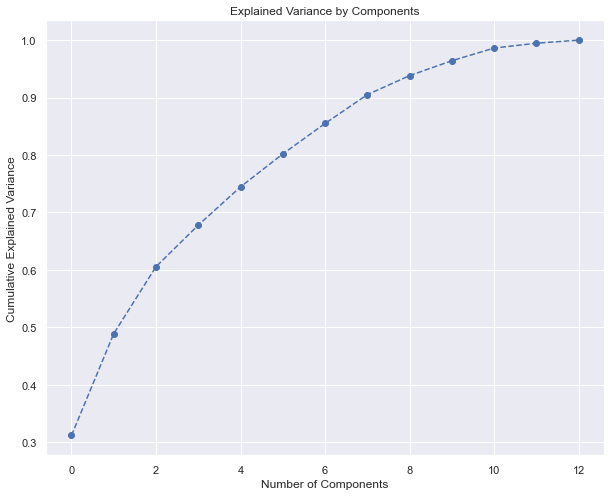

In [117]:
plt.figure(figsize=(10,8))
plt.plot( pca.explained_variance_ratio_.cumsum(), marker ='o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

The slope is steeper until the second component, so we choose two principal components.

In [118]:
# Reducing data into 2 principal components 
reduced_data = PCA(n_components=2).fit_transform(cluster_scaled_df)
pca = pd.DataFrame(reduced_data,columns=['Principal Component 1','Principal Component 2'])
pca

Principal Component 1  Principal Component 2
0                   1.569403               0.999333
1                  -2.500530               0.421069
2                   1.383730               1.150852
3                   0.408227               1.027261
4                  -2.862434              -0.669118
...                      ...                    ...
40824               1.835570               1.219938
40825               2.507910              -1.034027
40826               2.422454              -0.429610
40827               2.030122               2.837855
40828              -3.049578              -0.220382

[40829 rows x 2 columns]

In [119]:
# merging the scale with the PCA df
pca_targets = pd.concat([pca.reset_index(drop=True), df_norm.reset_index(drop=True)], axis=1)

pca_targets

Principal Component 1  Principal Component 2  danceability    energy  \
0                   1.569403               0.999333     -0.072814 -1.044251   
1                  -2.500530               0.421069      1.115155 -0.152666   
2                   1.383730               1.150852      1.103895 -0.636103   
3                   0.408227               1.027261      0.141133  0.057351   
4                  -2.862434              -0.669118     -0.151637  0.715142   
...                      ...                    ...           ...       ...   
40824               1.835570               1.219938     -0.939863 -0.644029   
40825               2.507910              -1.034027     -0.393735 -0.354759   
40826               2.422454              -0.429610     -1.615485 -0.117003   
40827               2.030122               2.837855     -0.680874 -1.805069   
40828              -3.049578              -0.220382      1.520529  0.089052   

       loudness  speechiness  acousticness  instrumentalness  liveness  \
0     -1.047032    -0.487093      0.970297         -0.484161 -0.194234   
1      0.891774    -0.485931      0.574710         -0.507236 -0.881127   
2     -0.084227    -0.498716      0.970297          1.126791 -0.697840   
3     -0.541215    -0.096583      0.858115          2.549550  2.737202   
4      0.026061    -0.434793     -1.075488         -0.496045 -0.280963   
...         ...          ...           ...               ...       ...   
40824 -0.387943     0.238141      1.457401          1.017856 -0.919866   
40825 -0.266721     0.216058     -0.883945         -0.507232 -0.833715   
40826  0.466082    -0.492904     -0.617957         -0.507168 -0.711138   
40827 -2.158772    -0.452226      1.286176         -0.506907 -0.408165   
40828 -1.029122    -0.425495     -1.062963          0.572212 -0.633660   

        valence     tempo  duration_ms  chorus_hit  sections  cluster  hit  \
0     -0.000713 -0.107459    -0.637403    0.726481 -0.918010        5    0   
1     -0.876861  0.510311     1.286491   -0.417241  1.136814        1    1   
2     -1.041607 -0.871388     0.022253    0.103127 -0.301563        5    0   
3      0.823017 -0.175917     1.188586    2.153149 -0.096080        4    0   
4      1.564373  1.162549     1.648841   -0.764422  1.958744        1    0   
...         ...       ...          ...         ...       ...      ...  ...   
40824  0.167777  1.890875     0.462877   -0.208765  0.725849        5    0   
40825  0.377454  1.965244    -0.399983   -0.351688 -0.301563        6    1   
40826  0.373710 -0.664194    -0.429035   -0.937656  0.314884        6    1   
40827 -1.367355 -0.958782    -0.194980   -1.067068 -0.096080        5    1   
40828  1.575606  0.124205    -0.307243    0.047822 -0.096080        1    1   

      discrete_valence  
0              Neutral  
1             Negative  
2             Negative  
3             Positive  
4             Positive  
...                ...  
40824          Neutral  
40825          Neutral  
40826          Neutral  
40827         Negative  
40828         Positive  

[40829 rows x 17 columns]

### 2.6.2 Hierarchical

##### How many cluster do we need? Elbow Method

In oposotion to KMeans method, we don't know the number of clusters that optimize the conglomeration. So, we need to compute some indicator to undestand how many clusters do we need.

One of the most common index is the Elbow method. It calculates the SSE (Squared Standard Error) for differents models with different number of clusters. It is desiderable to minimize the SSE, so higher the number of clusters lower the SSE, but if we have too many clusters the interpretation is hard. In conclusion we stop adding new clusters when SSE reduction is not longer significant.

The function ``elbow_clus`` calculates the SSE for models from 1 to 7 clusters. When we find the elbow we fix the optimal number of clusters.

In [ ]:
sse_energy  =[]; sse_loud = []; sse_el = []; ssedi = []

data=df.copy(deep=True)

def elbow_clus(list_out,list_in, data=data):
    for i in range(1,7):
        list_out.append(KMeans(init="random",n_clusters=i,n_init=10,max_iter=300,random_state=None).fit(data[list_in]).inertia_)
    
    plt.plot(range(1, 7), list_out)
    plt.xticks(range(1, 7))
    plt.title ("Elbow")
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.show()
    kl = KneeLocator(range(1, 7), list_out, curve="convex", direction="decreasing")
    print(list_in," número de clusters recomendados: ", kl.elbow)  
    
elbow_clus(sse_energy,['energy','danceability'])

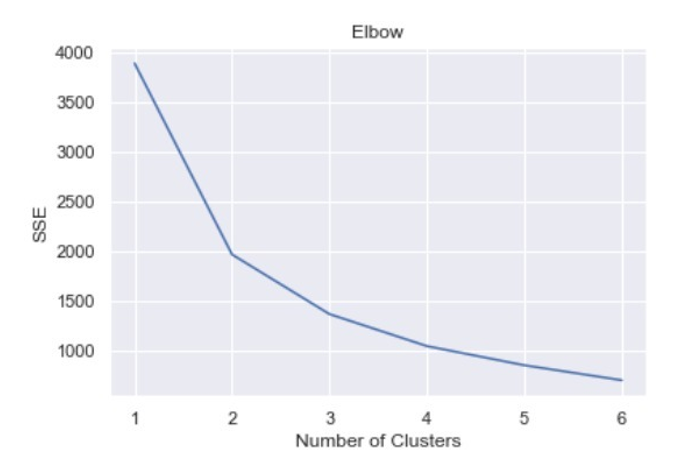

### Silhouette Coefficient

Silhouette coeficient is useful to measure how the clusters are separetad between them and concetrated within them. It varies from -1 to 1. Higher the coefficient better the clusterization.

Next, the formula, when:

a: mean on the intra cluster distances

b: mean of the inter cluster distances

It could be also used to determine the optimal number of cluster, since the user builds several cluster with different number of cluster and then it compares the coeficients.

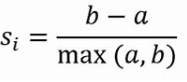

## 2.7. Clustering - Results and Discussion 

## 2.7.1 KMeans

Using the merged dataframe between the principal components and the scaled numerical features and targets (*hit* and *discrete_valence*, we performed PCA plots in order to characterize the clusters. We start by plotting an overall PCA chart, where the clusters are colored, in order to be able to distinguish easily.

Then we plot the targets vs the clusters: *Hit Vs Clusters* and *Discrete Valente Vs Clusters*
   * with the addition of a contingency matrix
   * colored by the target
   
Finally for the numerical features we plot an independent PCA for each one, versus the clusters - colored by the feature. 
Altough, there are only represent the PCA plot for the features with relevant results.
   * with the addition of a table which describes the mean of the feature continuos values in each cluster

### A) Overall Clusters 

<AxesSubplot:xlabel='Principal Component 1', ylabel='Principal Component 2'>

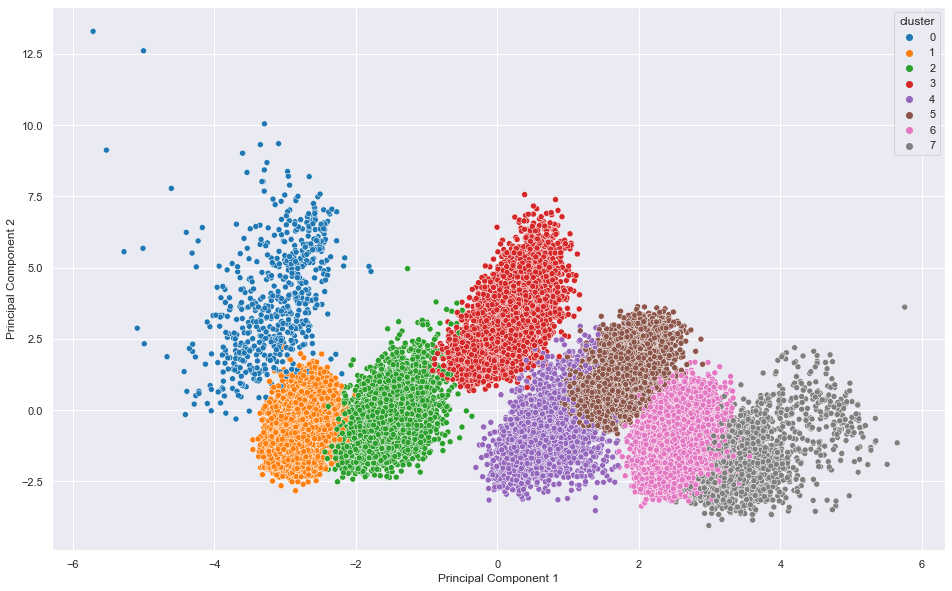

In [120]:
# PCA Clusters

plt.figure(figsize=(16,10))
sns.scatterplot(
    x= pca_targets['Principal Component 1'], y= pca_targets['Principal Component 2'],
    hue= pca_targets['cluster'],
    palette= sns.color_palette("tab10", 8),
    legend="full"
)

### B) Hit Vs Clusters

<AxesSubplot:xlabel='Principal Component 1', ylabel='Principal Component 2'>

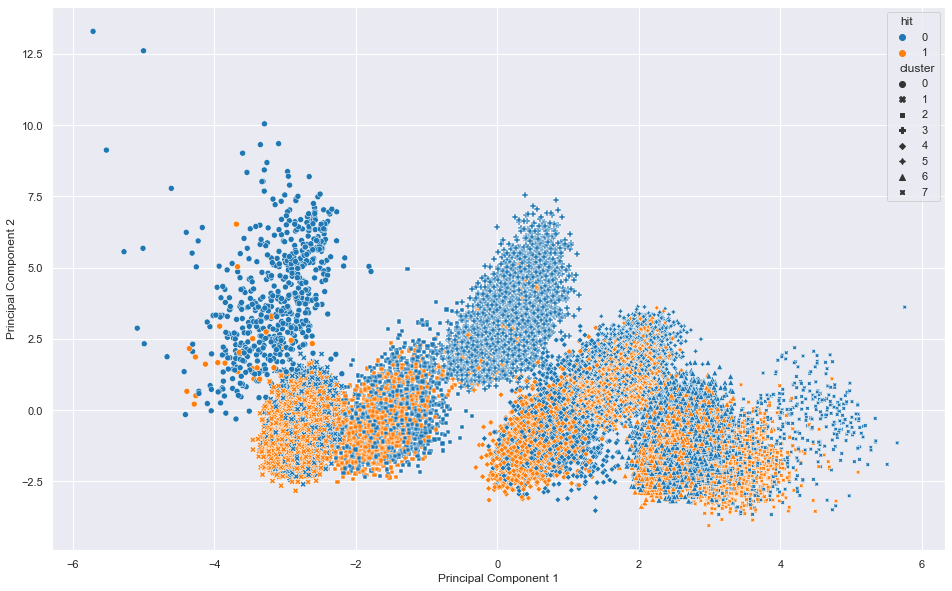

In [121]:
# PCA Hit

plt.figure(figsize=(16,10))
sns.scatterplot(
    x= pca_targets['Principal Component 1'], y= pca_targets['Principal Component 2'],
    hue= pca_targets['hit'],
    style = pca_targets['cluster'],
    palette= sns.color_palette("tab10", 2),
    legend="full"
)

In [126]:
# contigency matrix - Hit vs Clusters

cm = contingency_matrix(df_norm['hit'], df_norm['cluster'])

cm_dval_df = pd.DataFrame(cm)
types = list(set(df_norm['hit']))
types.sort()
cm_dval_df.index = types

cm_dval_df

0     1     2     3     4     5     6     7
0  581  3901  1420  3642  1348  4342  4312   787
1   25  9222  1477   123  1244  3855  3322  1228

### C) Discrete Valence Vs Clusters

<AxesSubplot:xlabel='Principal Component 1', ylabel='Principal Component 2'>

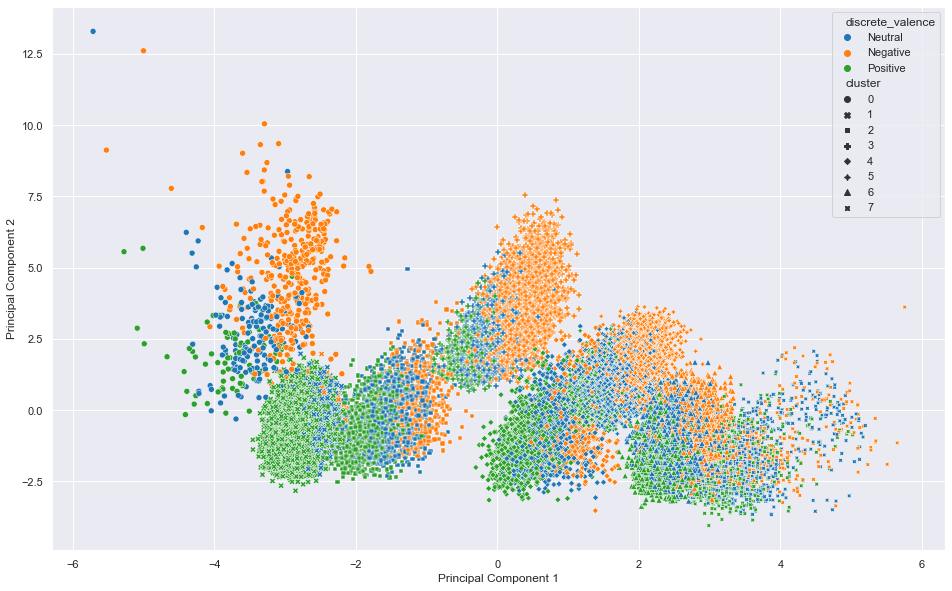

In [127]:
# PCA Discrete_Valence

plt.figure(figsize=(16,10))
sns.scatterplot(
    x= pca_targets['Principal Component 1'], y= pca_targets['Principal Component 2'],
    hue= pca_targets['discrete_valence'],
    style = pca_targets['cluster'],
    palette= sns.color_palette("tab10", 3)
)

In [128]:
# contigency matrix - Discrete Valence vs Clusters

cm = contingency_matrix(df_norm['discrete_valence'], df_norm['cluster'])

cm_dval_df = pd.DataFrame(cm)
types = list(set(df_norm['discrete_valence']))
types.sort()
cm_dval_df.index = types

cm_dval_df

0     1     2     3     4     5     6    7
Negative  379   238   582  2623   500  2814  2796  272
Neutral   160  3309  1204   785  1027  4002  3652  979
Positive   67  9576  1111   357  1065  1381  1186  764

### D) Danceability Vs Clusters

<AxesSubplot:xlabel='Principal Component 1', ylabel='Principal Component 2'>

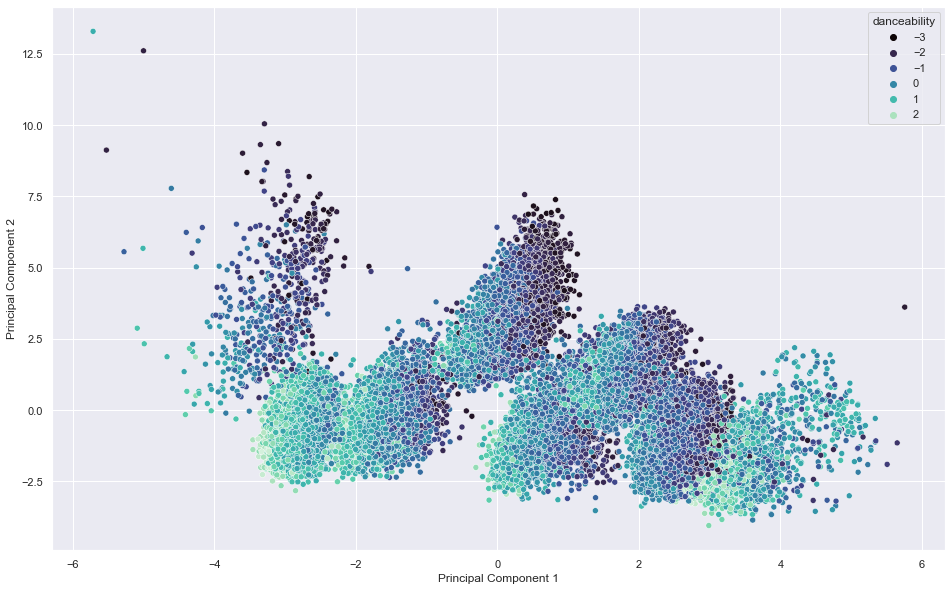

In [129]:
# PCA Danceability

plt.figure(figsize=(16,10))
sns.scatterplot(
    x= pca_targets['Principal Component 1'], y= pca_targets['Principal Component 2'],
    hue= pca_targets['danceability'],
    palette= sns.color_palette("mako", as_cmap=True)
)

In [130]:
# Descritive Statistics - Cluster Vs Danceability
pca_targets[['cluster', 'danceability']].groupby('cluster').agg(['mean'])

danceability
                mean
cluster             
0          -1.041524
1           0.759328
2           0.151625
3          -1.024253
4          -0.232001
5          -0.300769
6          -0.594590
7           0.838418

### E) Energy Vs Clusters

<AxesSubplot:xlabel='Principal Component 1', ylabel='Principal Component 2'>

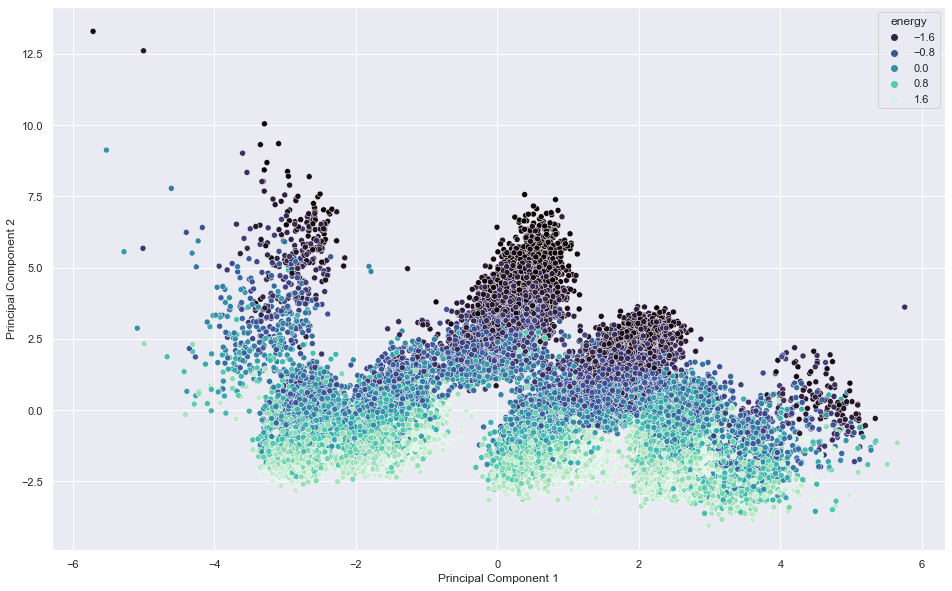

In [131]:
# PCA Energy

plt.figure(figsize=(16,10))
sns.scatterplot(
    x= pca_targets['Principal Component 1'], y= pca_targets['Principal Component 2'],
    hue= pca_targets['energy'],
    palette= sns.color_palette("mako", as_cmap=True)
)

In [132]:
# Descritive Statistics - Cluster Vs Energy
pca_targets[['cluster', 'energy']].groupby('cluster').agg(['mean'])

energy
             mean
cluster          
0       -0.799384
1        0.399704
2        0.379896
3       -1.431764
4        0.428519
5       -0.971578
6        0.788022
7        0.181978

### F) Acousticness Vs Clusters

<AxesSubplot:xlabel='Principal Component 1', ylabel='Principal Component 2'>

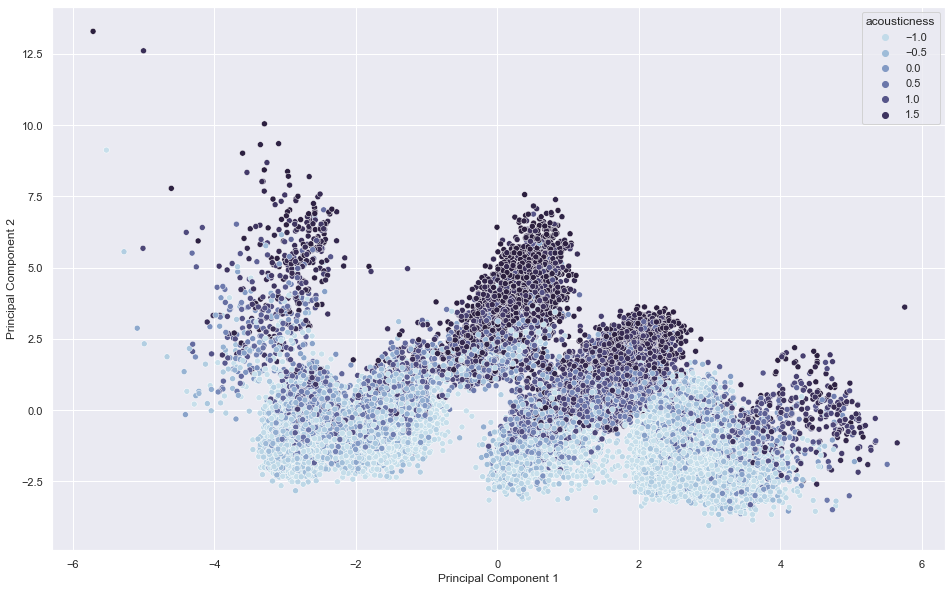

In [133]:
# PCA Acousticness
 
plt.figure(figsize=(16,10))
sns.scatterplot(
    x= pca_targets['Principal Component 1'], y= pca_targets['Principal Component 2'],
    hue= pca_targets['acousticness'],
    palette= sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
)

In [134]:
# Descritive Statistics - Cluster Vs Acousticness
pca_targets[['cluster', 'acousticness']].groupby('cluster').agg(['mean'])

acousticness
                mean
cluster             
0           0.760146
1          -0.408116
2          -0.417502
3           1.309528
4          -0.095903
5           0.955630
6          -0.772792
7          -0.253619

## G) Instrumentalness Vs Clusters

<AxesSubplot:xlabel='Principal Component 1', ylabel='Principal Component 2'>

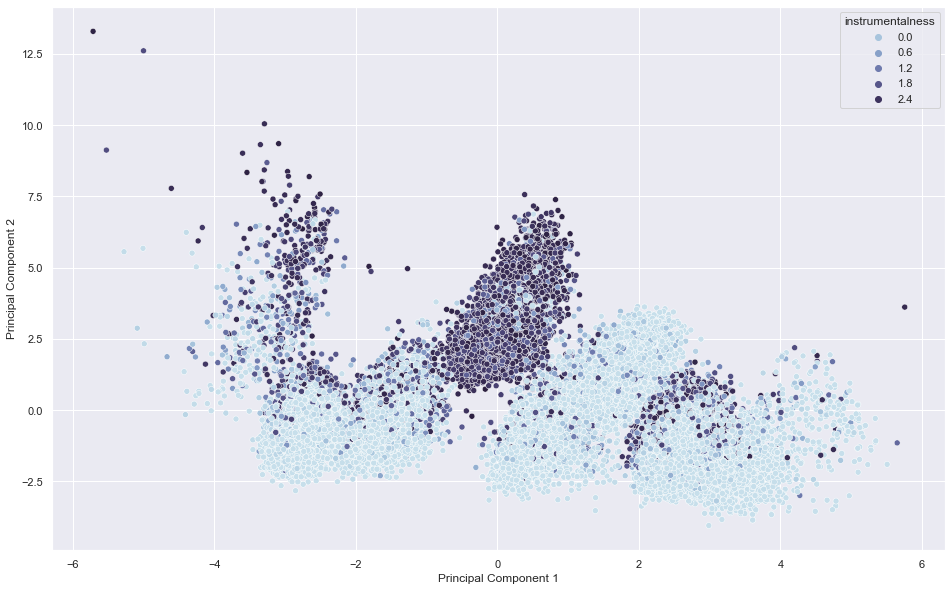

In [135]:
#PCA Instrumentalness

plt.figure(figsize=(16,10))
sns.scatterplot(
    x= pca_targets['Principal Component 1'], y= pca_targets['Principal Component 2'],
    hue= pca_targets['instrumentalness'],
    palette= sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
)

In [136]:
# Descritive Statistics - Cluster Vs Instrumentalness
pca_targets[['cluster', 'instrumentalness']].groupby('cluster').agg(['mean'])

instrumentalness
                    mean
cluster                 
0               0.993232
1              -0.311075
2               0.024731
3               2.019687
4              -0.152258
5              -0.407496
6               0.049269
7              -0.415214

## 2.7.2 Hierarchical

##### From which features we define the groups?

The set of variables we dispose is too big for consider all of them to group the tracks. So, we have found other ways to select the most relevant features. 

The team has done several tests with different combinations of variables and number of clusters finally we have chosen to build a model with energy and danceability. The relation between these two variables is very interessting because danceability increases while energy does untill it reach some point in which danceability drops again.


In [ ]:
ward = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
ward = ward.fit_predict(df[['energy','danceability']])
df["ward_ener_danc"] = ward

colors_cl = {0:'green', 1:'blue', 2:'red',3:'purple', 4:'orange', 5:'black', 6:'brown'} 
plt.figure(figsize=(14, 8))
plt.ylabel('danceability')
plt.xlabel('energy')
plt.title('Cluster energy x danceability')
plt.scatter(df['energy'],df['danceability'], c=df["ward_ener_danc"].map(colors_cl), alpha = 0.65)

plt.show()

silhouette_coef = silhouette_score(df[['energy','danceability']], df["ward_ener_danc"])
print("Silhouette Coefficient: ", silhouette_coef.round(4))

df[['energy','danceability','ward_ener_danc','hit']].groupby('ward_ener_danc').agg(['mean','count','sum'])

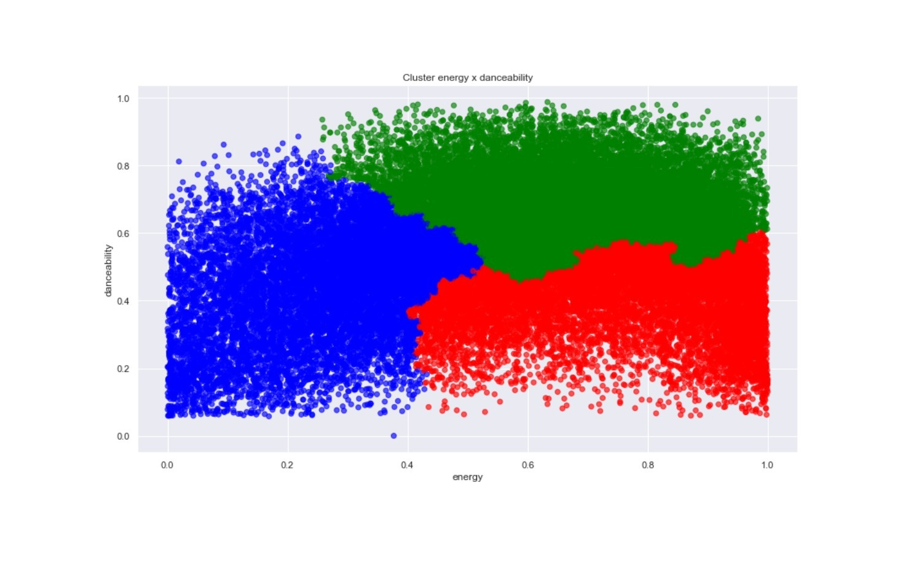

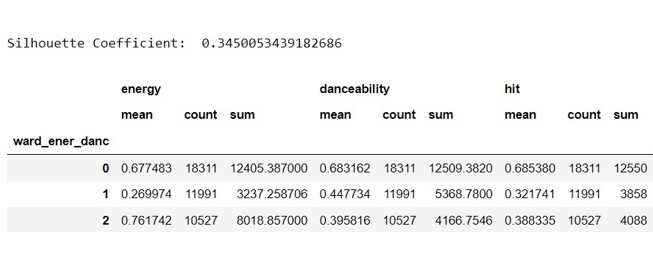

The graph above shows the distribution of the clusters. The size of the three cathegories is quite balanced. The blue group has the lowest values in energy and danceability. The green has medium and high levels of energy but not of danceability, which is never big. Finally, the red group has the highest values of danceability. 

In the table we can also analyze the ratio of Hits. The blue has low levels, so the most part of these tracks are flops. Red and green groups are more balanced. However, this distribution will be discuss below.



Silhouette coeficient is not very high, since it is optimal from 0.5, but watching the size and concentration of our data is it too 
dificult to have very separated clusters, so reach the highest values of the coefficient is not possible 

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(df[['energy', 'danceability']], method='ward'))
dendrogram

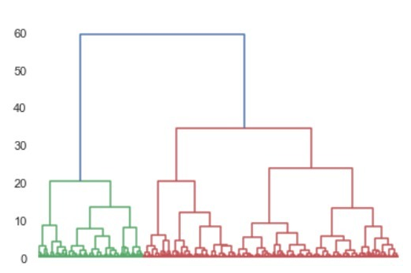

### Differences between groups

In order to be sure that our cluster model discriminates well the tracks we have test if the distribution of the Hit is different between the three new groups.

The test we carry out is Independant Chi-squared.

 - Null hypothesis: distribution of Hit = 0 is equal to distribution of Hit = 1 among the three clusters
 - Alternative hypothesis: At least one of the clusters draw different distribution on Hit

The tests compares the observed values against the expected values. Next, the observed and expected cross tables

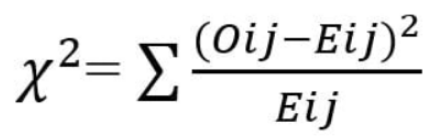

In [ ]:
cross_Tab = pd.crosstab(df["hit"], df["ward_ener_danc"], margins = True)
print("Observed:\n")
print(tabulate(cross_Tab, headers = ['red','blue', 'green', 'Margins'], 
               showindex = ['hit 0','hit 1', 'Margins'], tablefmt = 'fancy_grid'), "\n")

stat, p, dof, expected = chi2_contingency(cross_Tab)
print("Expected:\n")
print(tabulate(pd.DataFrame(expected.round(2)), headers = ['red','blue', 'green', 'Margins'],
               showindex = ['hit 0','hit 1', 'Margins'], tablefmt = 'fancy_grid'))


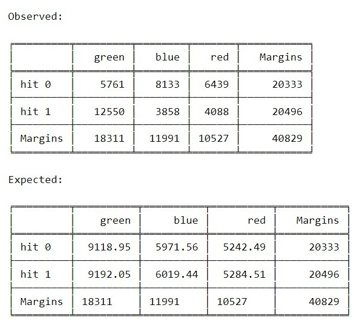

In [ ]:
df.loc[df['ward_ener_danc'] == 1, 'energy_dance'] = '1.- blue'
df.loc[df['ward_ener_danc'] == 2, 'energy_dance'] = '2.- red'
df.loc[df['ward_ener_danc'] == 0, 'energy_dance'] = '3.- green'

print('Observed Chi-Squeared Statistic = %.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Cannot reject independance')
else:
    print('Can assume dependance')

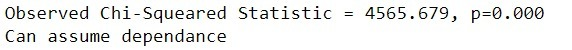

In [ ]:
print("\nAnalysis post-hoc 2 vs 2 -- Cluster Red vs Blue")
amostra_2vs2 = df[df["ward_ener_danc"] != 2]
cross_Tab = pd.crosstab(df["hit"], amostra_2vs2["ward_ener_danc"], margins = True)
stat, p, dof, expected = chi2_contingency(cross_Tab)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Cannot reject independance')
else:
    print('Can assume dependance')
    
print("\nAnalysis post-hoc 2 vs 2 -- Cluster Red vs Green")
amostra_2vs2 = df[df["ward_ener_danc"] != 1]
cross_Tab = pd.crosstab(df["hit"], amostra_2vs2["ward_ener_danc"], margins = True)
stat, p, dof, expected = chi2_contingency(cross_Tab)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Cannot reject independance')
else:
    print('Can assume dependance')
    
print("\nAnalysis post-hoc 2 vs 2 -- Cluster Blue vs Green")
amostra_2vs2 = df[df["ward_ener_danc"] != 0]
cross_Tab = pd.crosstab(df["hit"], amostra_2vs2["ward_ener_danc"], margins = True)
stat, p, dof, expected = chi2_contingency(cross_Tab)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Cannot reject independance')
else:
    print('Can assume dependance')


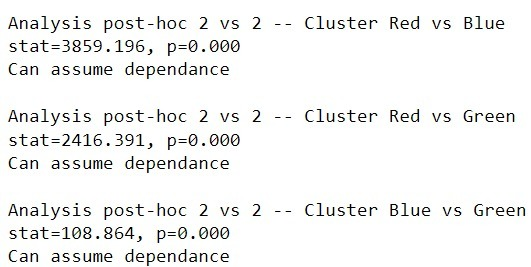


## 2.8 Results and discussion for Clustering

## 2.8.1 KMeans

Facing the overall cluster PCA plot (*2.7.1-A*) with the *Hit Vs Clusters* (*2.7.1-B*) and *Discrete Valence* (*2.7.1-C*) PCA plots, we can infer that the cluster 1 can represented the hit tracks with positive discrete valence, and in other hand the cluster 3 is characterized by the aggregation of the flop tracks with negative discrete valence. Therefore, an hit track is directly associated with a positive discrete valence and a flop track is associated with a negative discrete valence.

Inferring the features, by analysing the respective PCA plots, some feature values can predict if a track can be a hit, and at the same time predict a positive discrete valence, which are:

   * High Danceability values:      0.76 mean (*2.7.1-D*)
   * High Energy values:            0.40 mean (*2.7.1-E*)
   * Low Acousticness values:      -0.41 mean (*2.7.1-F*)
   * Low Instrumentalness values:  -0.31 mean (*2.7.1-G*)
   
   
   
In constraste, several feature values can predict if a track can be a flop, and at the same time predict a negative discrete valence, which are:
        
   * Low Danceability values:      -1.02 mean (*2.7.1-D*)
   * Low Energy values:            -1.43 mean (*2.7.1-E*)
   * High Acousticness values:      1.31 mean (*2.7.1-F*)
   * High Instrumentalness values:  2.02 mean (*2.7.1-G*)

## 3. Final Comments and Conclusions

In conclusion, the data science radio team did a tour for several data analysis and machine learning techniques. When it took the data the first thing to do was to understand what it contains, which kind of information it has. For that, the team has drawn a report in which it could make the explanatory and descriptive analysis. The Pearson's correlation coefficient was also deployed.
Next, the team starts with the prediction of the variable Hit. Remember that were built four models: Logistic Regression, Naive Bayes, Decision Tree and KNN. Results between the four models have differences and similitudes. The 4 models share 3 variables: instrumentalness, danceability and accousticness. Also, energy is included in Logistic Regression, Naive Bayes and KNN. Naive Bayes is the only model with liveness. Finally, time_signature and key are only significant in Logistic Regression. These differences are not necessarily good or bad but induce strong and weaknesses among the different functions of the models. One good thing they all have in common is that all of them are stronger in recall (The reason for being good is discussed below).
The performances of every model are good, accuracy is greater than 73% in all of them. Precision, recall and f1 score also shows power in the prediction model. However, the better classifier we have built is KNN. Its recall is up to 90%, also has the highest precision (77%) and accuracy (82%).
Logistic Regression was also validated through AUC (Area Under the Curve). From ROC and Recall-Precision Curves. ROC Curve shows more than 80% of the quality of classification. Besides, Recall-Precision AUC was weaker, but still acceptable (62%).
Finally, was designed a new cut-off to determine from which probability of occurrence the team will consider what a Hit is. For that it made a simulation with three scenarios on the Logistic Regression model. Differences between them were shown through the same indicators as above. This analysis was focused on the minimization of the false positive, to reduce the number of Flops. The indicator which better optimize this requirement is recall. So, by increasing the threshold we difficult the possibility of being Hit, thus we eliminate a lot of Flops predicted as Hits. In consequence, we are considering Hits as Flops, so we lose precision. The final decision was to increase the threshold up to 0.7. Reaching 78% of recall.
Following, Discrete valence prediction has several differences with Hit prediction. For instance, the dependent variable has three levels instead of two. Which difficulties both the construction and the validation. The same four models were built. In general, the four models we built have not that prediction power such as in Hits. The accuracies obtained are between 60% and 65%. Especially the neutral value did not reach 50% of precision in Logistic Regression.
On the other hand, were developed three unsupervised models. One Rule Mining and two Cluster Analysis, KMeans and Hierarchical. The way they work are different and the vision and utilities we have done to them are also diverse. Rule Mining use indicators such as support and lift to associate observations, which are based on the repetition of items in the same tuple. Later, the main differences between both clusters are the way they are built. Hierarchical starts from zero, every instance is considered a cluster, then they are joint by proximity. Besides, Kmeans starts with N centroids in which the closest points are joint.
KMeans was complemented with a PCA analysis, in order to visualize in a single graph all the information of the variables combined with the clusterization. Several differences were found thanks to this analysis. Such as the negative influence of instrumentalness on Hit.
Agglomerative clustering has defined 3 groups of tracks in fucntion of energy and danceability. To use only two variables make easy to explain to an artist what a Hit is. Also, because both concepts are very clear. Besides, clustering just say us how the clusters are, but nothing about the Hits. The analysis continues.
Hypothesis tests were designed to prove the differences found in the hierarchical clustering in terms of Hit. The goal was to know if having high (or low) values of energy and danceability intercepts in the Hit distribution. The test applied was a Chi-Squared for independence. The differences between the observed and expected values were huge, so the team can reject the null hypothesis of independence in distributions. So yes, higher the danceability and energy (until a limit) higher the probability of Hit.
The main benefit of the entire project is to make understand the artist how they have to make their music if they want to be successful. Instrumentalness and accousticness are rather related to Flops than Hits. Neither speechiness is favorable to Hits. On the other hand, the rest of variables are more related to Hits.
Some conclusions would go further if some others informations were included, such as genre, country of origin or number of band members. However, to work on this project has helped us understand: the utilization and combination of several machine learning techniques and some characteristics of the music industry, such us the measures they use to understand the music. Are they the music notes of the XXI century?